In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
timit_df = pd.read_hdf("timit.hdf")

In [3]:
print(timit_df.head())
print(timit_df.tail())


                                            features labels
0  [6.827545062911363, -31.824121059207688, -6.55...    sil
1  [6.70766922870581, -25.25615714041625, -4.6685...    sil
2  [7.159189212079523, -23.60427856243226, -13.06...    sil
3  [8.2792130032043, -22.048277126965345, -24.025...    sil
4  [8.51029438049915, -23.54432228633711, -29.466...    sil
                                                  features labels
1236538  [6.6391681130672815, -28.836119139767746, -3.6...      z
1236539  [6.688211842011601, -29.847975708223995, -7.26...      z
1236540  [6.855396157962661, -27.660110843740135, -9.08...      z
1236541  [7.039170444499258, -21.775809838809955, -9.39...      z
1236542  [6.799051425385074, -18.938063051843052, -9.65...      z


In [4]:
features = np.array(timit_df["features"].tolist())
labels = np.array(timit_df["labels"].tolist())

In [5]:
# timit_df["features"]

In [6]:
print(timit_df.shape)
print(features.shape)
print(features[labels == 'aa'].shape)

(1236543, 2)
(1236543, 13)
(31440, 13)


In [7]:
np.array(set(labels))

array({'', 'sh', 'n', 'jh', 'l', 'uw', 'th', 'ow', 'iy', 'w', 'er', 'aa', 'dx', 'm', 'hh', 'd', 'uh', 'oy', 'ch', 'y', 'dh', 'ng', 'aw', 'ah', 'f', 'eh', 'p', 's', 'r', 'g', 'z', 'sil', 'ih', 'ey', 'v', 'k', 't', 'b', 'ay', 'ae'},
      dtype=object)

In [8]:
len(list(set(labels)))

40

In [9]:
data_labels = timit_df["labels"].copy()
label_enc, label_categories = data_labels.factorize()
label_categories

Index(['sil', 'hh', 'aw', 'p', 'er', 'm', 'ih', 'n', 'eh', '', 'aa', 'r', 'dh',
       'k', 's', 'sh', 'iy', 'ae', 'd', 'y', 'uw', 't', 'g', 'w', 'dx', 'l',
       'ow', 'ay', 'ah', 'b', 'v', 'ey', 'z', 'f', 'ng', 'jh', 'uh', 'th',
       'oy', 'ch'],
      dtype='object')

In [10]:
label_enc

array([ 0,  0,  0, ..., 32, 32, 32], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(features, label_enc, test_size=0.20, shuffle = False, stratify = None)

In [106]:
yyy=y_train.reshape(y_train.shape[0],1)
np.concatenate((X_train,yyy),axis=1)
# y_train.reshape(y_train.shape[0],1).shape
# np.reshape(y_train,(y_train.shape[0],1))

array([[  6.82754506, -31.82412106,  -6.55117283, ...,  -6.8679705 ,
         -9.9399319 ,   0.        ],
       [  6.70766923, -25.25615714,  -4.6685285 , ...,   8.72657535,
          3.85960974,   0.        ],
       [  7.15918921, -23.60427856, -13.06105182, ...,   6.24882671,
          6.68513856,   0.        ],
       ...,
       [  7.19242606, -29.31054643,   3.21527547, ...,   1.18961415,
          1.71362011,   6.        ],
       [  7.23627174, -30.04634012,   0.62686593, ...,   5.54498063,
          8.41892362,   6.        ],
       [  6.89157996, -29.89337178,   0.46164527, ...,   1.34337273,
          8.00824051,   6.        ]])

In [14]:
n_classes = len(np.unique(y_train))
n_classes

40

In [22]:
# from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture 

In [23]:
# X = features[:1000]
# X.shape

In [31]:
# gmm = GMM(n_components=4).fit(features)
gmm = GaussianMixture(n_components=40,verbose=1)
# gmm = GMM(n_components=40,verbose=1)

In [32]:
gmm.means_init = np.array([X_train[y_train == i].mean(axis=0)
                           for i in range(n_classes)])

In [33]:
X_train[y_train == 0].shape

(166028, 13)

In [34]:
gmm.fit(X_train,y_train)

Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=array([[ 11.52845, -24.01517, ...,  -2.58577,  -1.36974],
       [ 15.95574,   1.41017, ...,  -4.27396,  -4.49429],
       ...,
       [ 14.38908,  -7.03855, ...,  -1.10366,  -4.66755],
       [ 14.11137,  -5.20958, ...,  -2.18122,  -2.94428]]),
        n_components=40, n_init=1, precisions_init=None, random_state=None,
        reg_covar=1e-06, tol=0.001, verbose=1, verbose_interval=10,
        warm_start=False, weights_init=None)

In [41]:
# save the model to disk
import pickle
filename = 'single_model/model.sav'
pickle.dump(gmm, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [58]:
gmm.get_params()


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': array([[ 11.52845371, -24.01516536,  -8.48893037,  -5.99177977,
         -10.55421423,  -4.58007298,  -4.27827646,  -1.90019444,
          -0.04978853,  -3.4284672 ,  -0.84175406,  -2.58576544,
          -1.36974088],
        [ 15.95574002,   1.4101679 , -22.48473438,  -6.09714297,
         -23.53192537, -18.35978533,  -8.28234341,  -3.22698931,
           5.11418292,  -3.36708608,  -3.483878  ,  -4.27395787,
          -4.49429352],
        [ 12.69965306,  -6.98416292,  -8.43735796, -12.71067786,
         -15.93366894,  -7.21216956,  -5.08238443,  -7.446527  ,
          -4.47300603,  -4.62805905,  -0.06656857,  -4.36443057,
          -4.74338386],
        [ 15.31940499,   2.18042728, -19.57617218, -12.28549235,
         -22.13650282, -11.78946701,  -7.02017791,  -9.21129249,
           2.3077883 ,  -2.84804993,  -0.80657126,  -2.16613802,
          -3.92887337],
        [ 11.60225002, -13.33981012, -

In [79]:
gmm.weights_

array([0.031053  , 0.01242454, 0.01932914, 0.02070123, 0.03352633,
       0.01851655, 0.02237385, 0.01539611, 0.02589284, 0.02319105,
       0.01853763, 0.02061168, 0.03079504, 0.03005659, 0.02562687,
       0.02704234, 0.01621736, 0.02381035, 0.01731334, 0.03925241,
       0.02713955, 0.01499421, 0.02376557, 0.02640866, 0.0340203 ,
       0.0179267 , 0.02256041, 0.02341214, 0.05272858, 0.02997964,
       0.02057049, 0.02223183, 0.0281283 , 0.02879085, 0.02175355,
       0.02957718, 0.02211264, 0.02826444, 0.0267252 , 0.02724149])

In [68]:
gmm.means_[0]
# np.max(gmm.means_)


array([ 12.14493699, -33.48848928,  -8.88390056,  -0.45151471,
       -14.45131351,  -4.84947127,  -3.49010522,   0.91918288,
        -0.47846234,  -3.17178139,   1.05102818,  -1.47322015,
        -0.63181869])

In [35]:
lab = gmm.predict(X_test)
lab

array([27, 27, 27, ..., 32, 32, 32], dtype=int64)

In [36]:
for i in range(lab.shape[0]):
    print("{a} | {b}".format(a=y_test[i], b=lab[i]))

0 | 27
0 | 27
0 | 27
13 | 3
13 | 24
13 | 24
13 | 18
13 | 18
13 | 33
28 | 25
28 | 8
28 | 8
5 | 30
5 | 0
5 | 4
0 | 20
3 | 3
6 | 36
6 | 25
6 | 36
7 | 15
7 | 15
7 | 15
7 | 15
7 | 15
7 | 15
7 | 38
16 | 6
16 | 6
16 | 6
16 | 0
16 | 13
16 | 34
16 | 0
16 | 0
16 | 27
16 | 10
16 | 4
32 | 22
32 | 22
32 | 22
32 | 19
32 | 19
11 | 15
11 | 15
11 | 15
11 | 15
11 | 11
11 | 11
11 | 11
16 | 33
16 | 11
16 | 23
16 | 3
16 | 3
16 | 23
10 | 18
10 | 11
10 | 11
10 | 11
10 | 22
11 | 36
11 | 2
0 | 30
22 | 11
22 | 11
6 | 30
6 | 25
7 | 12
7 | 12
7 | 12
7 | 12
7 | 12
7 | 12
6 | 7
6 | 7
6 | 17
6 | 31
6 | 17
6 | 17
6 | 7
6 | 7
6 | 7
32 | 12
32 | 12
32 | 1
32 | 12
32 | 1
32 | 12
32 | 15
32 | 15
32 | 15
32 | 15
32 | 15
32 | 15
32 | 15
32 | 15
32 | 15
31 | 6
31 | 0
31 | 34
31 | 34
31 | 34
31 | 34
31 | 0
31 | 0
31 | 0
31 | 0
31 | 27
31 | 27
15 | 12
15 | 12
15 | 12
6 | 12
6 | 30
7 | 36
7 | 36
7 | 2
7 | 2
7 | 20
7 | 2
7 | 28
7 | 28
7 | 4
7 | 4
7 | 4
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 4
0 | 4
0 | 4
0 | 30
0 

6 | 9
6 | 9
6 | 9
6 | 9
6 | 9
6 | 5
6 | 9
23 | 5
23 | 23
23 | 23
23 | 39
23 | 33
23 | 33
23 | 24
23 | 24
23 | 11
23 | 22
28 | 6
28 | 34
28 | 6
28 | 34
28 | 6
28 | 6
28 | 6
15 | 10
15 | 10
15 | 4
15 | 36
15 | 36
0 | 9
0 | 5
0 | 9
0 | 9
0 | 23
0 | 23
23 | 23
23 | 23
23 | 23
23 | 23
23 | 23
23 | 33
23 | 23
23 | 33
23 | 33
10 | 30
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
4 | 25
4 | 23
4 | 23
4 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 9
9 | 9
9 | 23
9 | 9
9 | 23
9 | 23
10 | 23
10 | 23
10 | 39
10 | 24
10 | 24
25 | 12
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 37
19 | 37
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 30
6 | 30
6 | 14
4 | 30
4 | 14
4 | 30
4 | 36
4 | 36
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 28
0 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 2
0 | 20
0 | 36
0 | 36
0 | 25
0 | 36
0 | 2
0 | 0
18 | 39
18 |

6 | 38
6 | 38
6 | 38
6 | 38
7 | 11
7 | 33
7 | 3
7 | 33
7 | 18
7 | 18
7 | 33
7 | 18
7 | 18
7 | 24
7 | 18
7 | 33
7 | 24
7 | 24
7 | 24
27 | 24
27 | 24
27 | 33
27 | 22
6 | 20
6 | 36
6 | 2
6 | 2
6 | 2
6 | 20
0 | 20
29 | 39
29 | 39
29 | 20
25 | 37
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 37
25 | 22
16 | 22
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 22
11 | 22
11 | 22
11 | 37
11 | 19
11 | 19
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 20
33 | 29
33 | 33
33 | 33
25 | 3
25 | 33
25 | 24
25 | 22
25 | 22
25 | 37
8 | 20
8 | 14
0 | 6
0 | 13
0 | 13
13 | 13
13 | 13
13 | 13
13 | 13
13 | 6
13 | 6
14 | 11
14 | 11
14 | 11
14 | 11
14 | 11
14 | 11
14 | 22
14 | 22
10 | 22
10 | 22
10 | 22
11 | 20
11 | 20
11 | 20
11 | 0
11 | 0
11 | 0
11 | 0
11 | 34
11 | 34
11 | 34
11 | 6
30 | 19
30 | 19
30 | 19
30 | 19
30 | 19
30 | 19
30 | 19
30 | 19
19 | 37
19 | 37
19 | 39
19 | 25
19 | 39
19 | 39
19 | 39
20 | 37
20 | 37
20 | 37
20 | 37
20 | 35
20 | 35
20 | 35
9 | 35
9 | 19
9 

0 | 25
4 | 25
4 | 25
4 | 25
4 | 5
4 | 5
4 | 5
4 | 25
4 | 25
23 | 37
23 | 37
23 | 19
23 | 19
23 | 19
23 | 19
23 | 19
23 | 19
23 | 16
16 | 26
16 | 0
16 | 28
16 | 28
16 | 28
0 | 0
0 | 0
0 | 0
0 | 0
13 | 15
13 | 21
13 | 38
6 | 38
6 | 38
6 | 38
6 | 26
6 | 26
6 | 26
7 | 13
7 | 31
7 | 13
7 | 31
7 | 6
7 | 13
32 | 6
32 | 37
32 | 37
32 | 37
32 | 37
32 | 6
6 | 13
6 | 13
6 | 31
6 | 31
6 | 31
6 | 13
6 | 31
32 | 0
32 | 28
32 | 28
32 | 2
0 | 6
18 | 24
18 | 12
18 | 12
18 | 33
18 | 33
18 | 33
18 | 3
18 | 3
18 | 3
18 | 11
18 | 11
18 | 3
18 | 3
18 | 3
18 | 11
18 | 3
28 | 8
28 | 8
28 | 8
28 | 38
28 | 8
7 | 0
7 | 14
7 | 27
7 | 4
7 | 4
7 | 4
7 | 4
7 | 32
7 | 32
7 | 36
7 | 26
7 | 26
7 | 32
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 4
7 | 28
7 | 28
7 | 28
0 | 4
0 | 4
0 | 4
0 | 4
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 10
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 10
0 | 10
0 | 27
0 | 27
0 | 

11 | 24
11 | 24
11 | 24
27 | 39
27 | 39
27 | 39
27 | 39
27 | 25
27 | 23
27 | 25
27 | 25
27 | 23
27 | 23
27 | 11
27 | 11
10 | 3
10 | 22
10 | 22
10 | 22
10 | 22
10 | 22
4 | 25
24 | 35
24 | 19
24 | 19
24 | 19
24 | 19
24 | 35
24 | 35
16 | 35
16 | 12
16 | 24
16 | 33
16 | 33
16 | 33
16 | 30
10 | 30
10 | 38
10 | 38
10 | 25
10 | 25
10 | 8
34 | 36
34 | 36
34 | 30
0 | 27
22 | 35
22 | 35
22 | 35
22 | 35
22 | 35
22 | 35
8 | 37
8 | 37
24 | 35
24 | 35
24 | 35
24 | 35
24 | 38
24 | 38
6 | 38
6 | 38
6 | 38
6 | 38
34 | 27
34 | 27
34 | 27
34 | 27
1 | 12
1 | 12
1 | 12
1 | 35
1 | 37
1 | 37
1 | 37
6 | 7
6 | 13
6 | 13
6 | 13
6 | 13
32 | 4
32 | 32
32 | 32
32 | 32
32 | 32
32 | 32
32 | 32
0 | 30
29 | 23
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 24
29 | 24
29 | 35
29 | 35
29 | 35
29 | 35
27 | 30
27 | 28
27 | 28
27 | 28
27 | 28
0 | 27
13 | 10
13 | 10
13 | 17
13 | 17
13 | 10
13 | 10
13 | 10
13 | 10
13 | 10
13 | 6
13 | 27
33 | 24
33 | 24
33 | 12
33 | 12
33 | 12
33 | 35
33 | 30
6 | 27
6 | 27
6 | 4
6 | 4
6 | 28
6 

25 | 20
25 | 10
25 | 7
12 | 39
12 | 39
12 | 39
28 | 13
28 | 13
28 | 13
28 | 13
28 | 13
28 | 6
28 | 31
28 | 31
28 | 31
28 | 13
28 | 13
28 | 13
14 | 12
14 | 12
14 | 12
14 | 12
14 | 12
14 | 24
14 | 12
6 | 13
6 | 13
6 | 6
6 | 31
6 | 13
6 | 31
6 | 13
6 | 31
6 | 13
14 | 0
14 | 17
0 | 6
0 | 6
21 | 12
21 | 12
21 | 12
21 | 12
21 | 12
21 | 12
21 | 29
21 | 39
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 25
28 | 25
28 | 8
28 | 8
28 | 25
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
5 | 20
5 | 36
5 | 36
5 | 4
5 | 32
5 | 32
5 | 14
5 | 14
5 | 14
5 | 32
0 | 27
0 | 27
0 | 27
1 | 21
1 | 12
1 | 12
1 | 12
1 | 12
1 | 12
8 | 25
8 | 25
8 | 25
8 | 25
7 | 1
7 | 1
7 | 1
7 | 12
7 | 1
7 | 1
7 | 1
7 | 1
7 | 12
7 | 1
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 12
7 | 24
7 | 12
17 | 24
17 | 30
24 | 3
24 | 33
24 | 22
24 | 22
24 | 22
24 | 22
24 | 25
24 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
11 | 39
11 | 33
11 | 33
11 | 33
11 | 33
11 | 33
11 | 33
11 | 33
11 | 33
11 | 18
11 | 14
28 | 13
28 | 13
28 | 13
28 | 13
2

31 | 2
31 | 28
31 | 28
31 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 0
18 | 37
18 | 37
18 | 37
18 | 24
18 | 24
18 | 24
18 | 33
18 | 39
18 | 39
18 | 39
26 | 24
26 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 33
7 | 33
7 | 3
7 | 33
7 | 33
7 | 24
7 | 24
7 | 24
7 | 39
17 | 7
17 | 31
17 | 31
17 | 31
17 | 13
17 | 13
14 | 4
14 | 14
0 | 25
0 | 25
5 | 35
5 | 35
5 | 35
5 | 35
6 | 35
24 | 35
24 | 35
24 | 19
24 | 19
24 | 19
6 | 27
6 | 0
6 | 26
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
0 | 27
0 | 30
0 | 30
13 | 22
13 | 22
8 | 22
8 | 22
8 | 22
8 | 22
8 | 22
11 | 22
11 | 35
11 | 35
11 | 35
11 | 35
11 | 35
16 | 35
16 | 35
16 | 24
16 | 24
6 | 38
7 | 24
7 | 33
7 | 33
7 | 29
7 | 39
7 | 39
7 | 33
7 | 33
7 | 33
7 | 29
7 | 33
38 | 3
38 | 39
38 | 39
38 | 39
38 | 39
25 | 24
25 | 24
25 | 24
25 | 35
25 | 35
25 | 22
16 | 22
16 | 22
16 | 22
16 | 22
16 | 22
16 | 22
11 | 22
11 | 33
11 | 33
11 | 33
11 | 33
11 | 33
11 | 33
11 | 33
11 | 3

18 | 39
18 | 33
18 | 33
18 | 12
26 | 37
26 | 8
7 | 24
7 | 24
7 | 24
7 | 1
7 | 12
7 | 12
7 | 18
7 | 12
7 | 12
7 | 12
7 | 12
17 | 7
17 | 31
17 | 13
17 | 31
17 | 31
17 | 13
17 | 0
14 | 27
14 | 14
0 | 8
0 | 8
0 | 8
5 | 35
5 | 35
5 | 35
6 | 37
6 | 37
24 | 35
24 | 35
24 | 19
24 | 37
24 | 37
6 | 26
6 | 26
6 | 4
6 | 4
6 | 4
0 | 0
0 | 0
0 | 26
0 | 27
0 | 27
13 | 35
13 | 35
13 | 35
13 | 35
8 | 35
8 | 22
8 | 22
8 | 22
8 | 22
8 | 11
8 | 35
8 | 35
8 | 35
11 | 35
11 | 35
11 | 35
11 | 35
6 | 12
6 | 12
6 | 12
6 | 39
6 | 39
7 | 29
7 | 29
7 | 29
7 | 9
7 | 9
7 | 9
7 | 9
7 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 23
9 | 23
9 | 29
9 | 33
9 | 33
9 | 33
9 | 33
9 | 29
38 | 23
38 | 5
38 | 5
38 | 39
38 | 39
38 | 39
38 | 39
25 | 24
25 | 37
25 | 35
25 | 37
25 | 37
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 22
16 | 22
16 | 33
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 12
11 | 35
11 | 12
11 | 35
17 | 25
17 | 20
17 | 30
17 | 20
17 | 20


8 | 5
8 | 5
8 | 8
25 | 8
0 | 7
18 | 39
18 | 29
18 | 39
18 | 39
18 | 25
28 | 20
28 | 25
28 | 25
28 | 25
5 | 20
5 | 20
5 | 2
5 | 28
0 | 14
0 | 14
0 | 14
0 | 14
0 | 29
13 | 29
13 | 23
13 | 23
13 | 23
13 | 23
13 | 39
13 | 39
13 | 39
13 | 39
13 | 39
26 | 39
26 | 39
28 | 37
28 | 30
28 | 27
28 | 26
0 | 14
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 31
0 | 13
0 | 13
0 | 7
32 | 37
32 | 37
32 | 37
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
6 | 7
6 | 13
6 | 13
6 | 13
6 | 31
6 | 13
6 | 31
6 | 13
6 | 31
6 | 31
6 | 31
6 | 13
6 | 7
6 | 31
14 | 17
14 | 28
14 | 28
14 | 2
0 | 0
0 | 13
0 | 6
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 32
21 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 4
0 | 0
0 | 0
0 | 0
0 | 0
0 | 26
0 | 26
0 | 20
0 | 4
0 | 20
0 | 20
0 | 17
0 | 17
0 | 13
0 | 31
0 | 6
0 | 6
0 | 6
35 | 15
35 | 1
35 | 1
35 | 1
35 | 1
35 | 1
35 | 12
35 | 12
35 | 21
35 | 21
6 | 7
6 | 

15 | 25
0 | 23
0 | 23
0 | 5
0 | 23
0 | 23
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 18
23 | 33
10 | 24
10 | 1
24 | 11
24 | 11
24 | 11
24 | 11
24 | 11
24 | 11
24 | 11
24 | 11
24 | 23
24 | 23
24 | 23
4 | 29
4 | 29
4 | 29
4 | 29
4 | 29
4 | 29
4 | 29
4 | 29
4 | 29
4 | 29
10 | 29
10 | 29
10 | 29
10 | 29
10 | 29
10 | 12
10 | 12
10 | 38
25 | 6
25 | 34
25 | 34
25 | 34
25 | 0
25 | 0
25 | 16
1 | 16
1 | 16
1 | 16
19 | 16
19 | 16
19 | 16
19 | 16
19 | 16
19 | 16
19 | 16
19 | 16
6 | 15
6 | 15
6 | 15
6 | 15
6 | 15
6 | 15
6 | 15
6 | 15
6 | 15
6 | 1
6 | 11
6 | 11
6 | 11
6 | 11
6 | 11
6 | 11
6 | 30
4 | 30
4 | 30
4 | 30
4 | 27
4 | 27
4 | 27
4 | 14
4 | 27
4 | 27
4 | 27
4 | 27
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 0
0 | 0
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 20
0 | 0
0 | 0
0 | 6
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 10
0 | 10
0 | 0
0

36 | 28
36 | 28
36 | 36
0 | 27
21 | 39
21 | 39
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 12
25 | 21
25 | 21
25 | 21
25 | 21
25 | 1
25 | 21
25 | 15
25 | 15
25 | 15
25 | 15
25 | 15
25 | 15
25 | 15
25 | 15
25 | 16
25 | 16
25 | 16
25 | 16
25 | 16
25 | 15
25 | 26
31 | 7
31 | 7
31 | 31
31 | 31
31 | 31
31 | 17
31 | 17
31 | 7
32 | 27
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 38
32 | 26
16 | 7
16 | 17
16 | 17
16 | 31
16 | 17
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
16 | 31
14 | 20
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
0 | 20
3 | 23
3 | 23
3 | 23
3 | 23
3 | 23
3 | 23
3 | 29
3 | 23
3 | 29
3 | 29
3 | 29
3 | 29
3 | 29
3 | 29
3 | 29
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
38 | 29
38 | 29
38 | 29
38 | 29
38 | 29
38 | 29
38 | 29
25 | 20
0 | 7
0 | 7
0 | 7
0 | 10
18 | 14
18 | 14
18 | 14
18 | 14
18 | 14
1

14 | 5
14 | 29
14 | 5
14 | 5
14 | 5
14 | 9
14 | 5
14 | 5
14 | 5
14 | 5
14 | 5
14 | 5
14 | 26
25 | 7
25 | 13
25 | 13
25 | 31
25 | 31
25 | 31
25 | 7
25 | 31
25 | 13
25 | 6
25 | 0
32 | 0
32 | 4
32 | 4
32 | 4
32 | 36
32 | 36
32 | 32
32 | 36
32 | 32
32 | 32
32 | 32
32 | 28
32 | 28
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 4
0 | 10
0 | 27
0 | 26
0 | 14
1 | 18
1 | 18
1 | 18
1 | 33
1 | 33
1 | 33
1 | 33
1 | 29
1 | 23
1 | 23
1 | 23
1 | 23
2 | 29
2 | 33
2 | 33
9 | 1
9 | 1
9 | 21
9 | 1
9 | 21
9 | 18
9 | 18
9 | 18
9 | 18
9 | 18
9 | 33
9 | 3
8 | 39
8 | 39
8 | 39
8 | 39
30 | 39
30 | 33
30 | 33
30 | 33
30 | 33
30 | 33
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 33
4 | 33
4 | 33
4 | 33
4 | 33
4 | 33
9 | 33
9 | 33
9 | 33
9 | 33
9 | 29
9 | 3
28 | 25
28 | 2
28 | 2
28 | 2
28 | 28
28 | 28
28 | 28
0 | 20
29 | 5
29 | 5
29 | 5
29 | 5
29 | 9
29 | 9
29 | 9
29 | 23
29 | 29
29 | 29
29 | 33
29 | 24
29 | 24
29 | 24
29 | 12
29 | 15
29 | 15
29 | 15
29 | 1

11 | 36
11 | 27
0 | 34
0 | 34
0 | 13
0 | 31
0 | 13
0 | 17
0 | 17
39 | 31
39 | 31
39 | 17
39 | 17
39 | 17
39 | 31
39 | 31
14 | 17
0 | 7
21 | 15
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
8 | 30
8 | 2
8 | 28
8 | 17
8 | 17
8 | 0
0 | 31
3 | 31
3 | 17
3 | 31
3 | 31
3 | 31
3 | 31
3 | 31
3 | 31
3 | 31
3 | 31
3 | 31
3 | 31
3 | 31
3 | 17
3 | 13
3 | 13
3 | 17
3 | 17
3 | 17
14 | 14
14 | 14
14 | 14
14 | 14
14 | 10
14 | 10
14 | 0
14 | 0
14 | 0
14 | 14
14 | 0
14 | 4
14 | 4
14 | 4
14 | 36
14 | 36
14 | 36
14 | 36
14 | 36
14 | 36
14 | 36
14 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 2
0 | 2
0 | 0
0 | 0
0 | 0
0 | 17
0 | 28
0 | 28
0 | 32
0 | 10
0 | 10
12 | 12
12 | 12
12 | 12
12 | 12
12 | 15
12 | 15
6 | 36
6 | 2
6 | 28
6 | 28
6 | 2
0 | 27
22 | 15
22 | 1
22 | 1
22 | 33
22 | 33
22 | 33
22 | 18
22 | 33
22 | 29
28 | 20
28 | 20
28 | 20
30 | 29
30 | 18
30 | 3
30 | 3
30 | 23
30 | 33
30 | 3
30 | 3
4 | 24
4 | 24
4 | 24
4 | 24
5 | 3
5 | 3
5 | 5
5 | 15
5 | 15
5 | 15
5 | 15
5 | 15
6 | 26
6 | 0


25 | 36
0 | 20
18 | 30
18 | 22
18 | 22
11 | 22
11 | 30
11 | 3
6 | 30
6 | 30
6 | 30
6 | 30
6 | 8
6 | 30
7 | 14
7 | 17
7 | 14
7 | 14
7 | 2
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
13 | 5
13 | 5
13 | 5
13 | 23
13 | 23
10 | 23
10 | 23
10 | 3
10 | 3
10 | 22
10 | 22
10 | 22
11 | 22
11 | 22
11 | 11
11 | 22
11 | 24
11 | 3
11 | 24
6 | 6
6 | 13
6 | 13
6 | 13
6 | 13
6 | 34
6 | 31
14 | 34
0 | 0
0 | 0
0 | 0
21 | 14
21 | 14
21 | 14
21 | 30
21 | 30
1 | 23
1 | 23
1 | 23
1 | 33
1 | 11
1 | 11
1 | 11
10 | 11
10 | 11
10 | 22
11 | 20
11 | 3
24 | 3
24 | 39
24 | 5
24 | 5
28 | 5
28 | 5
28 | 5
28 | 5
25 | 39
25 | 24
25 | 24
25 | 35
25 | 35
25 | 35
25 | 19
25 | 19
16 | 27
16 | 30
16 | 4
16 | 4
16 | 10
16 | 20
16 | 17
16 | 0
16 | 17
16 | 20
16 | 20
16 | 28
0 | 4
0 | 4
0 | 4
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 0
0 | 0
0 | 0
0 | 20
0 | 20
0 | 20
0 | 20
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
16 | 35
16 | 35
16 | 35
16 | 35
16 | 35
16 | 35
8 | 8
8 | 8
8 | 8
8 | 8
7 | 

0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 0
0 | 26
0 | 26
0 | 0
0 | 4
0 | 4
0 | 17
0 | 28
0 | 28
0 | 28
0 | 28
0 | 17
0 | 28
0 | 28
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 4
0 | 0
0 | 13
0 | 31
0 | 13
0 | 31
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 0
14 | 0
14 | 4
14 | 28
14 | 28
0 | 6
0 | 13
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 12
21 | 24
21 | 24
21 | 24
21 | 24
21 | 12
8 | 20
8 | 10
8 | 10
8 | 10
8 | 10
8 | 10
8 | 10
8 | 10
8 | 10
33 | 4
33 | 4
33 | 28
33 | 28
33 | 28
33 | 28
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 30
0 | 30
13 | 24
13 | 24
13 | 24
13 | 37
13 | 24
36 | 36
36 | 36
36 | 2
36 | 2
36 | 2
36 | 4
36 | 4
36 | 4
36 | 32
36 | 28
36 | 28
36 | 28
36 | 28
36 | 28
0 | 27
29 | 35
29 | 35
29 | 35
29 | 35
29 | 11
29 | 22
29 | 11
29 | 22
29 | 22
8 | 

6 | 11
6 | 11
6 | 11
6 | 11
4 | 30
4 | 30
4 | 30
4 | 30
4 | 30
4 | 30
4 | 30
4 | 30
4 | 30
4 | 26
4 | 26
4 | 30
4 | 4
4 | 4
4 | 36
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 14
4 | 14
4 | 36
4 | 36
4 | 36
4 | 36
4 | 4
4 | 4
4 | 4
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 14
4 | 4
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 36
4 | 36
4 | 36
4 | 36
4 | 32
4 | 32
4 | 14
4 | 14
4 | 36
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 0
0 | 0
0 | 0
0 | 0
0 | 10
0 | 0
0 | 7
0 | 7
0 | 7
0 | 7
0 | 7
0 | 27
0 

0 | 6
3 | 7
3 | 7
3 | 7
3 | 7
3 | 17
3 | 7
3 | 7
3 | 17
3 | 7
3 | 17
3 | 17
3 | 17
3 | 17
3 | 7
3 | 7
3 | 13
3 | 7
3 | 7
14 | 14
14 | 14
14 | 14
14 | 26
14 | 26
14 | 4
14 | 36
14 | 36
14 | 36
14 | 36
14 | 36
14 | 36
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 20
29 | 23
29 | 29
29 | 29
29 | 33
29 | 33
29 | 29
29 | 33
29 | 29
29 | 29
29 | 23
29 | 23
10 | 39
10 | 25
10 | 25
10 | 20
10 | 20
10 | 10
10 | 17
0 | 10
0 | 7
0 | 10
0 | 10
0 | 10
0 | 10
0 | 20
33 | 33
33 | 33
33 | 29
33 | 33
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 33
33 | 33
2 | 38
2 | 38
2 | 38
2 | 38
7 | 38
7 | 38
7 | 38
7 | 38
7 | 30
7 | 30
5 | 3
5 | 3
5 | 3
5 | 9
5 | 9
5 | 9
10 | 23
10 | 23
10 | 33
10 | 3
10 | 3
11 | 14
11 | 4
11 | 4
11 | 32
11 | 20
0 | 14
0 | 7
0 | 7
0 | 7
0 | 26
0 | 26
13 | 23
13 | 29
13 | 29
13 | 29
13 | 29
13 | 33
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 2

12 | 12
12 | 12
12 | 24
12 | 24
12 | 18
12 | 18
12 | 18
12 | 18
12 | 18
12 | 24
12 | 12
12 | 14
17 | 7
17 | 7
17 | 4
17 | 17
17 | 17
17 | 4
17 | 17
17 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 26
0 | 26
0 | 12
0 | 14
9 | 24
9 | 24
9 | 24
9 | 37
9 | 37
28 | 25
28 | 36
28 | 36
28 | 36
28 | 36
0 | 20
18 | 19
18 | 19
18 | 19
18 | 19
18 | 19
18 | 19
18 | 19
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 6
15 | 35
15 | 35
15 | 35
6 | 37
6 | 38
6 | 37
6 | 37
7 | 24
7 | 12
7 | 35
7 | 35
7 | 24
8 | 8
8 | 8
8 | 8
8 | 8
7 | 31
7 | 31
7 | 13
7 | 13
7 | 6
7 | 31
7 | 13
14 | 39
14 | 39
28 | 36
28 | 36
28 | 36
28 | 36
28 | 36
28 | 4
28 | 4
28 | 28
0 | 34
0 | 6
0 | 6
0 | 10
0 | 10
0 | 10
0 | 10
0 | 30
21 | 11
21 | 11
21 | 33
21 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 1
11 | 24
11 | 35
11 | 35
17 | 27
17 | 27
17 | 27
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
15 | 35
15 | 38
6 | 38
6 | 38
7

0 | 2
0 | 36
0 | 36
0 | 36
0 | 36
0 | 30
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
1 | 15
1 | 35
1 | 35
1 | 35
1 | 16
1 | 16
1 | 16
1 | 16
1 | 19
1 | 19
1 | 19
31 | 13
31 | 17
31 | 31
31 | 13
31 | 31
31 | 31
31 | 7
31 | 17
31 | 17
14 | 17
14 | 17
0 | 7
0 | 7
21 | 39
21 | 39
21 | 39
21 | 39
21 | 38
21 | 38
21 | 5
6 | 38
6 | 16
6 | 16
6 | 38
6 | 38
25 | 38
25 | 37
25 | 35
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 37
25 | 37
25 | 37
16 | 39
16 | 39
16 | 8
16 | 30
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 8
28 | 36
28 | 36
28 | 36
28 | 36
28 | 36
28 | 36
28 | 2
28 | 2
0 | 20
29 | 5
29 | 9
29 | 5
29 | 9
29 | 15
29 | 15
29 | 39
29 | 39
29 | 39
29 | 24
29 | 24
29 | 24
29 | 24
29 | 19
29 | 19
38 | 7
38 | 13
38 | 13
38 | 13
38 | 13
38 | 13
38 | 13
38 | 13
38 | 6
38 | 6
38 | 6
38 | 6
38 | 10
38 | 14
14 | 15
14 | 38
23 | 24
23 | 24
23 | 24
23 | 37
6 | 6
0 | 13
0 | 34
0 | 13
0 | 13
0 | 6
0 | 6
0 | 13
39 | 17
39 | 32
39 | 32
0 | 13
21 | 33
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 

28 | 29
28 | 39
28 | 29
28 | 29
28 | 14
28 | 33
28 | 29
28 | 29
9 | 24
9 | 12
9 | 3
9 | 3
9 | 38
9 | 12
9 | 12
9 | 38
9 | 37
9 | 37
27 | 34
27 | 34
27 | 34
27 | 34
27 | 34
14 | 4
14 | 17
14 | 28
14 | 28
0 | 26
0 | 6
0 | 4
0 | 30
13 | 30
11 | 30
11 | 30
11 | 30
11 | 30
11 | 30
6 | 30
6 | 30
6 | 30
5 | 4
5 | 0
5 | 0
5 | 0
5 | 0
5 | 17
5 | 17
5 | 0
5 | 0
5 | 20
5 | 20
5 | 0
5 | 17
5 | 17
5 | 0
5 | 4
5 | 17
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 4
0 | 4
0 | 4
0 | 2
0 | 20
0 | 20
12 | 39
12 | 39
12 | 39
28 | 8
28 | 38
28 | 38
28 | 38
28 | 38
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 33
7 | 24
7 | 24
7 | 24
7 | 1
7 | 24
7 | 24
27 | 20
27 | 10
27 | 10
27 | 10
27 | 10
27 | 10
27 | 10
27 | 17
27 | 7
27 | 0
33 | 23
33 | 29
33 | 23
25 | 33
25 | 24
25 | 33
25 | 24
25 | 12
25 | 35
25 | 12
27 | 4
27 | 36
27 | 36
27 | 36
27 | 36
27 | 20
27 | 28
27 | 28
27 | 28
27 | 28
0 | 27
0 | 27
0 | 14
3 | 24
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 3

7 | 31
7 | 31
7 | 17
7 | 17
7 | 7
7 | 7
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 33
14 | 33
14 | 11
10 | 38
10 | 38
10 | 38
10 | 38
10 | 38
10 | 38
7 | 12
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
28 | 8
28 | 8
5 | 33
5 | 33
5 | 33
5 | 18
5 | 18
5 | 1
5 | 1
5 | 1
5 | 15
5 | 15
5 | 15
27 | 36
27 | 2
27 | 28
0 | 14
0 | 14
0 | 25
13 | 11
11 | 11
11 | 11
11 | 11
28 | 20
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
16 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 19
16 | 15
16 | 11
16 | 11
16 | 11
16 | 11
16 | 11
16 | 11
16 | 11
16 | 11
16 | 11
16 | 11
16 | 25
16 | 22
16 | 22
16 | 11
16 | 3
16 | 11
4 | 18
4 | 18
4 | 18
4 | 1
4 | 1
4 | 1
4 | 1
4 | 1
4 | 15
4 | 15
4 | 15
4 | 16
27 | 16
27 | 16
9 | 15
6 | 38
6 | 8
6 | 8
6 | 8
6 | 8
7 | 8
7 | 20
7 | 0
7 | 10
7 | 10
30 | 3
30 | 3
30 | 33
30 | 33
30 | 11
30 | 33
30 | 11
30 | 11
30 | 33
27 | 18
27 | 11
27 | 11
27 | 11
27 | 11
27 | 11
27 | 11
27 | 11
27 | 11
27 | 11
27

15 | 15
15 | 15
15 | 1
15 | 1
15 | 12
15 | 12
15 | 12
15 | 12
15 | 12
26 | 7
26 | 7
26 | 7
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
6 | 7
6 | 17
6 | 17
6 | 31
6 | 17
6 | 7
14 | 26
14 | 26
14 | 21
14 | 21
1 | 21
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 29
1 | 33
1 | 33
1 | 33
1 | 3
1 | 12
2 | 15
2 | 15
2 | 15
2 | 15
2 | 12
6 | 8
6 | 38
6 | 8
6 | 8
6 | 8
5 | 15
5 | 15
5 | 15
5 | 15
6 | 36
6 | 2
6 | 28
0 | 7
0 | 13
0 | 13
0 | 13
0 | 0
0 | 0
0 | 27
0 | 27
0 | 19
21 | 15
21 | 11
21 | 11
21 | 11
21 | 11
21 | 11
21 | 11
21 | 11
21 | 11
21 | 11
21 | 11
4 | 15
4 | 15
4 | 15
16 | 15
16 | 1
16 | 12
16 | 12
6 | 29
6 | 29
6 | 29
6 | 29
6 | 5
25 | 5
25 | 39
25 | 3
25 | 3
23 | 16
23 | 16
23 | 16
23 | 16
23 | 16
23 | 15
23 | 16
23 | 15
23 | 38
16 | 3
16 | 3
16 | 29
16 | 29
16 | 29
16 | 33
16 | 29
16 | 33
10 | 26
10 | 33
10 | 33
10 | 11
10 | 11
10 | 30
10 | 11
10 | 11
10 | 3
10 | 12
11 | 30
11 | 30
11 | 27
11 | 4
11 | 4
11 | 4
11 | 36
11 | 32
11 | 32
11 | 32
11 | 2
11 | 2
11 | 2
11 | 20
11 | 20
11 | 2
0 |

12 | 24
12 | 24
8 | 8
8 | 8
8 | 8
8 | 25
7 | 20
7 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
33 | 23
33 | 29
33 | 29
33 | 29
33 | 29
33 | 29
33 | 33
33 | 33
33 | 33
33 | 33
33 | 29
27 | 8
27 | 8
27 | 38
27 | 38
27 | 38
27 | 5
27 | 29
5 | 29
5 | 29
5 | 29
5 | 29
5 | 29
5 | 29
5 | 29
5 | 29
10 | 29
10 | 9
10 | 9
10 | 9
25 | 31
25 | 31
25 | 31
25 | 31
25 | 13
25 | 31
25 | 31
25 | 31
25 | 13
25 | 31
25 | 13
25 | 13
25 | 10
14 | 29
14 | 33
14 | 33
14 | 29
14 | 29
14 | 29
14 | 29
14 | 29
14 | 29
14 | 29
14 | 29
2 | 20
2 | 20
2 | 10
2 | 0
2 | 10
37 | 10
37 | 4
37 | 4
37 | 36
37 | 36
0 | 9
0 | 23
0 | 39
0 | 23
0 | 23
23 | 33
23 | 33
23 | 33
23 | 33
23 | 24
23 | 33
23 | 33
23 | 33
23 | 24
23 | 33
8 | 13
8 | 13
8 | 31
8 | 13
8 | 31
8 | 31
8 | 31
8 | 31
8 | 31
14 | 0
14 | 17
14 | 4
14 | 4
0 | 0
0 | 13
21 | 4
21 | 28
21 | 32
21 | 14
21 | 14
21 | 32
21 | 32
21 | 32
21 | 32
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 4
21 | 32
21 | 4
21 | 36
21 | 4
21 | 36
21 | 4
21 | 32
21 | 32
21 | 3

24 | 22
24 | 22
24 | 22
24 | 25
4 | 25
4 | 36
4 | 8
24 | 37
24 | 37
24 | 37
24 | 19
24 | 19
24 | 35
24 | 37
24 | 30
16 | 26
16 | 26
16 | 0
16 | 4
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 14
16 | 14
16 | 28
16 | 28
16 | 0
16 | 0
16 | 0
16 | 28
16 | 28
16 | 28
16 | 32
16 | 32
16 | 32
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 20
0 | 20
0 | 20
0 | 4
0 | 0
0 | 8
0 | 8
0 | 8
0 | 38
7 | 39
7 | 39
7 | 39
7 | 39
7 | 23
7 | 5
7 | 5
7 | 5
7 | 5
7 | 9
7 | 9
7 | 25
26 | 36
26 | 36
26 | 36
26 | 36
26 | 36
0 | 20
29 | 23
29 | 39
29 | 39
29 | 39
29 | 24
29 | 24
29 | 12
36 | 30
36 | 27
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 16
16 | 36
16 | 36
16 | 36
16 | 2
16 | 2
16 | 2
16 | 2
16 | 27
0 | 7
18 | 24
18 | 12
18 | 12
18 | 12
18 | 33
18 | 12
18 | 12
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 

3 | 22
3 | 22
3 | 22
3 | 22
6 | 11
6 | 11
6 | 11
6 | 11
6 | 11
6 | 11
6 | 22
4 | 25
4 | 3
4 | 3
4 | 3
4 | 3
5 | 3
5 | 3
5 | 11
5 | 33
5 | 3
6 | 20
6 | 8
7 | 7
0 | 7
21 | 13
21 | 13
21 | 13
21 | 13
21 | 0
14 | 0
14 | 28
14 | 28
14 | 28
0 | 10
0 | 10
0 | 14
3 | 29
3 | 29
3 | 29
3 | 29
3 | 29
3 | 29
3 | 23
3 | 23
3 | 23
3 | 29
3 | 33
3 | 33
3 | 29
3 | 33
10 | 7
10 | 6
10 | 13
10 | 13
10 | 31
32 | 17
32 | 0
0 | 6
18 | 37
18 | 37
18 | 37
18 | 12
6 | 39
6 | 20
6 | 20
6 | 20
6 | 20
30 | 12
30 | 12
30 | 33
30 | 33
30 | 33
30 | 33
30 | 33
30 | 33
30 | 33
30 | 33
30 | 29
30 | 29
30 | 33
30 | 33
30 | 23
30 | 33
30 | 33
2 | 20
2 | 36
2 | 36
2 | 36
2 | 2
2 | 2
2 | 28
0 | 27
0 | 27
0 | 27
0 | 27
13 | 24
13 | 24
13 | 33
13 | 33
13 | 33
13 | 33
13 | 33
13 | 29
13 | 29
13 | 29
13 | 23
28 | 9
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
5 | 8
5 | 8
5 | 9
5 | 9
5 | 9
5 | 9
23 | 23
23 | 39
23 | 39
23 | 39
23 | 39
28 | 6
28 | 13
28 | 13
28 | 13
28 | 13
28 | 13
28 | 14
32 | 33
32 | 33
32 | 33
32 | 33
32 | 33
3

16 | 36
16 | 25
0 | 39
29 | 39
29 | 39
29 | 33
29 | 24
29 | 24
28 | 30
28 | 0
28 | 0
28 | 0
28 | 0
0 | 34
0 | 0
0 | 6
0 | 37
35 | 37
35 | 37
35 | 22
35 | 37
35 | 37
35 | 37
35 | 37
4 | 6
4 | 34
4 | 34
4 | 0
4 | 13
4 | 34
4 | 34
14 | 24
14 | 39
14 | 12
14 | 33
14 | 33
14 | 33
14 | 33
14 | 33
14 | 33
14 | 33
14 | 33
14 | 33
8 | 33
8 | 29
8 | 29
8 | 29
8 | 29
8 | 29
8 | 29
8 | 29
8 | 29
8 | 29
25 | 20
25 | 20
25 | 20
25 | 7
25 | 7
25 | 10
25 | 20
25 | 20
25 | 20
25 | 10
33 | 20
33 | 10
33 | 20
33 | 14
33 | 14
33 | 20
33 | 14
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 4
33 | 0
33 | 0
33 | 4
33 | 4
33 | 4
33 | 17
33 | 17
33 | 20
33 | 4
33 | 32
33 | 4
33 | 4
33 | 17
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 4
0 | 36
0 | 25
0 | 25
0 | 25
0 | 25
0 | 39
0 | 39
23 | 19
23 | 19
23 | 19
23 | 19
16 | 25
16 | 25
0 | 19
22 | 35
22 | 24
22 | 24
22 | 24
22 | 24
22 | 33
22 | 33
22 | 33
22 | 24
22 | 24
22 | 24
22 | 24
10 | 25
10 | 36


0 | 28
0 | 4
0 | 4
0 | 4
0 | 14
0 | 14
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
9 | 37
9 | 37
17 | 13
17 | 31
17 | 31
17 | 34
17 | 6
17 | 6
17 | 6
32 | 26
32 | 28
32 | 28
32 | 28
32 | 28
32 | 28
32 | 0
32 | 0
32 | 0
32 | 28
0 | 14
0 | 14
0 | 14
0 | 10
0 | 10
13 | 23
13 | 23
13 | 39
13 | 39
13 | 23
13 | 23
13 | 23
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 5
13 | 23
26 | 23
26 | 23
26 | 23
26 | 29
26 | 29
26 | 29
26 | 29
26 | 29
26 | 29
26 | 29
26 | 29
26 | 29
26 | 29
26 | 33
26 | 29
26 | 29
26 | 29
10 | 10
10 | 17
10 | 17
10 | 7
10 | 7
10 | 7
10 | 7
10 | 27
37 | 37
37 | 37
37 | 35
37 | 35
37 | 35
37 | 35
37 | 37
37 | 19
37 | 19
37 | 35
37 | 37
37 | 37
37 | 37
4 | 6
4 | 6
4 | 6
4 | 6
4 | 6
4 | 6
4 | 6
4 | 30
4 | 25
32 | 25
32 | 25
32 | 30
32 | 37
23 | 19
23 | 19
23 | 19
23 | 19
23 | 19
23 | 37
16 | 25
16 | 2
16 | 2
16 | 28
16 | 28
16 | 17
16 | 17
16 | 0
0 | 10
0 | 10
0 | 10
0 | 14
0 | 30
3 | 37
11 | 37
11 | 35
11 | 35
6 | 6
6 | 6
6 | 6
6 | 6
6 | 6
6 | 6


0 | 6
14 | 4
14 | 32
14 | 28
14 | 28
14 | 32
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 2
14 | 28
14 | 28
14 | 28
14 | 28
14 | 32
14 | 4
14 | 4
14 | 0
14 | 0
14 | 0
14 | 26
0 | 19
0 | 19
0 | 19
0 | 19
0 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 37
19 | 37
20 | 6
20 | 6
20 | 34
20 | 34
20 | 34
20 | 34
20 | 34
20 | 34
32 | 4
32 | 4
32 | 4
32 | 4
32 | 32
0 | 27
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
0 | 27
0 | 27
13 | 35
13 | 35
13 | 35
13 | 35
13 | 35
13 | 38
13 | 15
13 | 35
13 | 38
13 | 38
13 | 15
13 | 38
13 | 35
13 | 38
13 | 38
13 | 35
13 | 30
13 | 30
17 | 8
17 | 8
17 | 8
17 | 8
17 | 8
17 | 8
17 | 30
17 | 30
7 | 20
7 | 20
7 | 20
7 | 20
7 | 30
30 | 35
30 | 35
30 | 35
30 | 35
30 | 35
30 | 35
30 | 35
30 | 35
30 | 35
8 | 6
8 | 34
8 | 34
8 | 34
8 | 34
8 | 34
8 | 34
15 | 0
0 | 34
0 | 34
0 | 6
21 | 37
28 | 36
28 | 36
28 | 36
28 | 2
28 | 2
0 | 4
0 | 20
29 | 39
29 |

16 | 2
16 | 2
16 | 2
16 | 2
16 | 2
16 | 36
0 | 20
0 | 20
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 23
0 | 23
0 | 9
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 18
23 | 18
23 | 18
23 | 26
23 | 21
23 | 26
10 | 6
10 | 34
10 | 34
10 | 34
10 | 34
10 | 34
10 | 34
10 | 34
10 | 6
10 | 10
15 | 10
15 | 10
15 | 20
0 | 20
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
23 | 23
23 | 23
23 | 29
23 | 29
23 | 29
23 | 29
23 | 33
23 | 33
23 | 33
23 | 33
10 | 33
24 | 33
24 | 33
24 | 3
24 | 33
24 | 33
24 | 33
24 | 11
24 | 11
24 | 11
24 | 11
24 | 3
24 | 25
24 | 30
24 | 30
4 | 4
4 | 20
4 | 28
4 | 28
4 | 4
4 | 4
4 | 32
4 | 4
4 | 4
4 | 2
4 | 28
4 | 32
0 | 29
0 | 29
9 | 29
9 | 29
9 | 29
9 | 29
9 | 29
9 | 29
9 | 29
9 | 29
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 23
9 | 23
9 | 9
9 | 29
9 | 9
9 | 23
9 | 23
9 | 23
9 | 29
9 | 23
9 | 29
10 | 29
10 | 3
10 | 3
10 | 30
10 | 38
10 | 37
10 | 20
10 | 20
10 | 10
10 | 10
10 | 10
25 | 0
25 | 0

26 | 0
26 | 6
26 | 10
26 | 10
14 | 6
14 | 20
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 24
11 | 19
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
16 | 7
16 | 7
16 | 7
16 | 7
16 | 17
16 | 31
16 | 17
16 | 17
16 | 17
16 | 17
16 | 7
16 | 17
16 | 7
16 | 10
14 | 12
14 | 12
14 | 12
14 | 1
14 | 15
14 | 15
14 | 15
14 | 15
14 | 15
6 | 15
6 | 35
6 | 37
6 | 27
7 | 8
7 | 8
7 | 8
7 | 36
7 | 36
7 | 36
7 | 36
7 | 36
7 | 14
0 | 31
0 | 13
0 | 34
0 | 34
0 | 34
0 | 6
0 | 16
35 | 19
35 | 19
35 | 19
35 | 19
35 | 15
35 | 15
35 | 15
16 | 24
16 | 33
16 | 33
16 | 33
16 | 29
16 | 29
16 | 29
16 | 23
16 | 23
28 | 5
28 | 5
28 | 5
28 | 5
28 | 5
28 | 5
28 | 5
28 | 5
28 | 23
28 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 12
25 | 12
10 | 20
10 | 20
10 | 20
10 | 20
0 | 31
0 | 13
0 | 13
0 | 31
35 | 12
35 | 15
35 | 15
35 | 35
35 | 35
6 | 30
6 | 36
6 | 14
6 | 14
6 | 30
0 | 14
0 | 14
0 | 1

25 | 9
25 | 9
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
10 | 24
10 | 38
10 | 38
10 | 38
10 | 8
10 | 38
10 | 8
10 | 8
34 | 26
34 | 26
34 | 27
34 | 26
34 | 26
34 | 27
34 | 27
34 | 27
34 | 26
34 | 26
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 21
1 | 21
10 | 36
10 | 36
10 | 28
10 | 28
10 | 28
10 | 2
10 | 2
10 | 10
0 | 6
0 | 31
21 | 6
21 | 13
21 | 13
21 | 31
21 | 34
21 | 34
21 | 34
21 | 34
21 | 34
21 | 34
21 | 34
21 | 34
21 | 6
21 | 6
21 | 0
15 | 15
15 | 1
15 | 1
15 | 21
15 | 21
15 | 21
15 | 21
15 | 21
15 | 18
15 | 18
15 | 18
15 | 18
15 | 18
15 | 18
15 | 18
15 | 18
15 | 29
15 | 29
15 | 29
15 | 9
15 | 9
15 | 9
15 | 5
15 | 9
15 | 5
15 | 9
15 | 9
15 | 23
15 | 23
15 | 23
2 | 20
2 | 11
2 | 22
2 | 22
2 | 11
2 | 11
2 | 11
2 | 11
2 | 11
2 | 11
2 | 11
2 | 30
2 | 25
2 | 27
2 | 27
4 | 0
4 | 13
4 | 31
4 | 13
4 | 31
4 | 13
4 | 31
4 | 13
4 | 31
4 | 13
4 | 13
4 | 31
4 | 31
4 | 31
4 | 7
4 | 13
4 | 13
4 | 0
14 | 27
1

0 | 16
13 | 15
13 | 15
13 | 15
13 | 15
13 | 11
13 | 11
8 | 11
8 | 11
8 | 11
8 | 11
8 | 11
8 | 11
11 | 15
11 | 15
11 | 19
11 | 19
11 | 16
11 | 16
11 | 16
11 | 16
11 | 16
16 | 8
16 | 36
0 | 27
18 | 15
18 | 15
18 | 16
18 | 16
18 | 16
18 | 16
31 | 37
31 | 26
31 | 20
31 | 28
31 | 28
0 | 6
0 | 6
0 | 6
0 | 0
0 | 26
0 | 27
0 | 16
0 | 16
0 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
13 | 16
31 | 37
31 | 8
31 | 30
31 | 14
0 | 34
0 | 34
0 | 34
35 | 26
35 | 38
35 | 38
35 | 12
35 | 12
35 | 12
6 | 20
6 | 20
6 | 20
6 | 20
6 | 20
6 | 20
6 | 20
6 | 20
30 | 5
30 | 5
30 | 5
30 | 5
30 | 5
30 | 5
30 | 5
30 | 5
30 | 5
30 | 5
30 | 9
30 | 20
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 21
25 | 21
25 | 1
25 | 1
25 | 1
25 | 1
25 | 12
25 | 12
27 | 20
27 | 7
27 | 10
27 | 10
27 | 7
27 | 10
27 | 17
27 | 10
27 | 10
27 | 10
27 | 34
27 | 13
33 | 28
33 | 28
33 

4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
0 | 28
0 | 28
0 | 2
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 0
0 | 6
18 | 24
18 | 24
18 | 24
18 | 3
18 | 11
18 | 3
18 | 3
18 | 3
18 | 3
18 | 3
18 | 3
18 | 9
18 | 9
18 | 9
18 | 9
18 | 23
18 | 23
18 | 25
26 | 25
7 | 2
7 | 2
7 | 4
7 | 26
7 | 26
7 | 4
7 | 4
7 | 4
7 | 4
7 | 32
7 | 30
7 | 30
0 | 21
0 | 1
0 | 1
0 | 3
0 | 1
0 | 1
0 | 11
0 | 1
0 | 1
0 | 15
0 | 15
0 | 15
17 | 30
17 | 32
0 | 14
0 | 6
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 0
0 | 0
14 | 14
14 | 14
14 | 0
0 | 20
0 | 25
5 | 38
5 | 15
5 | 15
5 | 15
5 | 19
5 | 19
5 | 38
5 | 19
5 | 37
5 | 37
16 | 28
16 | 28
16 | 2
16 | 2
0 | 13
0 | 13
0 | 6
0 | 6
0 | 27
0 | 27
21 | 20
21 | 20
21 | 30
20 | 30
20 | 17
20 | 28
20 | 28
20 | 28
20 | 28
0 | 27
0 | 27
0 | 0
0 | 0
0 | 6
0 | 0
0 | 27
0 | 0
0 | 27
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 11
13 | 11
13 | 11
17 | 12
17 | 11
17 | 11
17 | 11
1

18 | 1
18 | 1
18 | 1
18 | 1
18 | 1
18 | 18
18 | 1
18 | 12
18 | 15
27 | 36
27 | 4
27 | 0
27 | 4
27 | 20
27 | 20
27 | 25
0 | 25
0 | 25
0 | 25
0 | 25
7 | 3
7 | 14
7 | 33
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
7 | 33
7 | 29
7 | 29
7 | 29
7 | 20
7 | 20
10 | 7
10 | 7
10 | 7
10 | 17
10 | 7
10 | 17
10 | 17
10 | 31
10 | 17
10 | 17
10 | 7
10 | 17
14 | 24
14 | 37
14 | 39
14 | 37
6 | 7
6 | 7
6 | 17
6 | 17
6 | 17
6 | 17
14 | 26
14 | 26
14 | 30
14 | 27
14 | 12
14 | 12
14 | 12
9 | 12
9 | 12
9 | 1
9 | 1
9 | 15
9 | 1
9 | 1
9 | 24
9 | 12
9 | 33
9 | 29
9 | 23
9 | 5
9 | 9
9 | 9
9 | 9
9 | 20
17 | 36
17 | 2
17 | 2
17 | 2
17 | 4
9 | 25
9 | 9
9 | 9
9 | 9
9 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 3
23 | 29
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
23 | 25
23 | 20
28 | 20
28 | 20
28 | 20
28 | 20
7 | 10
7 | 10
7 | 17
7 | 17
7 | 17
7 | 17
7 | 17
7 | 17
7 | 17
7 | 7
7 | 7
7 | 7
7 | 0
7 | 6
14 | 14
14 | 14
14 | 27
14 | 27
14 | 27
14 | 14
14 | 4
14 | 4
14 | 4
14 | 4
0 | 36
0 | 36
0 | 36
0 | 32
0

0 | 14
0 | 14
0 | 14
3 | 11
3 | 11
3 | 11
3 | 11
3 | 11
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 23
4 | 23
4 | 23
4 | 25
4 | 23
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 20
25 | 20
25 | 14
25 | 14
25 | 14
25 | 13
25 | 13
25 | 13
25 | 17
25 | 17
25 | 13
25 | 17
25 | 17
25 | 17
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 14
25 | 14
25 | 14
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 32
14 | 4
14 | 4
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 26
14 | 26
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 32
14 | 28
14 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 32
0 | 26
0 | 27
0 | 35
0 | 15
0 | 15
6 | 35
7 | 15
7 | 15
7 | 15
6 | 3
6 | 8
6 | 8
6 | 30
0 | 24
0 | 1
0 | 1
0 | 1
28 | 27
24 | 35
24 | 15
24 | 16
24 | 16
24 | 16
24 | 16
6 | 36
6 | 2
6 | 28
6 | 28
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
13 | 

7 | 1
7 | 35
7 | 1
7 | 35
7 | 35
7 | 15
7 | 15
7 | 15
6 | 21
6 | 12
6 | 12
6 | 12
6 | 12
1 | 18
1 | 18
1 | 18
1 | 29
1 | 18
1 | 18
1 | 18
1 | 29
1 | 18
1 | 18
1 | 11
1 | 3
1 | 11
10 | 3
10 | 3
10 | 3
10 | 3
10 | 3
10 | 22
11 | 3
11 | 3
11 | 3
11 | 8
11 | 20
11 | 6
5 | 7
5 | 7
5 | 31
5 | 31
32 | 39
32 | 37
32 | 37
28 | 36
28 | 36
28 | 36
0 | 37
18 | 39
18 | 39
6 | 25
6 | 25
6 | 20
6 | 20
6 | 20
6 | 10
6 | 20
6 | 20
30 | 5
30 | 5
30 | 5
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 11
30 | 11
10 | 11
10 | 11
10 | 11
10 | 3
11 | 7
11 | 31
11 | 31
11 | 31
11 | 31
11 | 31
11 | 31
14 | 4
14 | 14
14 | 14
0 | 24
5 | 24
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 12
5 | 12
5 | 12
5 | 33
5 | 33
17 | 3
17 | 3
17 | 3
17 | 3
17 | 8
7 | 17
7 | 13
7 | 13
7 | 13
7 | 0
7 | 27
32 | 9
32 | 9
32 | 9
32 | 9
23 | 23
23 | 23
23 | 29
23 | 29
23 | 33
23 | 33
23 | 33
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
8 | 29
8 | 23
8 | 23
8 | 23
8 | 9
8 | 29
8 | 29
8 | 29
25 | 26
25 | 0
25 | 0


13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
10 | 9
10 | 9
10 | 9
10 | 9
10 | 9
10 | 5
10 | 5
25 | 39
25 | 39
25 | 37
25 | 20
12 | 37
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
16 | 19
16 | 19
16 | 19
16 | 19
6 | 37
6 | 37
6 | 37
6 | 37
30 | 35
30 | 35
30 | 35
30 | 35
30 | 35
30 | 35
30 | 12
30 | 12
30 | 12
30 | 12
30 | 12
30 | 24
30 | 12
8 | 25
8 | 20
7 | 37
7 | 0
0 | 31
0 | 31
0 | 31
0 | 13
0 | 31
0 | 31
0 | 13
0 | 13
0 | 13
14 | 12
14 | 12
14 | 12
9 | 8
9 | 8
9 | 8
9 | 8
6 | 8
6 | 25
7 | 27
7 | 27
0 | 14
0 | 10
0 | 10
0 | 10
0 | 20
0 | 14
0 | 14
13 | 3
13 | 23
11 | 23
11 | 23
11 | 23
11 | 23
11 | 23
11 | 23
10 | 3
7 | 23
7 | 23
7 | 23
7 | 23
28 | 9
28 | 9
28 | 5
28 | 5
25 | 9
25 | 23
25 | 23
25 | 29
25 | 29
25 | 29
25 | 29
25 | 33
25 | 29
25 | 33
25 | 24
25 | 12
10 | 36
10 | 20
0 | 34
0 | 34
35 | 10
35 | 6
35 | 14
28 | 14
28 | 14
28 | 14
28 | 14
0 | 14
0 | 14
0 | 14
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
25 | 9
25 | 9
25 | 9
25 

31 | 27
31 | 30
31 | 4
31 | 26
31 | 27
31 | 27
31 | 27
31 | 27
0 | 30
0 | 25
6 | 8
6 | 8
6 | 25
6 | 30
7 | 15
7 | 35
7 | 1
7 | 12
7 | 1
7 | 12
7 | 1
7 | 1
7 | 12
7 | 12
7 | 12
17 | 14
17 | 0
17 | 20
17 | 20
17 | 14
17 | 20
17 | 0
17 | 26
17 | 26
37 | 20
37 | 29
37 | 29
25 | 33
25 | 18
25 | 12
25 | 12
25 | 12
25 | 12
25 | 37
8 | 0
8 | 37
8 | 37
24 | 15
24 | 19
24 | 19
24 | 19
6 | 4
6 | 28
6 | 28
6 | 0
0 | 27
0 | 0
13 | 12
13 | 12
9 | 1
9 | 1
9 | 11
9 | 11
9 | 12
8 | 0
8 | 32
8 | 2
8 | 26
0 | 17
13 | 0
13 | 0
0 | 0
0 | 27
0 | 27
0 | 37
21 | 35
21 | 35
21 | 37
21 | 37
21 | 37
6 | 37
6 | 37
6 | 37
30 | 19
30 | 19
30 | 37
30 | 25
6 | 27
6 | 27
6 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 38
24 | 19
24 | 19
24 | 27
24 | 37
16 | 13
16 | 13
16 | 13
16 | 13
16 | 13
16 | 13
16 | 6
16 | 13
16 | 13
16 | 6
16 | 6
16 | 6
16 | 14
16 | 14
32 | 36
32 | 32
32 | 32
32 | 32
32 | 32
32 | 2
32 | 2
32 | 2
32 | 2
32 | 2
0 | 28
0 | 2
0 | 32
0 | 32
0 | 32
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 27
0 | 27
0

16 | 31
16 | 31
16 | 31
16 | 17
16 | 13
16 | 13
14 | 19
14 | 19
14 | 19
14 | 16
14 | 19
14 | 19
14 | 19
14 | 19
14 | 37
16 | 25
16 | 25
16 | 25
16 | 20
16 | 30
16 | 30
16 | 25
16 | 25
16 | 9
16 | 9
16 | 9
16 | 9
16 | 23
23 | 23
23 | 23
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 18
23 | 1
10 | 34
10 | 0
10 | 6
10 | 34
10 | 34
10 | 34
10 | 34
10 | 34
10 | 6
10 | 34
10 | 34
10 | 34
10 | 34
10 | 10
10 | 10
15 | 14
15 | 14
15 | 20
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
23 | 9
23 | 9
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 33
23 | 33
23 | 33
10 | 26
10 | 30
10 | 30
24 | 3
24 | 22
24 | 11
24 | 11
24 | 22
24 | 11
24 | 11
24 | 11
24 | 22
24 | 22
24 | 11
4 | 22
4 | 30
4 | 11
4 | 11
4 | 30
4 | 14
4 | 14
4 | 4
4 | 32
4 | 14
4 | 14
4 | 29
4 | 29
9 | 23
9 | 23
9 | 23
9 | 23
9 | 29
9 | 23
9 | 23
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
10 | 5
10 | 5
10 | 39
10 | 39
10 | 39
10 | 37
10 | 19
25 | 16
25

0 | 15
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 11
3 | 11
3 | 11
8 | 11
8 | 11
8 | 11
8 | 22
8 | 22
8 | 22
8 | 22
8 | 22
11 | 25
11 | 36
11 | 2
0 | 20
0 | 10
18 | 25
18 | 25
18 | 22
18 | 22
18 | 22
18 | 11
11 | 24
11 | 24
11 | 24
11 | 35
11 | 35
11 | 12
11 | 12
11 | 24
11 | 12
8 | 36
8 | 2
8 | 2
0 | 7
18 | 7
18 | 13
18 | 13
18 | 7
18 | 17
18 | 7
18 | 17
18 | 17
18 | 17
18 | 31
18 | 31
18 | 17
18 | 31
18 | 31
14 | 26
14 | 8
0 | 8
0 | 8
0 | 30
7 | 24
7 | 24
7 | 24
7 | 21
7 | 1
7 | 1
7 | 1
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 33
17 | 36
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
0 | 10
0 | 30
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 25
3 | 25
4 | 20
4 | 36
4 | 9
4 | 9
4 | 9
4 | 9
4 | 25
4 | 25
4 | 25
23 | 24
23 | 12
6 | 20
6 | 28
6 | 28
6 | 28
6 | 28
6 | 10
6 | 10
6 | 10
6 | 0
37 | 4
37 | 28
37 | 28
37 | 28
37 | 28
37 | 17
0 | 10
0 | 10
0 | 10
0 | 20
0 | 14
33 | 22
33 | 22
33 | 11
33 | 1

7 | 30
7 | 30
7 | 3
7 | 29
7 | 29
7 | 14
28 | 14
28 | 25
28 | 25
28 | 26
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 30
25 | 30
25 | 12
25 | 12
25 | 26
6 | 7
6 | 31
6 | 13
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 17
6 | 17
6 | 13
6 | 31
6 | 0
6 | 0
14 | 4
14 | 4
14 | 4
14 | 4
14 | 32
14 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 2
0 | 4
0 | 4
0 | 4
0 | 13
0 | 13
0 | 13
0 | 13
0 | 34
0 | 34
0 | 34
0 | 31
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 6
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
16 | 15
16 | 15
16 | 15
16 | 21
16 | 21
1 | 21
1 | 21
1 | 21
1 | 1
1 | 1
1 | 1
1 | 1
1 | 15
1 | 15
1 | 15
17 | 26
17 | 6
17 | 27
0 | 6
0 | 6
0 | 37
0 | 35
0 | 35
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 38
4 | 25
4 | 25
4 | 25
4 | 36
4 | 36
4 | 2
4 | 2
0 | 6
18 | 12
18 | 11
18 | 11
18 | 11
18 | 11
18 | 11
18 | 11
18 | 18
18 | 11
18 | 11
10 | 11
1

0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 10
0 | 20
0 | 7
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
6 | 7
6 | 7
6 | 17
6 | 31
6 | 17
6 | 17
6 | 17
6 | 31
6 | 31
6 | 17
6 | 17
6 | 31
6 | 31
6 | 31
6 | 31
6 | 13
6 | 31
6 | 31
14 | 28
14 | 28
0 | 0
21 | 15
21 | 15
21 | 1
21 | 1
21 | 1
21 | 1
21 | 1
21 | 1
21 | 21
21 | 1
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 18
21 | 21
21 | 21
21 | 21
17 | 0
17 | 0
17 | 10
17 | 0
17 | 0
33 | 0
33 | 28
33 | 28
33 | 28
33 | 28
0 | 0
0 | 7
0 | 6
18 | 15
18 | 15
18 | 15
18 | 38
18 | 38
18 | 38
6 | 7
6 | 7
6 | 7
6 | 7
6 | 13
6 | 31
6 | 31
6 | 31
6 | 31
32 | 3
32 | 38
32 | 24
32 | 24
32 | 22
32 | 22
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 11
32 | 22
32 | 22
32 | 22
32 | 22
32 | 22
32 | 22
32 | 22
32 | 22
32 | 37
32 | 37
32 | 37
4 | 13
4 | 13
4 | 31
4 | 31
4 | 31
4 | 31
32 | 12
32 | 33
3

0 | 4
0 | 4
0 | 4
0 | 4
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 4
0 | 17
0 | 13
0 | 13
0 | 31
0 | 31
0 | 13
0 | 31
0 | 31
0 | 31
0 | 13
0 | 13
0 | 13
0 | 7
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
16 | 16
16 | 16
16 | 16
16 | 16
16 | 16
16 | 16
16 | 16
16 | 16
16 | 38
16 | 15
16 | 21
1 | 21
1 | 15
1 | 1
1 | 21
1 | 21
1 | 1
1 | 1
1 | 1
1 | 1
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 19
1 | 19
17 | 37
17 | 38
17 | 16
17 | 37
0 | 16
0 | 15
0 | 35
0 | 35
19 | 35
19 | 35
19 | 35
19 | 11
19 | 1
19 | 1
19 | 1
19 | 35
19 | 12
4 | 36
4 | 26
4 | 26
4 | 26
4 | 26
4 | 4
4 | 28
4 | 2
0 | 12
18 | 24
18 | 24
18 | 18
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
18 | 33
10 | 18
10 | 18
10 | 3
10 | 18
10 | 18
10 | 3
11 | 26
11 | 26
11 | 30
11 | 32
11 | 28
11 | 28
0 | 26
13 | 17
13 | 7
13 | 31
13 | 13
13 | 17
13 | 31
13 | 31
13 | 31
13 | 17
13 | 17
13 | 17
13 | 31
13 | 17
13 | 7
13 | 7
14 | 35
14 | 35
14 | 35
14 | 35
14 | 35
14 | 37
14 | 8
14 | 8
14 | 39
14 | 39
14 | 8
14 | 38
14 | 38
20 | 30
20 | 3

37 | 12
37 | 12
37 | 12
28 | 20
28 | 2
28 | 28
0 | 7
0 | 7
0 | 0
0 | 27
0 | 27
0 | 26
21 | 15
21 | 15
21 | 35
21 | 15
21 | 35
21 | 35
21 | 12
21 | 15
21 | 12
21 | 35
21 | 12
21 | 35
21 | 35
31 | 20
31 | 36
31 | 36
31 | 36
31 | 20
0 | 20
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 9
29 | 9
25 | 25
25 | 8
25 | 26
25 | 36
25 | 30
25 | 0
25 | 0
25 | 0
25 | 4
25 | 4
25 | 4
25 | 4
0 | 4
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 17
0 | 4
0 | 4
0 | 28
0 | 4
0 | 32
0 | 14
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 1
29 | 1
29 | 1
29 | 1
29 | 15
27 | 15
27 | 15
27 | 16
27 | 16
27 | 16
27 | 16
27 | 16
27 | 16
9 | 16
9 | 16
9 | 16
9 | 38
9 | 38
9 | 16
9 | 38
9 | 16
9 | 16
9 | 16
9 | 15
9 | 35
16 | 37
16 | 37
24 | 15
24 | 16
24 | 16
24 | 16
24 | 15
24 | 16
24 | 16
24 | 38
16 | 16
16 | 16
16 | 38
16 | 38
16 | 38
16 | 26
16 | 26
16 | 26
34 | 38
34 | 16
34 | 16
34 | 16
34 | 16
34 | 16
34 | 16
34 | 19
19 | 35
19 | 35
19 | 24
19 | 24
19 | 33
19 | 33
19 | 23
19 | 23
19 | 23
19 | 29

17 | 37
17 | 36
17 | 2
17 | 2
17 | 32
0 | 14
0 | 8
22 | 5
22 | 9
22 | 9
22 | 9
25 | 29
25 | 29
25 | 29
25 | 33
25 | 33
25 | 24
25 | 11
25 | 35
25 | 35
27 | 30
27 | 30
27 | 17
27 | 17
27 | 17
0 | 10
0 | 27
0 | 27
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 33
12 | 24
12 | 33
12 | 24
12 | 24
12 | 24
12 | 33
12 | 33
12 | 12
17 | 12
17 | 24
17 | 12
17 | 30
17 | 26
17 | 30
17 | 2
17 | 2
9 | 28
9 | 28
9 | 28
9 | 4
9 | 20
9 | 30
9 | 4
9 | 4
9 | 26
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 2
0 | 4
0 | 0
0 | 0
0 | 0
0 | 0
0 | 34
0 | 34
0 | 6
0 | 6
35 | 22
35 | 23
35 | 23
35 | 23
35 | 5
35 | 9
35 | 5
35 | 5
35 | 5
35 | 5
35 | 23
35 | 23
10 | 22
10 | 22
10 | 22
10 | 22
10 | 22
10 | 3
10 | 30
11 | 13
11 | 13
11 | 31
11 | 31
11 | 13
11 | 13
11 | 13
11 | 7
11 | 13
11 | 13
11 | 13
11 | 13
11 | 13
14 | 24
14 | 24
14 | 24
14 | 39
14 | 33
14 | 29
14 | 29
14 | 29
8 | 9
8 | 9
8 | 9
8 | 9
8 | 9
25 | 26
25 | 26
25 | 26
25 | 26
0 | 8
0 | 8
0 | 8
0 | 38
0 | 38
0 | 38
0 | 38
0 

3 | 18
3 | 18
3 | 18
3 | 18
3 | 1
3 | 1
3 | 15
3 | 15
27 | 38
27 | 38
27 | 20
27 | 20
7 | 26
7 | 6
0 | 6
0 | 34
0 | 0
0 | 6
0 | 6
0 | 27
21 | 11
21 | 11
21 | 11
21 | 11
21 | 11
21 | 15
11 | 15
11 | 15
11 | 15
11 | 15
11 | 15
11 | 15
11 | 16
11 | 15
11 | 16
11 | 15
11 | 16
11 | 16
16 | 7
16 | 7
16 | 17
16 | 17
16 | 17
16 | 17
16 | 17
32 | 21
32 | 12
32 | 21
32 | 12
32 | 21
6 | 3
6 | 39
6 | 39
6 | 3
6 | 39
6 | 3
6 | 3
6 | 3
7 | 22
7 | 22
7 | 11
11 | 24
11 | 1
11 | 1
11 | 1
11 | 1
11 | 1
11 | 12
11 | 12
11 | 35
11 | 35
8 | 25
8 | 25
8 | 20
8 | 20
8 | 20
8 | 8
0 | 39
0 | 39
0 | 39
0 | 5
0 | 23
0 | 23
0 | 23
0 | 39
23 | 33
23 | 29
23 | 39
23 | 29
23 | 29
23 | 29
23 | 33
23 | 33
23 | 33
23 | 33
23 | 12
23 | 12
23 | 12
23 | 12
23 | 12
23 | 12
23 | 12
36 | 38
36 | 20
36 | 7
36 | 7
0 | 17
0 | 31
0 | 7
32 | 12
32 | 18
32 | 18
32 | 29
32 | 29
32 | 29
32 | 29
32 | 29
32 | 29
32 | 29
10 | 3
10 | 38
10 | 20
7 | 12
7 | 21
7 | 21
7 | 12
7 | 12
7 | 12
7 | 12
6 | 7
6 | 31
6 | 31
6 | 31
6 | 13
6 | 13
6 |

16 | 36
16 | 4
16 | 26
16 | 18
9 | 29
9 | 29
9 | 29
9 | 29
9 | 29
9 | 18
9 | 18
9 | 18
9 | 18
9 | 18
9 | 18
9 | 18
9 | 18
9 | 18
10 | 38
10 | 38
10 | 38
7 | 21
7 | 11
7 | 11
7 | 11
7 | 11
7 | 11
7 | 11
7 | 11
7 | 11
4 | 37
4 | 37
4 | 27
4 | 28
4 | 28
4 | 0
4 | 32
4 | 28
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
13 | 21
13 | 21
13 | 21
13 | 21
13 | 21
13 | 21
13 | 21
13 | 21
13 | 21
13 | 1
13 | 1
13 | 1
13 | 18
13 | 18
13 | 18
13 | 18
13 | 33
13 | 18
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 23
13 | 9
13 | 9
13 | 29
13 | 29
13 | 29
13 | 5
2 | 7
2 | 6
2 | 6
2 | 13
2 | 13
2 | 31
2 | 31
2 | 31
2 | 31
2 | 31
2 | 13
2 | 13
2 | 13
2 | 13
2 | 13
2 | 13
32 | 4
32 | 4
32 | 4
32 | 4
32 | 4
32 | 32
32 | 36
32 | 32
32 | 32
32 | 2
32 | 28
32 | 28
32 | 28
32 | 4
32 | 4
32 | 32
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 14
0 | 14
0 | 32
0 | 4
0 | 17
0 | 28
0 | 28
0 | 0
0 | 26
0 | 34
0 | 26
0 | 32
0 | 28
0 | 28
0 | 28
0 | 6
18 | 15
18 | 12

0 | 28
0 | 28
0 | 0
0 | 30
0 | 8
0 | 39
0 | 39
0 | 39
0 | 38
0 | 38
12 | 26
12 | 26
12 | 37
6 | 37
25 | 24
25 | 24
25 | 24
25 | 35
25 | 35
25 | 35
25 | 24
25 | 35
25 | 24
8 | 37
8 | 37
8 | 6
8 | 26
8 | 6
15 | 37
15 | 12
15 | 24
15 | 12
15 | 12
6 | 0
6 | 34
6 | 34
6 | 13
6 | 13
6 | 0
6 | 0
6 | 0
6 | 0
14 | 6
14 | 39
14 | 39
14 | 39
14 | 39
25 | 24
25 | 24
25 | 24
25 | 24
25 | 35
25 | 35
25 | 35
25 | 35
25 | 19
25 | 19
25 | 19
31 | 0
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
15 | 24
15 | 11
15 | 11
15 | 11
15 | 11
15 | 11
15 | 11
4 | 3
4 | 38
4 | 38
4 | 38
4 | 38
4 | 38
4 | 38
4 | 38
4 | 38
4 | 38
4 | 38
4 | 38
5 | 35
5 | 35
5 | 35
5 | 15
5 | 15
5 | 15
5 | 15
5 | 15
5 | 15
5 | 1
5 | 1
5 | 1
5 | 15
5 | 15
5 | 12
8 | 12
8 | 12
8 | 30
8 | 2
8 | 2
8 | 2
8 | 2
8 | 28
8 | 28
8 | 28
8 | 28
0 | 7
0 | 6
21 | 24
21 | 24
21 | 35
21 | 35
21 | 19
6 | 30
6 | 25
6 | 36
6 | 36
6 | 36
0 | 0
0 | 6
0 | 6
0 | 6
35 | 35
35 | 35
35 | 35
35 | 35
35 | 35
35 | 35
35 | 35
35 | 12
35 | 12
35 | 12
35 | 12
35 

6 | 17
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 17
6 | 13
6 | 13
14 | 14
14 | 14
14 | 14
14 | 14
14 | 4
14 | 32
14 | 28
14 | 28
14 | 28
14 | 2
14 | 14
0 | 24
0 | 24
0 | 24
0 | 12
28 | 2
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
0 | 0
0 | 6
0 | 27
21 | 15
21 | 1
21 | 1
21 | 1
21 | 1
21 | 1
21 | 1
21 | 21
21 | 21
21 | 21
21 | 15
21 | 12
21 | 15
17 | 27
17 | 0
17 | 13
0 | 13
0 | 13
0 | 13
0 | 31
0 | 31
0 | 13
0 | 31
0 | 13
0 | 13
0 | 6
0 | 13
39 | 26
39 | 30
39 | 8
39 | 8
39 | 8
39 | 20
39 | 37
39 | 37
39 | 7
39 | 17
0 | 7
0 | 7
0 | 7
0 | 7
32 | 37
32 | 37
32 | 35
32 | 35
32 | 35
32 | 24
32 | 24
32 | 11
6 | 36
6 | 2
6 | 32
6 | 4
6 | 4
6 | 14
6 | 14
0 | 20
3 | 22
3 | 22
3 | 22
3 | 22
3 | 37
3 | 39
3 | 39
3 | 39
3 | 39
3 | 39
3 | 39
4 | 34
4 | 13
4 | 34
4 | 34
4 | 13
4 | 13
4 | 6
4 | 6
4 | 6
32 | 26
32 | 30
32 | 36
32 | 36
32 | 26
32 | 20
32 | 4
32 | 4
32 | 32
32 | 28
32 | 28
32 | 4
32 | 4
32 | 4
0 | 20
0 | 20
0 | 20
0 | 25
0 | 5
0 | 39
23 | 39
23 | 33
23 | 39
23 | 39
23 | 29
6 | 32
6 |

0 | 36
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 27
0 | 27
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
16 | 16
16 | 26
16 | 26
16 | 27
16 | 27
16 | 27
16 | 26
16 | 26
16 | 26
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 21
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 16
1 | 16
1 | 16
31 | 25
31 | 30
31 | 26
0 | 6
0 | 6
0 | 19
0 | 19
35 | 15
35 | 15
35 | 35
35 | 24
35 | 24
35 | 24
35 | 24
35 | 24
35 | 24
35 | 24
36 | 35
36 | 35
36 | 35
36 | 19
11 | 36
11 | 36
11 | 36
11 | 36
11 | 2
11 | 2
11 | 2
11 | 2
11 | 2
0 | 27
18 | 15
18 | 12
18 | 33
18 | 33
18 | 33
18 | 33
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
18 | 33
10 | 3
10 | 3
10 | 18
10 | 11
10 | 11
10 | 11
10 | 35
10 | 15
10 | 15
11 | 30
11 |

4 | 32
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
0 | 26
0 | 14
0 | 14
0 | 14
0 | 20
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 20
0 | 20
13 | 24
13 | 33
23 | 35
23 | 15
23 | 15
23 | 16
6 | 26
6 | 20
6 | 0
6 | 4
6 | 17
6 | 0
0 | 7
0 | 14
0 | 10
0 | 0
0 | 26
0 | 26
13 | 3
13 | 3
13 | 39
13 | 24
25 | 15
25 | 15
25 | 16
25 | 16
25 | 16
25 | 16
25 | 16
16 | 7
16 | 13
16 | 13
16 | 13
16 | 13
16 | 31
16 | 31
16 | 31
16 | 13
16 | 13
16 | 31
16 | 13
16 | 13
14 | 14
14 | 17
14 | 20
14 | 14
0 | 9
0 | 8
13 | 9
13 | 25
13 | 29
13 | 29
13 | 29
23 | 33
23 | 33
23 | 33
23 | 1
23 | 1
23 | 1
23 | 1
23 | 15
23 | 1
23 | 15
23 | 12
8 | 29
8 | 23
8 | 29
8 | 9
8 | 9
25 | 25
25 | 9
25 | 14
25 | 14
25 | 14
25 | 14
25 | 26
25 | 20
25 | 20
25 | 0
0 | 13
0 | 31
0 | 31
0 | 31
0 | 34
0 | 31
0 | 34
0 | 6
0 | 34
0 | 34
39 | 20
39 | 32
39 | 32
39 | 28
0 | 0
21 | 4
21 | 4
21 | 32
21 | 14
21 | 17
21 | 17
21 | 17
21 | 4
21 | 4
21 | 4
21 | 28
21 | 28
21 | 26
21 | 0
21 | 0
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 2

18 | 2
18 | 32
18 | 32
18 | 2
18 | 2
18 | 2
18 | 2
18 | 36
18 | 36
18 | 36
18 | 2
18 | 2
18 | 36
0 | 20
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
27 | 39
27 | 38
27 | 38
27 | 38
27 | 38
27 | 38
27 | 38
27 | 20
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
17 | 36
17 | 0
17 | 0
0 | 13
0 | 13
0 | 13
0 | 31
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
14 | 13
14 | 0
0 | 7
0 | 7
21 | 33
21 | 33
21 | 29
21 | 23
21 | 23
21 | 23
21 | 9
21 | 9
21 | 9
21 | 9
21 | 23
21 | 23
21 | 20
26 | 37
26 | 8
26 | 8
7 | 6
7 | 6
32 | 20
32 | 8
32 | 25
32 | 25
32 | 5
32 | 5
23 | 38
23 | 37
6 | 6
6 | 34
6 | 0
6 | 34
6 | 34
6 | 0
6 | 34
6 | 34
6 | 34
6 | 6
15 | 0
15 | 28
15 | 0
15 | 0
0 | 7
0 | 7
12 | 39
12 | 39
28 | 5
28 | 36
28 | 2
28 | 28
28 | 28
28 | 28
28 | 4
28 | 0
0 | 20
0 | 26
0 | 14
0 | 14
3 | 29
3 | 33
3 | 29
3 | 23
3 | 18
3 | 33
3 | 3
3 | 33
3 | 33
3 | 24
27 | 12
27 | 24
27 | 12
27 |

18 | 23
18 | 23
18 | 23
18 | 3
18 | 3
10 | 3
10 | 11
10 | 11
10 | 11
10 | 22
11 | 26
11 | 26
11 | 26
11 | 26
11 | 14
11 | 20
0 | 6
0 | 34
0 | 6
0 | 34
0 | 34
13 | 34
13 | 34
13 | 34
13 | 31
13 | 34
13 | 31
13 | 31
13 | 34
13 | 34
13 | 34
14 | 37
14 | 37
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 38
14 | 38
14 | 38
20 | 37
20 | 36
20 | 36
20 | 28
0 | 0
0 | 6
0 | 37
0 | 37
0 | 37
0 | 37
0 | 37
0 | 37
21 | 19
21 | 19
21 | 38
6 | 38
6 | 38
6 | 38
6 | 38
34 | 8
34 | 8
34 | 8
34 | 30
34 | 14
34 | 26
34 | 14
34 | 30
0 | 25
22 | 22
22 | 22
22 | 22
22 | 22
22 | 22
22 | 22
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
16 | 13
16 | 6
16 | 31
16 | 13
16 | 31
16 | 31
16 | 6
16 | 13
32 | 37
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
32 | 37
16 | 38
16 | 5
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 23
23 | 23
23 | 23
23 | 23
23 | 23
23 | 33
23 | 33
23 | 33
23 | 27
10 | 34
10 |

22 | 31
22 | 31
22 | 13
32 | 30
32 | 20
32 | 14
32 | 14
32 | 14
32 | 4
32 | 9
32 | 9
32 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
26 | 26
26 | 20
26 | 20
26 | 20
26 | 20
26 | 20
26 | 20
30 | 39
30 | 37
30 | 37
6 | 37
6 | 37
6 | 37
6 | 37
12 | 39
12 | 39
12 | 39
12 | 39
6 | 36
6 | 2
6 | 2
6 | 28
6 | 28
6 | 28
6 | 28
6 | 28
0 | 6
0 | 6
3 | 19
3 | 19
3 | 37
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
6 | 30
6 | 25
6 | 36
6 | 25
6 | 36
6 | 25
6 | 30
6 | 36
0 | 6
22 | 38
22 | 38
22 | 38
22 | 38
22 | 38
22 | 38
22 | 38
22 | 38
25 | 37
25 | 37
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
16 | 37
16 | 37
16 | 37
30 | 19
30 | 19
30 | 19
30 | 19
30 | 19
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
34 | 38
34 | 8
34 | 8
34 | 30
34 | 14
0 | 31
0 | 31
0 | 31
0 | 31
0 | 31
0 | 31
0 | 34
0 | 34
0 | 34
0 | 6
0 | 34
32 | 14
32 | 14
32 | 36
32 | 4
32 | 4
32 | 4
32 | 4
32 | 4
32 | 4
32 | 32
32 | 32
32 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 

7 | 31
7 | 6
7 | 13
7 | 13
7 | 34
7 | 13
7 | 34
14 | 27
14 | 14
14 | 14
14 | 14
14 | 14
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 26
14 | 26
14 | 14
14 | 14
14 | 14
14 | 14
14 | 14
14 | 14
14 | 14
14 | 20
14 | 20
14 | 20
0 | 14
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
33 | 3
33 | 33
11 | 29
11 | 29
11 | 29
11 | 29
28 | 20
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
5 | 38
5 | 38
12 | 39
12 | 39
12 | 39
12 | 39
12 | 6
28 | 13
28 | 31
28 | 13
28 | 31
28 | 13
28 | 31
28 | 13
28 | 34
28 | 34
28 | 34
28 | 6
28 | 13
14 | 30
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 3
14 | 3
8 | 23
8 | 23
8 | 23
8 | 23
8 | 23
8 | 23
8 | 23
8 | 23
8 | 23
8 | 9
8 | 9
8 | 9
8 | 25
8 | 25
8 | 14
8 | 14
8 | 14
8 | 14
8 | 14
25 | 0
25 | 34
25 | 34
25 | 34
25 | 6
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 0
25 | 0
32 | 4
32 | 4
32 | 4
32 | 36
32 | 32
32 | 32
32 | 32
32 | 2
32 | 2
32 | 2
32 | 2
32 | 28
0 | 28
0

0 | 5
0 | 5
0 | 5
25 | 29
25 | 29
25 | 29
25 | 29
25 | 9
25 | 3
28 | 20
28 | 20
28 | 25
28 | 25
28 | 20
28 | 20
28 | 8
28 | 20
28 | 36
5 | 36
5 | 36
5 | 4
5 | 4
5 | 4
5 | 4
5 | 4
5 | 4
5 | 4
5 | 4
5 | 32
5 | 32
5 | 32
5 | 32
5 | 17
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
5 | 28
0 | 7
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
0 | 37
21 | 35
21 | 35
21 | 35
21 | 12
21 | 12
21 | 37
21 | 3
20 | 39
20 | 39
20 | 39
20 | 39
20 | 39
20 | 39
25 | 29
25 | 29
25 | 29
25 | 29
25 | 18
25 | 18
25 | 18
25 | 18
25 | 14
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 21
25 | 21
25 | 21
25 | 21
25 | 21
27 | 8
27 | 8
27 | 8
27 | 8
7 | 17
7 | 7
7 | 31
7 | 31
7 | 31
7 | 17
32 | 0
32 | 0
32 | 0
32 | 8
32 | 8
0 | 8
0 | 20
0 | 20
0 | 25
0 | 25
5 | 3
5 | 12
5 | 12
5 | 12
28 | 7
28 | 17
28 | 17
28 | 31
28 | 31
28 | 6
28 | 13
14 | 28
14 | 28
14 | 28
14 | 

14 | 28
0 | 7
0 | 0
0 | 0
0 | 27
0 | 27
21 | 18
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 35
17 | 30
17 | 30
17 | 30
17 | 26
17 | 14
0 | 7
0 | 13
0 | 13
0 | 6
0 | 6
0 | 14
14 | 14
14 | 14
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
23 | 9
23 | 9
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
23 | 29
28 | 27
28 | 38
28 | 38
28 | 8
7 | 7
7 | 7
7 | 13
7 | 13
7 | 13
32 | 39
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
5 | 33
5 | 24
5 | 24
5 | 1
5 | 1
5 | 24
5 | 24
5 | 24
5 | 35
5 | 35
17 | 26
17 | 0
0 | 0
0 | 0
0 | 0
35 | 35
6 | 27
6 | 8
6 | 8
6 | 30
7 | 12
7 | 12
7 | 24
7 | 24
7 | 12
7 | 24
7 | 12
7 | 12
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
31 | 6
31 | 6
31 | 34
31 | 34
31 | 34
31 | 34
31 | 0
31 | 34
31 | 34
31 | 34
31 | 0
31 | 27
31 | 27
15 | 12
15 | 12
15 | 30
15 | 30
15 | 30
15 | 8
15 | 8
15 | 8
15 | 8
15 | 8
15 | 8
7 | 30
7 | 30
7 | 30
7 | 30
7 | 30
7 | 30
7 | 30
7 | 30
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7

4 | 27
4 | 27
4 | 27
4 | 27
4 | 27
4 | 27
4 | 27
4 | 27
4 | 27
4 | 27
4 | 27
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
17 | 24
24 | 24
24 | 35
24 | 35
24 | 35
24 | 35
24 | 35
24 | 35
24 | 35
24 | 35
24 | 35
31 | 38
31 | 38
31 | 38
31 | 38
31 | 38
31 | 38
31 | 38
31 | 38
31 | 8
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 16
5 | 19
5 | 19
5 | 19
5 | 16
5 | 16
5 | 16
5 | 16
16 | 38
16 | 38
16 | 38
16 | 38
16 | 38
7 | 8
7 | 20
7 | 0
7 | 4
0 | 7
0 | 13
0 | 0
0 | 0
0 | 27
0 | 27
21 | 35
21 | 35
21 | 24
21 | 24
21 | 24
21 | 11
21 | 3
8 | 3
5 | 30
5 | 8
5 | 4
5 | 2
0 | 14
0 | 14
0 | 25
3 | 3
3 | 22
3 | 22
3 | 22
3 | 22
3 | 22
3 | 30
3 | 11
4 | 30
4 | 30
4 | 30
4 | 14
4 | 30
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 32
4 | 32
4 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 4
0 | 4
0 | 4
0 | 4
0 | 20
0 | 17
0 | 17
0 | 17
0 | 17
0 | 10
0 | 17
0 | 17
0 | 10
0 | 10
0 | 7
0 | 10
0 | 6
0 | 7
37 | 37
37 | 37
37 | 19
37 | 19
37 | 19
37 | 19
37 | 19
37 

1 | 11
1 | 11
1 | 11
1 | 11
1 | 22
1 | 22
1 | 22
1 | 22
4 | 30
4 | 20
4 | 0
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
39 | 19
39 | 19
39 | 19
39 | 19
39 | 19
39 | 37
39 | 37
20 | 37
20 | 38
20 | 38
20 | 38
20 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
12 | 23
12 | 39
12 | 23
12 | 5
12 | 5
26 | 14
26 | 14
26 | 14
26 | 20
26 | 20
26 | 4
26 | 4
26 | 4
26 | 4
26 | 4
26 | 4
26 | 4
26 | 4
26 | 4
0 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 20
0 | 20
0 | 7
0 | 7
0 | 37
0 | 6
12 | 19
12 | 19
12 | 19
12 | 37
12 | 37
12 | 37
12 | 24
12 | 24
6 | 38
6 | 38
7 | 39
7 | 39
7 | 3
7 | 23
7 | 23
7 | 9
7 | 9
7 | 9
7 | 9
7 | 29
7 | 23
7 | 23
7 | 33
7 | 24
7 | 24
7 | 24
7 | 24
38 | 35
38 | 35
38 | 35
38 | 38
6 | 38
6 | 38
34 | 3
34 | 22
34 | 11
34 | 11
34 | 11
11 | 11
11 | 11
11 | 11
11 | 33
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
17 | 14
17 | 26
17 | 14
17 | 28
17 | 28
17 | 28
0 | 27
0 | 27
0 | 27
0 |

4 | 25
4 | 25
4 | 25
0 | 25
29 | 37
29 | 38
6 | 38
6 | 38
6 | 8
25 | 8
25 | 8
25 | 8
25 | 8
25 | 8
28 | 25
28 | 30
28 | 8
28 | 25
7 | 2
7 | 28
7 | 28
0 | 6
0 | 30
0 | 30
0 | 30
0 | 30
3 | 22
3 | 30
3 | 22
3 | 11
3 | 30
3 | 22
6 | 30
6 | 22
6 | 22
11 | 22
11 | 37
11 | 37
11 | 37
11 | 37
11 | 37
16 | 12
16 | 12
16 | 12
16 | 37
16 | 37
16 | 37
6 | 36
6 | 36
6 | 36
6 | 36
6 | 36
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 28
0 | 28
0 | 28
0 | 4
0 | 4
0 | 4
0 | 28
0 | 2
0 | 2
0 | 2
0 | 2
0 | 2
0 | 2
0 | 20
29 | 22
29 | 25
29 | 25
11 | 39
11 | 39
11 | 39
11 | 39
11 | 39
28 | 6
28 | 34
28 | 34
28 | 34
28 | 6
28 | 34
28 | 6
28 | 6
28 | 10
15 | 17
15 | 17
15 | 17
15 | 17
15 | 20
33 | 23
33 | 23
33 | 23
33 | 23
33 | 23
33 | 23
33 | 33
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
10 | 33
10 | 11
10 | 11
10 | 22
10 | 22
10 | 22
10 | 37
4 | 6
4 | 6
4 | 34
4 | 34
4 | 27
32 | 39
32 | 22
32 | 22
32 | 22
32 | 22
32 | 22
32 | 22
4 | 30
4 | 4
4 | 4
4 | 4
4 | 32
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27


0 | 32
0 | 32
0 | 4
0 | 0
0 | 0
0 | 4
0 | 26
0 | 26
0 | 26
0 | 28
0 | 28
0 | 28
0 | 4
0 | 0
18 | 19
18 | 19
18 | 19
18 | 19
18 | 19
20 | 19
20 | 19
20 | 27
20 | 19
20 | 19
20 | 19
19 | 19
19 | 37
19 | 37
19 | 37
19 | 37
20 | 24
20 | 24
20 | 24
20 | 24
20 | 24
20 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 33
1 | 33
17 | 38
17 | 8
17 | 20
17 | 8
30 | 10
30 | 10
30 | 10
30 | 7
30 | 20
30 | 37
12 | 37
12 | 37
12 | 19
12 | 19
12 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
19 | 24
19 | 24
19 | 39
19 | 39
19 | 39
19 | 23
8 | 23
8 | 23
8 | 5
8 | 5
8 | 9
8 | 9
8 | 9
8 | 9
25 | 5
25 | 5
25 | 9
25 | 9
26 | 20
26 | 9
26 | 9
26 | 9
26 | 9
26 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 23
9 | 5
9 | 23
9 | 23
9 | 23
9 | 20
9 | 39
9 | 24
38 | 37
38 | 38
7 | 38
7 | 38
7 | 38
7 | 38
7 | 38
5 | 37
5 | 24
5 | 24
5 | 24
5 | 24
5 | 24
6 | 8
6 | 38
6 | 38
7 | 26
0 | 22
0 | 22
0 | 22
0 | 22
0 | 22
0 | 22
0 | 22
11 | 24
11 | 24
11 | 24
11

0 | 0
21 | 32
21 | 2
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 10
0 | 10
12 | 38
12 | 38
12 | 38
12 | 38
12 | 38
12 | 27
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 17
6 | 31
6 | 17
6 | 17
14 | 38
14 | 38
14 | 38
14 | 26
6 | 7
6 | 7
6 | 17
6 | 31
6 | 31
6 | 31
6 | 31
6 | 17
6 | 7
6 | 17
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
16 | 16
16 | 16
16 | 16
6 | 26
6 | 20
6 | 28
6 | 28
6 | 28
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
0 | 26
0 | 26
0 | 26
21 | 26
21 | 18
21 | 18
21 | 18
21 | 18
21 | 18
21 | 18
21 | 18
21 | 29
21 | 29
21 | 29
10 | 38
10 | 38
10 | 38
10 | 38
5 | 12
5 | 12
5 | 15
6 | 20
6 | 36
6 | 2
6 | 2
0 | 27
0 | 27
13 | 7
13 | 17
13 | 31
13 | 13
13 | 31
13 | 31
13 | 31
13 | 13
13 | 31
13 | 31
13 | 17
13 | 17
13 | 31
13 | 20
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 21
14 | 21
14 | 12
28 | 38
28 | 38
28 | 8
28 | 

14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 0
14 | 0
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
0 | 20
0 | 14
0 | 32
0 | 32
0 | 2
0 | 2
0 | 28
0 | 28
0 | 2
0 | 4
0 | 4
0 | 20
0 | 28
0 | 7
12 | 12
12 | 12
12 | 3
6 | 20
6 | 10
6 | 10
6 | 0
6 | 34
6 | 10
6 | 10
6 | 10
33 | 29
33 | 18
33 | 18
33 | 33
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 24
26 | 26
24 | 38
24 | 19
24 | 19
24 | 19
24 | 19
6 | 36
6 | 2
6 | 28
6 | 28
0 | 0
0 | 0
0 | 0
0 | 27
13 | 26
13 | 24
13 | 24
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
5 | 3
5 | 3
28 | 8
28 | 8
0 | 14
0 | 14
0 | 14
0 | 3
0 | 3
13 | 3
13 | 29
13 | 29
13 | 29
25 | 29
25 | 39
25 | 12
28 | 8
28 | 8
28 | 36
0 | 27
0 | 27
13 | 7
13 | 17
13 | 7
13 | 31
13 | 7
13 | 31
13 | 17
13 | 31
14 | 10
14 | 10
14 | 13
0 | 34
0 | 34
0 | 34
0 | 0
0 | 34
0 | 6
0 | 27
39 | 26
39 | 21
39 | 21
39 | 35
39 | 15
39 | 35
39 | 35
39 | 15

22 | 24
22 | 33
22 | 33
22 | 12
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
6 | 10
33 | 4
33 | 28
33 | 28
0 | 0
0 | 0
0 | 0
0 | 0
0 | 10
0 | 0
0 | 26
0 | 14
21 | 36
21 | 36
21 | 14
21 | 17
21 | 17
21 | 17
21 | 0
21 | 0
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 0
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 17
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
0 | 36
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 17
0 | 20
0 | 8
0 | 8
0 | 8
0 | 8
0 | 30
0 | 30
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
16 | 25
16 | 36
16 | 2
16 | 2
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
0 | 10
0 | 10
0 | 10
0 | 10
0 | 14
3 | 22
3 | 22
3 | 35
11 | 35
11 | 35
11 | 35
11 | 19
16 | 35
16 | 7
16 | 20
16 | 6
16 | 6
16 | 6
16 | 6
30 | 16
30 | 16
30 | 16
30 | 19
30 | 16
30 | 19
16 | 35
16 | 35
16 | 35
16 | 35
16 | 24
16 | 24
16 | 2

25 | 17
25 | 17
25 | 17
25 | 17
25 | 17
25 | 17
25 | 17
25 | 4
25 | 28
25 | 28
25 | 28
25 | 28
25 | 28
25 | 28
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 4
0 | 0
0 | 4
0 | 4
0 | 4
0 | 20
0 | 0
0 | 0
0 | 0
0 | 26
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 26
0 | 10
0 | 7
0 | 14
0 | 14
0 | 14
0 | 14
0 | 10
0 | 0
0 | 0
0 | 27
0 | 0
0 | 27
0 | 27
0 | 4
0 | 4
0 | 4
0 | 4
0 | 27
0 | 27
0 | 27
0 | 27
0 | 4
0 | 27
0 | 27
0 | 27
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 2
0 | 20
0 | 8
0 | 25
0 | 8
0 | 36
0 | 36
0 | 20
0 | 20
0 | 27
0 | 27
0 | 37
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
12 | 19
16 | 39
16 | 39
16 | 5
16 | 5
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 9
16 | 5
16 | 5
23 | 23
2

14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 14
14 | 14
14 | 4
14 | 32
14 | 2
14 | 2
14 | 2
14 | 2
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 0
0 | 0
0 | 4
0 | 17
0 | 28
0 | 28
0 | 28
0 | 28
0 | 27
0 | 0
0 | 0
0 | 27
0 | 14
21 | 29
21 | 29
21 | 33
21 | 33
21 | 29
21 | 33
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
10 | 20
10 | 25
10 | 36
10 | 36
10 | 36
0 | 6
3 | 13
3 | 13
3 | 13
3 | 13
3 | 13
3 | 31
3 | 6
32 | 37
32 | 12
32 | 12
32 | 24
32 | 12
32 | 12
32 | 38
6 | 38
6 | 8
6 | 8
6 | 38
6 | 38
7 | 38
7 | 16
7 | 38
7 | 38
7 | 19
7 | 35
7 | 35
19 | 35
19 | 35
19 | 12
19 | 12
19 | 12
19 | 24
19 | 24
19 | 39
19 | 39
28 | 6
28 | 6
28 | 6
28 | 6
28 | 10
32 | 20
0 | 38
0 | 22
0 | 22
0 | 22
0 | 37
0 | 11
0 | 11
11 | 11
11 | 11
11 | 11
11 | 11
8 | 11
8 | 11
8 | 24
8 | 24
8 | 33
11 | 39
11 | 39
11 | 23
11 | 39
25 | 24
25 | 12
25 | 35
25 | 35
25 | 35
25 | 35
16 | 35
16 | 35
16 | 27
16 | 27
16 | 27
16 

14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 18
14 | 3
27 | 8
27 | 8
7 | 25
7 | 36
0 | 37
18 | 5
18 | 5
18 | 26
18 | 9
18 | 9
25 | 5
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
6 | 17
6 | 17
6 | 7
6 | 7
6 | 7
37 | 24
37 | 37
37 | 22
37 | 39
28 | 30
28 | 2
28 | 2
0 | 14
0 | 25
22 | 22
22 | 22
22 | 22
22 | 22
22 | 22
22 | 11
11 | 12
11 | 11
11 | 11
11 | 11
11 | 11
11 | 11
11 | 11
11 | 33
11 | 33
11 | 33
11 | 18
11 | 18
11 | 33
17 | 20
17 | 14
17 | 14
17 | 10
17 | 0
17 | 0
33 | 0
33 | 13
33 | 13
33 | 13
33 | 13
33 | 13
33 | 31
33 | 13
33 | 13
33 | 13
33 | 13
33 | 6
33 | 6
33 | 14
14 | 14
14 | 14
14 | 14
14 | 14
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 17
0 | 4
0 | 19
19 | 19
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
5 | 3
5 | 3
5 | 33
5 | 29
5 | 33
5 | 33
5 | 29
5 | 33
5 |

11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 12
8 | 7
8 | 13
8 | 7
8 | 13
8 | 13
8 | 6
8 | 6
8 | 13
14 | 0
14 | 2
0 | 26
21 | 33
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 9
21 | 29
21 | 9
21 | 29
21 | 29
10 | 8
10 | 8
10 | 8
10 | 8
10 | 8
7 | 25
7 | 36
7 | 36
0 | 39
29 | 23
29 | 23
29 | 23
29 | 23
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 3
29 | 29
29 | 29
29 | 9
26 | 9
26 | 9
26 | 38
26 | 38
7 | 8
7 | 8
7 | 8
7 | 8
7 | 8
7 | 30
7 | 14
7 | 0
7 | 4
7 | 4
7 | 4
7 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 2
0 | 36
0 | 4
0 | 4
0 | 4
0 | 0
0 | 27
1 | 19
1 | 19
1 | 19
1 | 19
1 | 19
1 | 38
16 | 36
16 | 2
16 | 2
16 | 2
16 | 28
0 | 14
0 | 14
29 | 5
29 | 5
29 | 5
29 | 5
29 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
20 | 24
20 | 24
20 | 24
20 | 24
20 | 24
20 | 24
20 | 37
20 | 37
6 | 13
6 | 13
6 | 13
6 | 13
6 | 13
6 | 7
32 | 10
32 | 8
0 | 38
0 | 38


33 | 3
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
33 | 11
4 | 25
4 | 36
4 | 20
4 | 20
0 | 22
29 | 19
29 | 15
11 | 15
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 6
6 | 0
15 | 15
15 | 15
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 38
16 | 8
16 | 5
16 | 5
16 | 5
16 | 5
16 | 5
16 | 5
16 | 5
16 | 5
34 | 20
34 | 27
34 | 20
12 | 15
12 | 15
12 | 15
12 | 15
12 | 15
6 | 11
6 | 11
6 | 11
6 | 11
6 | 11
6 | 1
6 | 11
6 | 33
6 | 33
4 | 33
4 | 33
4 | 29
4 | 33
4 | 33
4 | 29
4 | 29
4 | 29
4 | 23
4 | 23
26 | 20
26 | 5
26 | 5
26 | 5
26 | 5
26 | 5
26 | 3
25 | 26
25 | 25
25 | 25
0 | 30
18 | 39
18 | 39
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
18 | 29
28 | 26
28 | 26
28 | 26
28 | 26
28 | 26
28 | 14
28 | 14
28 | 30
1 | 18
1 | 33
1 | 18
1 | 18
1 | 3
1 | 18
1 | 18
1 | 33
1 | 3
1 | 18
28 | 18
28 | 12
28 | 1
28 | 15
28 | 15
28 | 15
28 | 15
28 | 15
28 | 15
28 | 38
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
5 | 12
5 | 12
28 | 27
28 | 27
28 | 27
28 

29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
29 | 21
17 | 25
17 | 25
17 | 25
17 | 8
17 | 8
0 | 27
18 | 27
18 | 27
18 | 27
18 | 27
18 | 27
18 | 27
28 | 4
28 | 4
28 | 4
28 | 4
28 | 4
28 | 4
28 | 4
28 | 14
28 | 14
28 | 20
28 | 20
28 | 20
28 | 20
28 | 14
28 | 0
28 | 14
28 | 0
28 | 0
28 | 20
28 | 20
28 | 14
28 | 20
28 | 20
0 | 4
0 | 4
0 | 36
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 20
0 | 20
0 | 16
0 | 15
9 | 16
9 | 16
9 | 15
9 | 16
6 | 20
6 | 10
6 | 10
6 | 17
0 | 17
0 | 17
0 | 17
0 | 17
0 | 7
14 | 15
14 | 15
14 | 15
14 | 15
14 | 15
14 | 1
14 | 15
14 | 15
6 | 20
6 | 8
6 | 8
6 | 8
6 | 8
5 | 8
5 | 26
5 | 26
5 | 26
0 | 7
0 | 14
0 | 26
0 | 26
0 | 14
0 | 26
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 18
3 | 3
10 | 7
10 | 17
10 | 17
10 | 17
10 | 17
10 | 17
10 | 7
10 | 17
10 | 17
14 | 3
28 | 36
28 | 36
28 | 36
28 | 36
0 | 20
29 | 9
29 | 9
29 | 23
29 | 9
29 | 9
29 | 9
29 | 9
29 | 23
29 | 23


0 | 35
7 | 15
7 | 38
7 | 8
6 | 26
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 8
13 | 9
13 | 9
13 | 9
13 | 9
13 | 9
13 | 29
13 | 29
13 | 9
13 | 9
13 | 25
13 | 9
13 | 9
13 | 9
25 | 23
25 | 25
25 | 23
25 | 23
25 | 23
25 | 33
25 | 33
25 | 33
25 | 33
11 | 18
11 | 18
11 | 18
11 | 18
11 | 18
11 | 18
11 | 21
11 | 21
11 | 1
11 | 1
10 | 27
0 | 26
18 | 1
18 | 15
18 | 1
18 | 1
18 | 11
18 | 11
18 | 11
18 | 11
18 | 11
18 | 11
18 | 11
18 | 22
18 | 37
4 | 6
4 | 31
4 | 31
4 | 31
4 | 31
4 | 31
4 | 31
4 | 31
4 | 31
4 | 31
4 | 31
4 | 7
32 | 7
32 | 4
32 | 28
32 | 32
32 | 4
32 | 4
32 | 4
32 | 4
32 | 27
32 | 4
32 | 27
32 | 27
32 | 27
32 | 27
32 | 27
32 | 27
32 | 0
32 | 0
32 | 4
32 | 4
32 | 4
32 | 4
32 | 4
32 | 4
32 | 4
32 | 28
32 | 28
32 | 28
32 | 28
32 | 28
32 | 28
32 | 28
32 | 28
32 | 28
32 | 2
32 | 2
32 | 28
32 | 28
32 | 28
32 | 28
32 | 28
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 6
0 | 26
13 | 26
13 | 26
13 | 15
13 | 15
13 | 21
6 | 8
6 | 8
6 | 30
7 | 1
7 | 1
7 | 1
28 | 20
28 | 8
28 | 36
28 | 36
28 | 36
28 | 2


0 | 2
0 | 2
0 | 30
0 | 39
23 | 20
23 | 15
6 | 20
6 | 0
6 | 26
6 | 26
6 | 20
6 | 10
6 | 7
6 | 7
37 | 11
37 | 11
37 | 11
37 | 25
37 | 25
6 | 25
6 | 25
6 | 25
6 | 25
6 | 25
6 | 25
6 | 20
6 | 25
6 | 25
6 | 25
6 | 25
6 | 23
6 | 5
6 | 5
23 | 20
23 | 3
23 | 3
23 | 23
23 | 11
23 | 11
23 | 11
23 | 3
23 | 29
23 | 29
23 | 29
4 | 9
4 | 20
4 | 9
4 | 9
4 | 9
4 | 9
4 | 3
4 | 9
25 | 21
25 | 21
25 | 21
25 | 38
25 | 16
25 | 16
25 | 38
6 | 8
6 | 8
6 | 8
6 | 8
6 | 20
6 | 20
34 | 20
34 | 20
34 | 32
0 | 31
0 | 31
0 | 34
0 | 34
0 | 34
35 | 15
35 | 15
35 | 21
35 | 1
35 | 21
35 | 21
35 | 21
35 | 18
35 | 18
35 | 18
35 | 3
35 | 18
35 | 29
35 | 29
35 | 29
35 | 29
28 | 39
28 | 20
28 | 30
28 | 20
5 | 20
5 | 20
5 | 20
5 | 20
5 | 20
5 | 20
5 | 20
5 | 20
5 | 20
5 | 20
0 | 26
3 | 36
3 | 2
3 | 28
3 | 28
3 | 28
3 | 27
3 | 16
9 | 15
9 | 8
6 | 27
6 | 0
6 | 2
6 | 2
0 | 27
0 | 27
0 | 27
0 | 27
13 | 19
13 | 19
13 | 30
28 | 36
28 | 36
28 | 36
28 | 2
28 | 2
28 | 2
28 | 28
28 | 28
28 | 28
28 | 28
28 | 2
0 | 0
0 | 6
0 | 6
22 | 16

27 | 38
27 | 8
27 | 8
27 | 16
27 | 8
27 | 8
7 | 7
7 | 7
0 | 7
0 | 31
0 | 31
0 | 7
0 | 31
0 | 31
0 | 31
0 | 31
0 | 7
0 | 17
0 | 7
0 | 0
32 | 4
32 | 2
32 | 28
32 | 28
32 | 28
32 | 28
32 | 0
32 | 0
32 | 17
32 | 17
32 | 17
32 | 17
0 | 20
0 | 20
0 | 20
0 | 20
0 | 20
0 | 20
0 | 20
0 | 0
0 | 32
0 | 32
0 | 32
0 | 32
0 | 14
0 | 26
0 | 36
0 | 14
0 | 4
0 | 32
0 | 4
0 | 28
0 | 4
0 | 14
0 | 14
0 | 10
0 | 7
0 | 13
0 | 13
0 | 13
0 | 17
0 | 17
0 | 17
0 | 31
0 | 31
14 | 17
14 | 0
0 | 7
21 | 15
21 | 16
21 | 16
21 | 16
21 | 16
21 | 16
21 | 16
21 | 16
16 | 7
16 | 10
16 | 10
16 | 10
16 | 10
30 | 32
30 | 28
0 | 14
0 | 14
0 | 26
13 | 12
28 | 26
28 | 5
28 | 3
25 | 12
25 | 12
25 | 12
25 | 12
25 | 12
25 | 12
25 | 12
25 | 12
25 | 12
25 | 15
25 | 15
8 | 20
8 | 14
0 | 13
13 | 13
13 | 13
13 | 13
13 | 13
13 | 0
13 | 10
13 | 10
14 | 20
14 | 20
14 | 20
14 | 20
14 | 39
14 | 11
14 | 11
14 | 11
11 | 24
11 | 15
11 | 15
11 | 15
11 | 15
11 | 15
11 | 15
11 | 12
11 | 12
11 | 12
11 | 12
8 | 24
8 | 24
8 | 11
8 | 11
8 | 11
8 | 1

25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 26
28 | 7
28 | 7
28 | 7
28 | 7
32 | 39
32 | 39
32 | 39
32 | 39
32 | 33
32 | 33
32 | 24
32 | 24
32 | 24
32 | 35
32 | 35
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
31 | 34
15 | 19
15 | 35
15 | 35
15 | 38
6 | 38
6 | 38
6 | 8
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 24
7 | 12
7 | 37
7 | 39
6 | 6
6 | 6
6 | 6
32 | 20
32 | 5
32 | 5
32 | 5
32 | 5
32 | 5
23 | 23
23 | 23
23 | 23
23 | 23
23 | 23
23 | 23
23 | 39
28 | 8
28 | 8
28 | 38
28 | 8
9 | 38
9 | 38
9 | 39
9 | 39
5 | 24
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 35
5 | 1
5 | 12
5 | 24
5 | 24
17 | 8
17 | 25
17 | 38
17 | 38
7 | 38
7 | 12
7 | 12
1 | 24
1 | 24
1 | 24
1 | 39
8 | 6
8 | 6
8 | 6
8 | 26
32 | 8
32 | 8
32 | 8
32 | 38
32 | 38
32 | 38
5 | 24
5 | 24
5 | 24
5 | 24
5 | 35
5 | 35
5 | 35
5 | 35
5 | 19
5 | 35
5 | 19
5 | 19
5 | 19
5 | 19
5 | 19
5 | 37
31 | 30
24 | 24
24 | 24
24 | 33


12 | 35
12 | 35
12 | 37
31 | 22
31 | 22
31 | 22
23 | 20
23 | 22
23 | 22
23 | 22
23 | 22
23 | 22
23 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
4 | 25
0 | 5
29 | 23
29 | 23
29 | 5
29 | 23
29 | 23
29 | 5
29 | 23
29 | 5
29 | 5
29 | 5
29 | 23
29 | 23
29 | 23
29 | 39
29 | 39
26 | 20
26 | 7
26 | 20
26 | 7
26 | 7
26 | 0
26 | 7
26 | 6
26 | 10
37 | 20
0 | 20
0 | 20
0 | 25
0 | 20
0 | 26
0 | 9
0 | 9
0 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 5
23 | 9
23 | 9
23 | 9
23 | 9
23 | 5
23 | 5
10 | 38
10 | 14
10 | 36
10 | 20
0 | 27
0 | 27
13 | 15
13 | 15
13 | 35
13 | 35
13 | 19
13 | 19
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
34 | 20
34 | 26
34 | 30
0 | 6
0 | 10
0 | 10
21 | 5
21 | 5
21 | 5
21 | 25
21 | 25
21 | 5
21 | 5
23 | 5
23 | 23
23 | 23
23 | 3
23 | 3
23 | 22
23 | 22
10 | 37
10 | 37
10 | 37
11 | 8
11 | 8
0 | 6
0 | 6
0 | 6
32 | 37
32 | 37
32 | 37
32 | 19
32 | 19
32 | 19
32 | 19
32 | 19
32 | 26
32 | 26
32 | 26
32 | 26
16 | 30
16 | 8
16 | 8
16 | 8
16 | 20
0 | 34
0 | 6
0 | 34
0 | 34
0 | 0
39 | 19
39 | 19


34 | 14
34 | 20
34 | 20
34 | 20
34 | 20
34 | 20
34 | 20
34 | 17
0 | 0
0 | 6
0 | 6
21 | 37
21 | 37
21 | 37
21 | 37
20 | 25
20 | 2
20 | 28
20 | 28
0 | 27
0 | 30
13 | 24
13 | 24
13 | 39
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
5 | 20
5 | 20
5 | 26
5 | 26
0 | 34
0 | 0
0 | 34
0 | 34
0 | 0
0 | 27
3 | 19
3 | 19
3 | 19
3 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 37
19 | 37
20 | 37
20 | 37
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 37
24 | 22
4 | 6
4 | 34
4 | 34
4 | 34
4 | 34
4 | 34
4 | 34
4 | 34
4 | 31
4 | 34
4 | 34
14 | 0
14 | 20
14 | 26
14 | 17
14 | 17
14 | 26
14 | 20
0 | 6
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
3 | 19
16 | 26
16 | 26
16 | 26
16 | 26
0 | 0
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 6
0 | 6
0 | 30
0 | 25
39 | 25
39 | 25
39 | 25
39 | 25
39 | 25
39 | 25
39 | 25
39 | 25
39 | 25
39 | 22
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 11
11 | 35
11 | 19
8 | 30
8 | 30
8 | 0
8 | 4
0 | 27
0 | 37
13 | 19
13 | 19
13 | 19
13 | 19
6 

11 | 15
11 | 15
11 | 15
11 | 15
6 | 26
6 | 0
6 | 0
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 6
35 | 32
35 | 32
35 | 32
35 | 32
35 | 28
35 | 28
0 | 14
0 | 7
0 | 7
0 | 7
0 | 7
0 | 26
0 | 3
3 | 12
3 | 3
3 | 12
3 | 21
25 | 21
25 | 21
25 | 26
25 | 15
25 | 15
25 | 15
25 | 15
25 | 15
25 | 16
25 | 27
25 | 27
25 | 27
25 | 27
25 | 15
25 | 21
17 | 21
17 | 27
17 | 27
7 | 2
7 | 28
7 | 28
7 | 28
7 | 28
7 | 26
7 | 20
7 | 20
7 | 2
7 | 28
0 | 0
0 | 0
0 | 27
0 | 4
21 | 32
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
0 | 4
0 | 4
0 | 32
0 | 32
0 | 32
0 | 32
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 0
0 | 0
0 | 13
0 | 0
0 | 13
0 | 13
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 6
0 | 6
0 | 16
15 | 16
15 | 16
15 | 16
15 | 16
15 | 16
16 | 16
16 | 16
16 | 16
16 | 16
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
1 | 15
17 | 6
17 | 26
17 | 0
17 | 14
17 | 26
0 | 34
0 | 0
0 | 34
0 | 34
0 | 6
0 | 35
39 | 15
39 | 35
39 | 35
39 | 19
4 | 

11 | 15
11 | 35
6 | 25
6 | 25
0 | 27
18 | 15
18 | 15
18 | 15
18 | 15
18 | 19
18 | 19
18 | 26
6 | 2
6 | 4
0 | 0
0 | 13
0 | 27
0 | 27
21 | 3
21 | 11
21 | 11
21 | 3
21 | 3
4 | 38
4 | 37
4 | 37
4 | 37
4 | 37
4 | 37
4 | 37
5 | 21
5 | 38
6 | 15
6 | 15
6 | 15
7 | 21
7 | 21
7 | 21
7 | 21
7 | 26
7 | 27
7 | 15
7 | 15
7 | 15
7 | 15
7 | 15
7 | 16
7 | 16
7 | 16
31 | 6
31 | 34
31 | 34
31 | 13
31 | 34
31 | 34
31 | 0
31 | 34
31 | 34
31 | 34
31 | 34
31 | 0
31 | 13
31 | 27
15 | 21
15 | 21
15 | 30
15 | 30
15 | 37
15 | 30
15 | 30
15 | 30
15 | 30
15 | 25
7 | 25
7 | 25
7 | 4
7 | 4
7 | 32
7 | 32
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 32
0 | 32
0 | 28
0 | 28
0 | 32
0 | 17
0 | 12
0 | 12
0 | 24
0 | 12
0 | 12
9 | 24
9 | 24
9 | 24
9 | 24
9 | 24
9 | 24
9 | 24
9 | 24
9 | 27
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
1

11 | 11
11 | 11
11 | 33
11 | 33
11 | 11
11 | 33
11 | 11
11 | 33
11 | 33
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 11
11 | 35
11 | 35
11 | 19
11 | 19
17 | 30
17 | 36
17 | 30
17 | 14
17 | 14
0 | 26
0 | 20
0 | 26
22 | 5
22 | 5
22 | 5
22 | 5
22 | 5
22 | 5
25 | 23
25 | 23
25 | 29
25 | 23
25 | 23
25 | 33
25 | 33
25 | 33
25 | 24
25 | 24
25 | 35
25 | 37
25 | 19
25 | 19
27 | 37
27 | 37
27 | 37
27 | 8
27 | 20
27 | 20
27 | 20
27 | 20
27 | 20
0 | 39
0 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 11
12 | 33
12 | 33
12 | 24
12 | 33
12 | 11
12 | 33
12 | 24
12 | 33
17 | 12
17 | 33
17 | 20
17 | 2
17 | 2
17 | 17
17 | 17
17 | 17
0 | 0
21 | 4
21 | 4
21 | 36
21 | 36
21 | 36
21 | 32
21 | 32
21 | 2
21 | 2
21 | 2
21 | 32
21 | 32
0 | 27
0 | 4
0 | 32
0 | 32
0 | 32
0 | 32
0 | 2
0 | 28
0 | 28
0 | 32
0 | 32
0 | 20
0 | 20
12 | 24
12 | 24
12 | 24
6 | 20
6 | 2
6 | 2
6 | 28
6 | 28
6 | 28
6 | 28
0 | 10
0 | 27
0 | 27
0 | 27
3 | 24
3 | 24
3 | 24
3 | 24
3 | 2

11 | 12
11 | 12
11 | 12
11 | 12
11 | 35
11 | 35
11 | 37
11 | 37
8 | 30
8 | 30
0 | 27
22 | 26
22 | 5
22 | 9
22 | 5
25 | 29
25 | 29
25 | 29
25 | 33
25 | 33
25 | 24
25 | 24
25 | 30
25 | 37
27 | 30
27 | 36
0 | 20
13 | 28
13 | 28
13 | 28
13 | 28
13 | 20
13 | 20
12 | 33
12 | 33
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 24
12 | 33
12 | 33
12 | 24
12 | 24
12 | 14
12 | 30
17 | 2
17 | 2
17 | 2
17 | 28
17 | 28
17 | 17
17 | 17
17 | 4
17 | 4
17 | 4
17 | 4
0 | 26
0 | 4
0 | 14
0 | 14
0 | 26
0 | 0
0 | 0
0 | 0
0 | 0
0 | 26
0 | 26
0 | 0
0 | 26
0 | 14
0 | 26
0 | 26
0 | 26
0 | 26
0 | 26
0 | 4
0 | 4
0 | 4
0 | 28
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 30
9 | 24
9 | 24
9 | 22
9 | 22
9 | 22
9 | 22
9 | 22
31 | 25
31 | 25
31 | 25
31 | 25
31 | 25
31 | 25
31 | 25
11 | 23
11 | 5
11 | 23
11 | 9
11 | 5
11 | 9
11 | 9
11 | 9
26 | 20
26 | 25
26 | 25
26 | 25
25 | 9
25 | 9
25 | 26
25 | 25
25 | 25
25 | 9
25 | 25
25 | 9
30 | 9
30 | 9
30 | 9
30 | 9
30 | 9
23 | 23


25 | 35
25 | 35
25 | 35
25 | 19
25 | 35
25 | 35
25 | 35
25 | 35
25 | 35
31 | 35
31 | 24
31 | 24
31 | 24
31 | 24
31 | 24
31 | 24
31 | 24
31 | 24
31 | 35
31 | 35
31 | 35
31 | 35
31 | 35
17 | 6
17 | 34
17 | 6
17 | 34
17 | 6
17 | 34
17 | 34
17 | 34
15 | 26
15 | 0
0 | 6
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 20
21 | 3
21 | 22
21 | 22
11 | 22
11 | 22
11 | 35
11 | 35
11 | 19
11 | 19
11 | 19
31 | 37
31 | 24
31 | 24
31 | 39
31 | 39
31 | 23
31 | 23
31 | 23
31 | 5
31 | 5
31 | 9
31 | 9
26 | 9
26 | 5
26 | 25
30 | 25
30 | 25
30 | 25
30 | 25
30 | 25
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
4 | 0
4 | 0
4 | 27
4 | 38
4 | 8
33 | 5
33 | 23
33 | 23
33 | 23
33 | 23
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
26 | 20
24 | 39
24 | 39
24 | 39
24 | 39
24 | 23
24 | 5
24 | 9
24 | 9
24 | 8
10 | 25
10 | 8
7 | 30
7 | 30
7 | 36
7 | 36
0 | 0
0 | 0
0 | 6
0 | 6
0 | 27
21 | 37
21 | 37
21 | 37
21 | 37
21 | 39
21 | 39
20 | 39
20 | 37


23 | 22
23 | 22
4 | 3
4 | 25
4 | 25
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
4 | 22
4 | 22
4 | 22
4 | 30
4 | 30
4 | 30
4 | 30
4 | 14
4 | 33
4 | 33
4 | 24
4 | 33
9 | 24
9 | 33
9 | 33
9 | 33
9 | 33
9 | 18
9 | 23
9 | 23
9 | 23
9 | 23
9 | 23
9 | 9
2 | 9
2 | 9
2 | 9
2 | 9
2 | 20
2 | 9
0 | 9
0 | 25
0 | 25
23 | 23
23 | 22
23 | 22
23 | 22
23 | 22
23 | 22
23 | 22
4 | 30
4 | 30
4 | 30
4 | 4
4 | 4
4 | 4
4 | 4
0 | 20
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 20
0 | 20
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 20
0 | 20
0 | 20
0 | 28
0 | 32
0 | 32
0 | 4
0 | 4
0 | 4
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 14
0 | 14
0 | 14
0 | 29
0 | 29
0 | 29
0 | 29
0 | 18
0 | 18
0 | 18
0 | 18
10 | 18
10 | 1
10 | 1
10 | 1
10 | 1
4 | 5
4 | 5
4 | 38
4 | 38
4 | 26
7 | 7
7 | 13
7 | 13
7 | 31
7 | 13
7 | 13
7 | 31
35 | 0
35 | 28
35 | 28
35 | 2
0 | 13
0 | 6
35 | 16
35 | 16
35 | 16
35 | 16
35 | 16
35 | 16
35 | 16
35 | 16
35 | 16
35 | 15
20 | 7
20 | 17
20 | 17
20 | 17
20 | 31


5 | 15
5 | 15
5 | 15
6 | 38
6 | 38
6 | 38
6 | 26
7 | 36
7 | 28
7 | 2
7 | 2
7 | 36
7 | 36
7 | 36
0 | 2
0 | 2
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 14
29 | 23
29 | 5
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 5
29 | 9
29 | 23
29 | 29
29 | 3
29 | 12
29 | 21
29 | 15
29 | 15
29 | 15
29 | 15
29 | 16
29 | 16
29 | 16
29 | 16
38 | 16
38 | 16
38 | 15
38 | 15
9 | 15
9 | 0
9 | 15
9 | 15
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
17 | 15
17 | 15
17 | 15
17 | 15
17 | 15
7 | 15
7 | 15
7 | 12
7 | 12
5 | 15
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 1
5 | 18
5 | 18
5 | 18
5 | 18
5 | 18
5 | 3
5 | 18
5 | 18
5 | 18
5 | 18
5 | 14
5 | 14
5 | 18
5 | 18
2 | 12
7 | 36
7 | 2
7 | 28
7 | 28
7 | 28
7 | 4
7 | 4
0 | 26
0 | 26
0 | 26
0 | 26
0 | 26
0 | 26
0 | 14
0 | 14
0 | 26
0 | 14
0 | 14
0 | 26
0 | 3
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 18
1 | 21
1 | 21
1 | 21
28 | 3
28 | 3
28 | 3
34 | 15
34 | 15
34 | 15
34 | 15
34 | 15
34 | 15
6 | 38
6 | 38
6 | 38
6 | 38
7 | 38
7 | 38
7 | 38
7 | 38
5 | 21

11 | 12
6 | 7
6 | 31
6 | 31
6 | 31
6 | 31
6 | 17
6 | 17
6 | 7
6 | 17
6 | 17
6 | 17
6 | 17
6 | 31
6 | 17
6 | 17
6 | 17
6 | 17
6 | 7
6 | 17
6 | 17
6 | 17
6 | 17
6 | 17
6 | 0
6 | 0
14 | 32
14 | 28
14 | 28
14 | 28
0 | 10
0 | 10
0 | 20
0 | 4
0 | 4
0 | 27
0 | 0
0 | 0
0 | 0
0 | 0
0 | 17
0 | 17
0 | 17
0 | 17
0 | 2
0 | 28
0 | 28
0 | 28
0 | 4
0 | 4
0 | 4
0 | 28
0 | 28
0 | 28
0 | 14
0 | 14
0 | 14
0 | 28
0 | 28
0 | 28
0 | 7
0 | 7
0 | 6
0 | 0
0 | 13
0 | 27
0 | 27
0 | 27
21 | 15
21 | 21
21 | 21
21 | 21
21 | 15
21 | 15
21 | 15
21 | 15
8 | 8
8 | 2
8 | 2
8 | 2
8 | 28
8 | 28
0 | 26
13 | 7
13 | 17
13 | 6
13 | 17
13 | 7
13 | 17
13 | 7
13 | 17
13 | 17
13 | 17
13 | 17
13 | 17
13 | 31
13 | 17
14 | 17
0 | 31
0 | 13
0 | 13
0 | 13
0 | 34
0 | 34
0 | 6
0 | 0
39 | 30
39 | 12
39 | 12
39 | 30
39 | 30
39 | 25
39 | 25
39 | 25
39 | 25
39 | 30
39 | 30
4 | 25
4 | 25
4 | 30
4 | 30
4 | 30
4 | 30
4 | 30
4 | 30
4 | 20
4 | 20
4 | 20
4 | 8
4 | 36
4 | 36
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 32
4 | 20
4 | 20
4 | 

0 | 2
0 | 36
0 | 36
0 | 20
0 | 36
0 | 36
0 | 36
0 | 2
0 | 2
0 | 2
0 | 2
0 | 2
0 | 2
0 | 2
0 | 7
0 | 7
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 19
18 | 19
18 | 19
18 | 19
18 | 12
18 | 12
18 | 12
18 | 12
18 | 12
20 | 3
20 | 30
20 | 26
20 | 4
20 | 4
20 | 28
20 | 28
20 | 4
20 | 27
20 | 21
20 | 15
20 | 15
9 | 15
9 | 15
9 | 15
9 | 15
9 | 15
9 | 15
9 | 15
17 | 8
17 | 4
17 | 28
17 | 28
0 | 0
0 | 0
0 | 27
13 | 15
13 | 15
13 | 15
6 | 20
6 | 36
6 | 36
6 | 36
6 | 36
6 | 36
6 | 36
6 | 36
0 | 20
18 | 16
18 | 16
18 | 16
18 | 15
18 | 15
18 | 15
18 | 15
8 | 12
8 | 3
8 | 38
8 | 30
8 | 3
8 | 3
8 | 3
8 | 3
5 | 15
5 | 16
5 | 16
5 | 16
5 | 16
6 | 8
6 | 16
6 | 36
6 | 2
6 | 36
6 | 36
6 | 36
6 | 36
6 | 36
6 | 2
6 | 2
6 | 2
6 | 36
6 | 36
6 | 2
6 | 2
6 | 2
6 | 2
6 | 2
0 | 37
29 | 16
29 | 16
29 | 16
29 | 16
29 | 16
29 | 16
29 | 16
29 | 16
29 | 16
29 | 16
6 | 26
6 | 36
0 | 26
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
18 | 16
6 | 20
6 | 15
6 | 8
6 | 8
6 | 38

7 | 17
7 | 17
14 | 37
14 | 24
6 | 38
6 | 38
6 | 20
6 | 20
6 | 38
6 | 38
6 | 12
6 | 37
6 | 37
30 | 35
30 | 35
30 | 35
30 | 19
30 | 19
30 | 19
30 | 19
30 | 19
6 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
6 | 37
7 | 31
7 | 13
7 | 31
7 | 31
7 | 13
7 | 31
14 | 7
14 | 28
14 | 28
0 | 7
0 | 7
21 | 39
21 | 39
21 | 39
21 | 5
21 | 5
21 | 5
21 | 5
21 | 39
21 | 39
20 | 38
24 | 37
24 | 19
24 | 37
6 | 37
6 | 37
7 | 38
7 | 38
7 | 12
0 | 13
0 | 13
0 | 13
0 | 13
0 | 31
0 | 13
0 | 7
0 | 0
14 | 10
14 | 10
14 | 20
14 | 25
14 | 25
14 | 25
0 | 39
0 | 38
11 | 19
11 | 19
11 | 37
28 | 13
28 | 31
28 | 31
28 | 17
28 | 17
28 | 17
28 | 31
28 | 17
28 | 17
28 | 17
28 | 17
28 | 17
28 | 17
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
16 | 38
16 | 38
16 | 38
16 | 37
16 | 37
16 | 25
30 | 38
30 | 39
30 | 39
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 24
25 | 33
25 | 3
17 | 39
17 | 3
17 | 39
17 | 39
0 | 38
0 | 38
6 | 4
6 |

4 | 28
4 | 28
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 23
0 | 23
0 | 23
0 | 23
0 | 23
0 | 23
0 | 23
0 | 23
0 | 23
0 | 23
10 | 10
10 | 0
10 | 10
10 | 10
10 | 10
10 | 10
10 | 10
10 | 10
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 25
4 | 36
4 | 2
4 | 2
4 | 2
4 | 2
4 | 2
0 | 20
29 | 23
29 | 23
29 | 23
29 | 23
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 24
29 | 24
27 | 35
27 | 35
27 | 35
27 | 35
27 | 35
27 | 24
27 | 35
27 | 24
27 | 24
27 | 35
27 | 35
27 | 35
8 | 36
8 | 2
8 | 28
8 | 27
8 | 27
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 34
0 | 6
0 | 26
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
14 | 28
0 | 20
0 | 20
3 | 22
3 | 11
3 | 22
3 | 25
3 | 30
3 | 25
3 | 22
3 | 22
3 | 25
3 | 25
3 | 22
3 | 25
3 | 25
4 | 2
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
4 | 28
0 | 27
21 | 13
21 | 13
21 | 13
21 | 6
21 | 31
21 | 13
21 | 31
21 | 34
21 | 34
21 | 34
21 | 34
21 | 0
14 | 36
14 | 4
14 | 4
14 | 4
14 | 36
14 | 32
14 | 32
14 | 4
14 | 4
14 | 4
14 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0

23 | 23
23 | 23
23 | 23
23 | 23
23 | 23
23 | 23
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
27 | 23
27 | 23
27 | 23
27 | 23
27 | 23
27 | 23
27 | 23
27 | 23
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 13
25 | 10
14 | 28
14 | 28
14 | 28
0 | 10
0 | 20
3 | 22
3 | 3
11 | 24
11 | 24
11 | 24
11 | 35
11 | 35
11 | 35
11 | 35
6 | 38
6 | 38
6 | 38
34 | 38
1 | 35
1 | 35
1 | 35
1 | 24
1 | 24
6 | 8
6 | 8
6 | 25
6 | 2
6 | 32
6 | 32
6 | 28
6 | 28
6 | 28
6 | 28
0 | 27
0 | 27
0 | 10
0 | 30
0 | 30
3 | 24
3 | 24
3 | 24
3 | 24
3 | 24
3 | 24
3 | 24
3 | 24
3 | 24
3 | 33
3 | 24
3 | 33
3 | 33
3 | 24
3 | 33
17 | 13
17 | 13
17 | 31
17 | 31
17 | 13
17 | 13
17 | 13
17 | 34
17 | 34
14 | 14
14 | 36
14 | 36
0 | 9
0 | 9
0 | 9
0 | 9
0 | 5
0 | 39
23 | 39
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 29
23 | 23
23 | 23
8 | 5
8 | 23
8 | 23
8 | 23
25 | 39
25 | 12
25 | 12
25 | 12
25 | 12
25 | 12
6 | 38
6 | 38
6 | 8
7 | 36
0 | 7
0 | 7
0 | 13
0 | 13
21 | 6
28 | 31
28

0 | 20
3 | 12
3 | 15
3 | 15
3 | 15
3 | 35
4 | 25
4 | 36
4 | 36
4 | 36
4 | 30
0 | 15
18 | 15
18 | 21
18 | 21
18 | 1
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 21
18 | 15
18 | 15
18 | 15
27 | 7
27 | 7
27 | 7
27 | 7
27 | 7
27 | 26
27 | 30
27 | 32
27 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 16
32 | 15
32 | 15
6 | 19
6 | 8
6 | 8
6 | 25
9 | 38
9 | 38
9 | 38
9 | 38
9 | 38
9 | 37
7 | 21
7 | 21
7 | 21
7 | 21
7 | 21
7 | 21
7 | 21
7 | 21
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
2 | 8
2 | 20
2 | 20
2 | 20
2 | 32
2 | 32
2 | 28
2 | 28
2 | 28
2 | 28
2 | 28
0 | 0
0 | 6
0 | 13
0 | 34
0 | 0
0 | 34
0 | 6
21 | 37
21 | 37
20 | 30
20 | 26
20 | 14
20 | 14
0 | 14
0 | 20
0 | 20
0 | 20
0 | 20
13 | 3
13 | 39
13 | 3
13 | 23
13 | 5
4 | 20
4 | 5
4 | 5
4 | 23
4 | 23
4 | 23
11 | 11
11 | 11
11 | 1
11 | 1
11 | 1
11 | 1
11 | 15
11 | 15
11 | 15
11 | 

7 | 33
7 | 33
7 | 18
7 | 18
7 | 18
7 | 18
7 | 24
7 | 12
7 | 12
7 | 12
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
27 | 19
16 | 19
16 | 37
16 | 37
16 | 20
16 | 10
16 | 10
16 | 10
16 | 10
16 | 10
16 | 10
30 | 20
30 | 20
30 | 20
30 | 32
30 | 4
30 | 4
30 | 27
30 | 27
30 | 27
30 | 27
30 | 27
30 | 27
30 | 27
30 | 4
30 | 4
30 | 4
30 | 32
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
0 | 27
0 | 6
0 | 26
0 | 14
0 | 26
0 | 20
0 | 14
21 | 11
21 | 11
11 | 18
11 | 3
11 | 3
11 | 24
11 | 24
8 | 3
8 | 38
8 | 20
7 | 17
7 | 17
7 | 31
7 | 17
7 | 17
7 | 17
7 | 17
7 | 31
7 | 17
7 | 13
7 | 13
7 | 13
14 | 24
14 | 12
14 | 12
14 | 12
14 | 12
14 | 12
14 | 24
14 | 12
6 | 38
6 | 38
7 | 38
7 | 8
7 | 8
7 | 8
0 | 37
18 | 24
18 | 24
18 | 37
18 | 12
18 | 38
18 | 15
18 | 38
18 | 20
6 | 8
6 | 38
6 | 38
6 | 38
7 | 8
7 | 7
0 | 31
0 | 31
0 | 7
0 | 17
0 | 17
0 | 17
0 | 17
0 | 17
0 | 31
0 | 17
0 | 17
0 | 31
0 | 13
0 | 31
0 | 13
0 | 31
0 | 1

6 | 38
6 | 38
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
24 | 19
16 | 35
16 | 12
16 | 12
16 | 12
16 | 24
16 | 24
16 | 33
16 | 33
16 | 33
16 | 33
16 | 33
10 | 33
24 | 29
24 | 33
24 | 33
24 | 33
24 | 24
24 | 11
24 | 11
24 | 11
6 | 32
6 | 28
6 | 28
6 | 20
0 | 26
0 | 38
13 | 5
13 | 5
13 | 5
13 | 5
25 | 39
25 | 39
25 | 24
25 | 37
25 | 37
25 | 37
25 | 19
25 | 19
16 | 6
16 | 6
16 | 0
16 | 0
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 20
16 | 26
16 | 26
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 20
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 32
16 | 2
16 | 2
16 | 20
16 | 20
16 | 2
16 | 17
16 | 0
16 | 0
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
16 | 28
0 | 2
0 | 2
0 | 36
0 | 36
0 | 36
0 | 36
0 | 36
0 | 2
0 | 2
0 | 2
0 | 2
0 | 36
0 | 36
0 | 29
29 | 23
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
10 | 29
10 

13 | 22
13 | 22
11 | 37
11 | 37
11 | 37
11 | 37
11 | 24
11 | 24
11 | 24
11 | 24
11 | 37
11 | 37
11 | 37
11 | 24
11 | 37
11 | 37
11 | 37
11 | 37
11 | 37
11 | 39
11 | 39
11 | 39
11 | 39
20 | 39
20 | 39
20 | 39
20 | 39
20 | 39
20 | 39
20 | 24
20 | 24
9 | 35
9 | 35
9 | 35
9 | 35
9 | 35
9 | 35
6 | 8
6 | 8
6 | 37
6 | 19
7 | 35
7 | 35
7 | 35
19 | 12
19 | 24
19 | 12
19 | 12
19 | 24
19 | 24
19 | 24
4 | 38
4 | 38
4 | 5
4 | 5
4 | 5
4 | 5
25 | 39
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
8 | 10
8 | 10
8 | 10
8 | 6
8 | 13
8 | 10
8 | 10
33 | 32
0 | 0
0 | 0
21 | 27
21 | 12
21 | 12
21 | 12
1 | 24
1 | 24
1 | 1
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
17 | 30
17 | 12
17 | 12
17 | 12
17 | 12
7 | 3
7 | 30
7 | 30
7 | 25
7 | 25
7 | 25
7 | 25
7 | 25
7 | 25
7 | 8
7 | 8
0 | 30
0 | 20
0 | 20
0 | 20
0 | 20
0 | 17
0 | 20
0 | 17
0 | 0
0 | 17
0 | 0
0 | 17
0 | 14
0 | 0
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 |

33 | 35
33 | 1
33 | 1
33 | 11
33 | 11
6 | 11
6 | 11
6 | 11
6 | 11
6 | 1
6 | 24
6 | 35
4 | 36
4 | 28
4 | 28
4 | 28
0 | 14
0 | 14
0 | 26
0 | 26
13 | 23
13 | 23
13 | 23
13 | 23
13 | 23
13 | 23
13 | 5
13 | 39
13 | 39
25 | 25
25 | 36
25 | 36
25 | 36
0 | 0
0 | 27
22 | 16
22 | 16
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 15
22 | 1
22 | 12
22 | 12
22 | 12
22 | 12
6 | 7
6 | 7
6 | 7
33 | 17
33 | 17
33 | 17
33 | 17
33 | 17
33 | 17
33 | 17
33 | 17
33 | 7
33 | 7
14 | 1
14 | 12
14 | 33
14 | 33
10 | 11
10 | 11
10 | 35
10 | 30
11 | 36
11 | 36
11 | 20
11 | 2
11 | 28
0 | 13
18 | 15
18 | 12
18 | 12
18 | 12
18 | 12
6 | 0
6 | 13
6 | 0
6 | 10
33 | 10
33 | 14
33 | 30
28 | 32
28 | 28
28 | 28
0 | 27
0 | 27
0 | 14
0 | 30
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
28 | 29
28 | 29
28 | 29
25 | 32
25 | 28
25 | 28
25 | 28
25 | 28
0 | 7
0 | 13
0 | 13
0 | 13
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
21 | 19
21 | 19
21 | 19
21 | 19
21 | 37
21 | 37
21 | 37
20 | 25
20 

31 | 7
31 | 7
31 | 10
12 | 8
0 | 8
0 | 8
0 | 8
0 | 8
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 18
5 | 18
5 | 18
5 | 21
5 | 21
5 | 21
10 | 27
10 | 27
10 | 7
10 | 10
10 | 10
10 | 10
10 | 13
10 | 7
10 | 0
10 | 10
10 | 10
10 | 10
10 | 10
10 | 0
10 | 20
10 | 20
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 15
33 | 16
33 | 16
33 | 16
33 | 16
16 | 16
16 | 16
16 | 16
16 | 15
16 | 27
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 0
0 | 17
0 | 0
0 | 26
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 32
0 | 36
0 | 4
0 | 4
0 | 4
0 | 4
0 | 13
0 | 13
0 | 13
0 | 31
0 | 13
0 | 13
0 | 31
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
15 | 26
15 | 15
15 | 15
15 | 16
15 | 16
15 | 15
16 | 15
16 | 15
16 | 15
16 | 15
16 | 15
16 | 15
16 | 15
16 | 15
6 | 8
6 | 8
6 | 3
34 | 27
34 | 14
0 | 14
0 | 14
0 | 14
0 | 27
0 | 14
0 | 30
13 | 3
13 | 18
13 | 11
13 | 33
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 |

14 | 39
14 | 39
14 | 39
20 | 30
20 | 26
20 | 30
20 | 36
20 | 0
0 | 15
0 | 15
9 | 15
9 | 15
9 | 15
9 | 15
6 | 38
6 | 38
6 | 8
6 | 8
6 | 8
34 | 38
34 | 30
34 | 30
0 | 26
0 | 30
0 | 14
0 | 20
22 | 20
22 | 20
22 | 3
22 | 22
22 | 22
11 | 37
11 | 37
11 | 37
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 6
11 | 7
16 | 7
16 | 7
16 | 17
16 | 31
16 | 17
16 | 17
16 | 17
32 | 37
32 | 37
32 | 37
32 | 19
32 | 19
32 | 19
32 | 19
32 | 38
32 | 38
16 | 38
16 | 38
16 | 38
16 | 5
16 | 5
16 | 8
16 | 26
16 | 9
16 | 20
16 | 20
9 | 20
9 | 20
9 | 20
9 | 25
9 | 20
9 | 9
9 | 9
9 | 9
9 | 26
9 | 9
9 | 26
9 | 9
23 | 9
23 | 9
23 | 9
23 | 23
23 | 23
23 | 9
23 | 29
23 | 29
23 | 29
23 | 33
23 | 29
23 | 29
23 | 18
23 | 3
23 | 26
10 | 6
10 | 34
10 | 34
10 | 6
10 | 6
10 | 34
10 | 6
10 | 6
10 | 0
10 | 10
15 | 20
15 | 20
0 | 20
0 | 25
0 | 20
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
23 | 9
23 | 5
23 | 9
23 | 5
23 | 5
23 | 5
23 | 23
23 | 23
10 | 20
10 | 39
24 | 20
24 | 23
24 | 23
24 | 23
24 | 5
36

0 | 34
0 | 34
0 | 0
0 | 0
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
15 | 19
15 | 19
15 | 19
16 | 19
16 | 35
16 | 38
16 | 35
16 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 37
1 | 19
8 | 25
8 | 30
8 | 0
0 | 34
0 | 34
35 | 37
35 | 19
35 | 37
35 | 37
35 | 37
35 | 37
35 | 19
4 | 30
4 | 25
4 | 25
4 | 36
4 | 36
4 | 36
4 | 36
0 | 37
18 | 35
18 | 35
18 | 11
18 | 11
18 | 23
18 | 23
18 | 23
18 | 23
18 | 3
18 | 23
18 | 23
10 | 22
10 | 22
10 | 22
10 | 30
10 | 37
11 | 2
11 | 30
11 | 30
0 | 6
0 | 6
0 | 34
0 | 13
0 | 31
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
0 | 13
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 19
14 | 19
14 | 37
20 | 37
20 | 37
24 | 19
24 | 35
24 | 35
24 | 35
24 | 35
24 | 30
24 | 30
6 | 8
6 | 8
6 | 8
7 | 20
0 | 25
22 | 25
22 | 22
22 | 22
22 | 22
11 | 22
11 | 37
11 | 37
11 | 37
11 | 37
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
16 | 6
16 | 6
16 | 34
16 | 6
16 | 6
32 | 19
32 | 19
32 | 37
32 | 37
32 | 37
32 | 25
16 | 25


14 | 24
14 | 24
14 | 24
6 | 3
6 | 3
6 | 3
6 | 3
6 | 3
6 | 25
5 | 24
5 | 22
5 | 22
4 | 8
4 | 8
24 | 24
24 | 24
24 | 12
24 | 12
24 | 24
24 | 24
6 | 38
6 | 8
6 | 8
7 | 8
12 | 24
12 | 24
12 | 24
12 | 35
6 | 30
6 | 26
6 | 26
6 | 14
6 | 32
6 | 14
0 | 14
0 | 20
22 | 5
22 | 5
22 | 5
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
25 | 39
6 | 13
6 | 13
6 | 13
6 | 13
14 | 0
14 | 14
14 | 20
14 | 20
0 | 3
7 | 24
7 | 35
7 | 35
7 | 38
7 | 38
7 | 38
16 | 30
16 | 30
16 | 27
34 | 6
34 | 13
34 | 13
34 | 13
34 | 31
34 | 31
34 | 13
34 | 13
34 | 13
34 | 13
34 | 31
34 | 13
14 | 3
14 | 3
14 | 3
14 | 29
14 | 29
14 | 3
14 | 3
14 | 29
14 | 3
14 | 3
14 | 3
14 | 30
14 | 30
14 | 24
28 | 30
28 | 30
28 | 30
28 | 30
7 | 8
7 | 8
7 | 8
7 | 36
7 | 36
7 | 36
7 | 0
7 | 0
7 | 4
7 | 4
7 | 4
7 | 4
7 | 36
7 | 36
7 | 36
7 | 2
7 | 32
7 | 32
7 | 2
7 | 2
7 | 2
7 | 28
7 | 28
0 | 32
0 | 32
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 17
0 | 20
0 | 26
0 | 20
0 | 26
12 | 19
12 | 35
12 | 27
6 | 4
6 | 0
6 | 4
6 | 0
0 | 27


8 | 22
11 | 37
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 35
16 | 12
16 | 12
16 | 12
16 | 24
6 | 8
6 | 8
7 | 29
7 | 9
7 | 9
7 | 9
7 | 9
7 | 9
7 | 9
7 | 5
7 | 5
7 | 5
7 | 23
7 | 23
7 | 23
7 | 39
38 | 39
38 | 39
38 | 39
38 | 39
38 | 38
38 | 37
25 | 37
25 | 19
25 | 19
25 | 19
25 | 19
25 | 37
16 | 25
16 | 25
16 | 3
16 | 25
16 | 3
16 | 3
16 | 3
16 | 3
11 | 33
11 | 11
11 | 11
11 | 33
11 | 33
11 | 11
11 | 3
11 | 12
11 | 12
11 | 12
11 | 24
11 | 12
11 | 12
11 | 35
11 | 35
11 | 35
17 | 37
17 | 8
17 | 8
0 | 26
0 | 26
22 | 5
22 | 5
22 | 5
25 | 23
25 | 23
25 | 23
25 | 23
25 | 29
25 | 29
25 | 14
25 | 12
25 | 24
27 | 30
27 | 30
27 | 36
27 | 36
0 | 14
13 | 7
13 | 26
13 | 14
13 | 14
13 | 14
13 | 14
12 | 39
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
17 | 14
17 | 26
0 | 30
0 | 20
0 | 28
0 | 17
0 | 4
0 | 0
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 32
0 | 28
0 | 4
0 | 4
0 | 32
0 | 32
0 | 32
0 | 4
0 | 32
0 |

32 | 36
32 | 36
32 | 36
0 | 5
29 | 23
29 | 23
29 | 23
29 | 23
29 | 29
29 | 29
29 | 29
29 | 29
29 | 33
27 | 13
27 | 34
27 | 34
27 | 34
27 | 34
27 | 6
27 | 34
27 | 6
27 | 6
15 | 20
15 | 3
15 | 23
15 | 23
15 | 3
11 | 33
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 24
11 | 33
11 | 33
11 | 33
11 | 33
11 | 23
17 | 20
0 | 8
0 | 38
0 | 38
0 | 38
7 | 23
7 | 23
7 | 23
7 | 23
28 | 9
28 | 9
28 | 9
28 | 9
28 | 9
28 | 9
28 | 9
28 | 9
25 | 23
25 | 39
25 | 39
25 | 39
9 | 39
9 | 39
9 | 39
9 | 20
6 | 13
6 | 13
6 | 31
6 | 31
6 | 13
6 | 31
6 | 31
6 | 13
6 | 31
6 | 13
6 | 6
14 | 29
14 | 29
14 | 29
14 | 29
14 | 29
28 | 38
28 | 38
28 | 8
5 | 8
0 | 0
0 | 0
0 | 14
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
21 | 29
28 | 38
28 | 8
28 | 8
28 | 26
28 | 6
5 | 13
5 | 31
5 | 31
5 | 6
5 | 13
32 | 26
32 | 28
32 | 28
32 | 2
0 | 27
0 | 27
0 | 0
0 | 0
0 | 27
0 | 27
0 | 6
0 | 6
0 | 27
13 | 22
13 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
19 | 39
4 | 20


0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
0 | 16
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 11
13 | 11
8 | 11
8 | 11
8 | 11
8 | 15
11 | 15
11 | 15
11 | 15
11 | 15
16 | 15
16 | 15
16 | 15
6 | 38
6 | 38
7 | 26
7 | 26
7 | 3
7 | 3
7 | 3
7 | 3
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
7 | 29
38 | 3
38 | 12
25 | 12
25 | 12
25 | 12
25 | 12
16 | 30
16 | 30
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 3
16 | 30
16 | 11
16 | 11
11 | 18
11 | 1
11 | 18
11 | 18
11 | 1
11 | 1
11 | 1
11 | 1
11 | 1
11 | 1
11 | 15
11 | 15
17 | 8
17 | 8
17 | 20
0 | 3
0 | 29
0 | 12
0 | 29
25 | 18
25 | 18
25 | 21
25 | 21
25 | 21
25 | 21
25 | 15
27 | 8
27 | 20
27 | 0
27 | 14
27 | 0
27 | 28
27 | 28
27 | 28
0 | 20
0 | 20
0 | 10
12 | 21
12 | 21
12 | 1
12 | 1
12 | 21
12 | 1
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
12 | 21
17 | 26
17 | 26
17 | 8
17 | 30
17 | 4
17 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 32
0 | 2
0 | 2
0 | 36
0 | 4
0 | 27
0 | 27
0 | 27
0

31 | 34
31 | 34
31 | 0
31 | 27
15 | 25
15 | 30
15 | 25
15 | 25
15 | 25
7 | 30
7 | 4
7 | 4
7 | 4
7 | 36
7 | 36
7 | 20
7 | 20
7 | 20
7 | 30
0 | 4
0 | 36
0 | 32
0 | 32
0 | 32
0 | 32
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 20
0 | 13
0 | 13
0 | 34
0 | 34
0 | 34
0 | 6
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 6
15 | 38
15 | 19
15 | 35
16 | 27
16 | 27
16 | 27
16 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
1 | 35
8 | 20
8 | 25
8 | 36
0 | 6
0 | 6
35 | 19
35 | 37
35 | 37
35 | 37
35 | 37
4 | 25
4 | 36
0 | 6
0 | 6
18 | 39
18 | 39
18 | 39
18 | 29
18 | 23
18 | 23
10 | 20
10 | 23
10 | 23
10 | 23
11 | 14
11 | 14
11 | 14
0 | 14
13 | 6
13 | 31
13 | 13
13 | 13
13 | 31
13 | 31
13 | 31
13 | 31
13 | 31
13 | 31
13 | 31
13 | 31
13 | 31
13 | 13
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 37
14 | 38
20 | 36
0 | 26
21 | 37
21 | 35
21 | 35
9 | 35
9 | 12
9 | 12
9 | 38
9 | 38
6 | 38
6 | 38
6 | 8
6 | 20
7 | 20
7 | 38
0 | 14
22 | 20
22 | 39
22 | 39
22 | 39
22 | 39
11 | 37
11 | 3

11 | 21
11 | 9
11 | 9
11 | 9
11 | 23
11 | 14
11 | 26
11 | 14
11 | 26
11 | 21
11 | 21
17 | 14
17 | 14
17 | 14
17 | 14
17 | 4
17 | 2
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
17 | 28
0 | 20
0 | 20
3 | 36
3 | 36
3 | 36
3 | 36
3 | 36
3 | 36
3 | 36
3 | 36
3 | 32
3 | 32
3 | 32
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 0
3 | 0
3 | 0
3 | 0
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
3 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 27
9 | 15
9 | 15
9 | 15
9 | 16
9 | 16
9 | 16
31 | 25
31 | 2
31 | 17
31 | 17
31 | 17
31 | 0
31 | 28
0 | 13
0 | 13
0 | 0
0 | 0
0 | 6
0 | 6
13 | 15
13 | 21
13 | 21
13 | 21
13 | 21
13 | 1
8 | 1
8 | 1
8 | 11
8 | 1
11 | 1
11 | 15
11 | 12
6 | 7
6 | 17
6 | 31
6 | 17
6 | 17
6 | 17
6 | 6
6 | 17
6 

0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 4
0 | 4
0 | 4
0 | 17
0 | 6
0 | 6
0 | 14
0 | 14
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 36
0 | 36
0 | 32
0 | 32
0 | 32
0 | 20
0 | 20
0 | 32
0 | 4
0 | 20
0 | 8
0 | 8
0 | 8
0 | 36
0 | 36
0 | 36
0 | 36
0 | 2
0 | 20
0 | 28
0 | 28
0 | 34
0 | 34
0 | 34
0 | 6
0 | 34
35 | 37
35 | 3
35 | 3
35 | 23
35 | 5
35 | 23
35 | 9
35 | 9
35 | 9
35 | 9
35 | 9
35 | 5
35 | 23
35 | 3
35 | 29
35 | 3
35 | 29
10 | 12
10 | 15
10 | 15
10 | 15
11 | 30
11 | 36
11 | 2
11 | 2
11 | 20
11 | 17
0 | 7
0 | 31
0 | 31
0 | 31
0 | 31
0 | 17
0 | 17
0 | 31
0 | 31
0 | 17
0 | 17
0 | 17
0 | 17
0 | 31
0 | 17
35 | 17
35 | 17
35 | 17
35 | 31
35 | 17
35 | 17
35 | 17
14 | 15
14 | 15
14 | 21
14 | 21
14 | 21
14 | 18
14 | 18
8 | 29
8 | 29
8 | 29
8 | 29
8 | 29
25 | 30
25 | 36
25 | 36
25 | 2
0 | 26
18 | 12
18 | 12
18 | 3
18 | 3
28 | 20
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
5 | 38
5 | 38
5 | 3
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5

0 | 27
0 | 27
0 | 27
0 | 27
0 | 26
0 | 26
0 | 26
13 | 18
13 | 18
13 | 18
13 | 18
13 | 18
13 | 21
13 | 21
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
27 | 15
27 | 15
27 | 1
27 | 1
27 | 1
27 | 1
27 | 1
27 | 1
27 | 15
27 | 15
26 | 8
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 16
24 | 8
16 | 20
16 | 2
16 | 28
16 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 27
29 | 29
29 | 29
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 33
10 | 36
10 | 2
10 | 20
10 | 10
10 | 10
10 | 10
0 | 27
0 | 27
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
13 | 15
13 | 15
13 | 21
13 | 21
13 | 21
13 | 21
13 | 21
13 | 21
13 | 1
13 | 21
13 | 1
13 | 1
13 | 1
13 | 21
17 | 36
17 | 2
17 | 2
0 | 38
0 | 38
0 | 38
0 | 38
0 | 38
0 | 38
0 | 8
0 | 30
0 | 20
7 | 27
7 | 27
7 | 27
7 | 27
7 | 27
7 | 27
7 | 27
7 | 26
7 | 26
1 | 18
1 | 18
1 | 18


21 | 4
21 | 4
21 | 32
21 | 32
21 | 4
21 | 4
21 | 4
21 | 4
21 | 32
21 | 32
21 | 32
21 | 32
21 | 20
21 | 20
21 | 17
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
0 | 4
0 | 36
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 2
0 | 4
0 | 4
0 | 27
0 | 27
0 | 27
1 | 15
1 | 15
6 | 17
6 | 31
6 | 31
6 | 31
6 | 31
6 | 17
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
14 | 17
14 | 28
0 | 0
0 | 6
21 | 22
21 | 39
21 | 33
21 | 23
21 | 23
21 | 23
21 | 33
21 | 23
21 | 33
10 | 33
10 | 33
10 | 11
10 | 11
10 | 11
10 | 11
10 | 11
10 | 11
4 | 4
4 | 2
4 | 28
4 | 28
4 | 28
4 | 2
0 | 14
0 | 3
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
13 | 29
25 | 12
25 | 12
25 | 15
25 | 15
6 | 20
6 | 36
6 | 36
6 | 36
0 | 37
22 | 7
22 | 7
22 | 17
22 | 17
22 | 31
22 | 17
22 | 17
22 | 17
22 | 17
22 | 7
32 | 19
32 | 19
32 | 15
32 | 15
32 | 15
32 | 15
6 | 7
6 | 17
6 | 17
6 | 17
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
14 | 17
14 | 17
14 | 17
0 | 7
0 | 13
21 |

34 | 28
34 | 28
34 | 28
34 | 28
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 32
0 | 4
0 | 4
0 | 4
0 | 36
0 | 18
0 | 18
0 | 1
0 | 12
28 | 14
28 | 32
28 | 28
28 | 4
28 | 4
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
13 | 18
13 | 18
13 | 3
13 | 33
13 | 33
28 | 3
28 | 3
28 | 23
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 22
4 | 26
4 | 30
4 | 14
4 | 14
4 | 4
4 | 32
4 | 4
0 | 27
0 | 27
13 | 15
6 | 38
6 | 12
6 | 8
6 | 8
7 | 20
7 | 20
0 | 7
0 | 7
0 | 7
0 | 27
0 | 27
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 21
21 | 15
21 | 15
21 | 15
21 | 15
21 | 15
21 | 15
31 | 12
31 | 12
7 | 12
7 | 12
7 | 12
7 | 35
7 | 35
7 | 35
7 | 35
7 | 12
7 | 12
4 | 13
4 | 13
4 | 17
4 | 17
4 | 17
4 | 17
4 | 17
4 | 7
4 | 7
4 | 27
14 | 12
14 | 12
14 | 12
14 | 12
14 | 12
28 | 6
0 | 31
0 | 31
0 | 31
0 | 13
0 | 31
0 | 34
0 | 13
39 | 12
39 | 12
39 | 12
6 | 7
6 | 7
6 | 7
6 | 7
32 | 12
32 | 12
32 | 12
32 | 12
32 | 12
6 | 36
6 | 28
6 | 28
6 | 28
6 | 28
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
13 | 15
13 | 15
13 | 

13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
13 | 11
4 | 24
4 | 12
4 | 12
4 | 12
4 | 12
6 | 37
0 | 31
0 | 34
0 | 6
0 | 6
35 | 15
35 | 15
35 | 15
35 | 15
35 | 15
35 | 15
35 | 15
35 | 15
35 | 15
6 | 15
6 | 8
6 | 8
6 | 26
6 | 8
34 | 8
34 | 27
34 | 27
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
0 | 26
0 | 38
1 | 18
1 | 18
1 | 33
1 | 29
1 | 29
1 | 29
1 | 23
1 | 23
1 | 23
1 | 23
2 | 33
2 | 33
2 | 33
2 | 11
2 | 11
2 | 33
2 | 11
2 | 11
8 | 25
8 | 25
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 11
30 | 25
4 | 30
4 | 27
4 | 27
4 | 27
4 | 27
4 | 37
4 | 15
4 | 16
1 | 16
1 | 19
1 | 19
16 | 39
16 | 39
16 | 39
16 | 39
16 | 39
16 | 39
23 | 12
23 | 12
23 | 12
6 | 7
6 | 7
6 | 17
6 | 7
6 | 17
32 | 37
32 | 12
32 | 12
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
7 | 18
10 | 14
10 | 25
0 | 33
0 | 33
0 | 18
9 | 33
9 | 33
9 | 29
9 | 33
9 | 33
9 | 39
9 | 39
9 | 39
9 | 39
26 | 20
26 | 9
26 | 9
26 | 5
26 | 5
26 | 5
2

7 | 37
7 | 37
7 | 37
6 | 24
6 | 39
6 | 39
6 | 39
28 | 36
28 | 20
28 | 20
28 | 20
12 | 39
12 | 23
12 | 5
12 | 5
12 | 9
12 | 9
12 | 9
12 | 16
28 | 37
28 | 9
28 | 9
28 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
10 | 9
10 | 9
10 | 9
10 | 9
10 | 9
25 | 9
25 | 14
25 | 14
25 | 14
25 | 14
25 | 4
25 | 20
25 | 20
25 | 20
25 | 20
25 | 0
25 | 20
25 | 20
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 4
0 | 4
0 | 0
0 | 19
0 | 19
19 | 19
19 | 19
19 | 19
19 | 19
20 | 34
20 | 34
20 | 34
20 | 34
20 | 34
20 | 34
20 | 34
20 | 34
20 | 0
20 | 0
15 | 39
15 | 39
15 | 39
15 | 39
15 | 23
15 | 23
15 | 39
25 | 13
25 | 13
25 | 13
25 | 13
25 | 31
25 | 31
25 | 13
25 | 13
25 | 31
25 | 31
25 | 31
25 | 13
25 | 13
25 | 31
25 | 13
14 | 37
14 | 37
14 | 37
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
16 | 27
16 | 27
16 | 27
16 | 30
16 | 30
1 | 37
1 | 37
1 | 22
1 | 22
1 | 22
1 | 22
1 | 22
1 | 22
1 | 22
1 | 22
1 | 22
1 | 22
1 | 22
1 | 11
4 | 37
4 | 3

7 | 8
7 | 8
5 | 29
5 | 29
5 | 29
5 | 18
5 | 29
5 | 29
5 | 29
5 | 29
5 | 29
5 | 33
5 | 33
5 | 12
5 | 12
5 | 12
5 | 12
28 | 30
28 | 25
28 | 28
28 | 28
28 | 28
28 | 28
28 | 17
0 | 7
0 | 31
0 | 31
0 | 13
0 | 31
0 | 31
0 | 34
0 | 34
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
39 | 27
39 | 27
39 | 4
39 | 4
39 | 4
39 | 4
39 | 4
39 | 4
39 | 36
39 | 4
39 | 32
39 | 32
39 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 4
0 | 0
0 | 26
0 | 0
0 | 17
0 | 28
0 | 4
0 | 4
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
13 | 1
13 | 1
13 | 24
13 | 18
13 | 18
13 | 18
13 | 18
13 | 18
13 | 29
13 | 29
13 | 23
13 | 23
2 | 26
7 | 8
7 | 30
0 | 20
12 | 37
12 | 37
12 | 37
12 | 37
6 | 19
6 | 8
6 | 8
6 | 38
6 | 38
7 | 24
7 | 3
7 | 24
7 | 24
7 | 29
7 | 29
7 | 29
7 | 29
7 | 23
7 | 39
28 | 38
28 | 38
28 | 38
28 | 38
5 | 3
5 | 3
5 | 3
5 | 22
5 | 22
5 | 22
5 | 22
4 | 22
4 | 39
4 | 39
4 | 39
4 | 39
4 | 39
4 | 39
28 | 10
28 | 10
28 | 6
30 | 28
30 | 28
30 | 28
0 | 7
0 | 13
0 | 13
0 | 0
0 | 27

0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 0
0 | 0
0 | 15
0 | 35
0 | 15
0 | 35
0 | 12
0 | 12
0 | 24
0 | 33
0 | 39
6 | 26
6 | 8
6 | 8
6 | 9
9 | 5
9 | 5
23 | 9
23 | 23
23 | 23
23 | 5
23 | 26
23 | 26
23 | 26
36 | 5
36 | 39
25 | 29
25 | 33
25 | 33
25 | 3
25 | 26
28 | 26
28 | 26
28 | 14
28 | 14
0 | 27
0 | 27
0 | 27
0 | 14
13 | 18
13 | 18
13 | 18
13 | 18
13 | 18
13 | 18
13 | 18
13 | 29
13 | 29
13 | 29
10 | 38
10 | 38
10 | 3
10 | 3
5 | 24
5 | 3
5 | 3
28 | 25
28 | 36
0 | 27
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 35
18 | 35
18 | 35
18 | 35
18 | 35
18 | 19
18 | 19
31 | 38
31 | 8
31 | 36
31 | 30
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
33 | 33
33 | 33
33 | 33
33 | 33
33 | 33
33 | 18
33 | 18
33 | 18
33 | 18
33 | 18
33 | 18
33 | 18
33 | 18
33 | 18
33 | 18
27 | 21
27 | 18
27 | 18
27 | 3
27 | 35
27 | 35
27 | 35
4 | 37
4 | 37
4 | 8
7 | 3
7 | 3
7 | 3
7 | 11
7 | 11
7 | 11
11 | 33
11 | 24
11 | 12
11 | 12
11 | 12
11 | 12
11 | 35
11 | 35
11 | 35
11 

10 | 22
10 | 22
10 | 22
10 | 22
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 10
11 | 14
11 | 14
15 | 4
15 | 36
0 | 26
0 | 26
0 | 26
0 | 9
0 | 9
23 | 5
23 | 5
23 | 5
23 | 5
23 | 9
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
23 | 3
10 | 25
10 | 30
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
4 | 30
4 | 30
4 | 30
4 | 30
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 36
4 | 36
4 | 14
4 | 14
4 | 14
4 | 14
4 | 36
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 14
4 | 36
4 | 36
0 | 9
0 | 9
0 | 9
9 | 9
9 | 5
9 | 5
9 | 5
9 | 5
9 | 9
9 | 9
9 | 9
9 | 5
9 | 5
9 | 5
9 | 5
9 | 9
9 | 9
9 | 5
10 | 5
10 | 23
10 | 23
10 | 23
10 | 22
10 | 22
10 | 37
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 37
25 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 22
19 | 22
19 | 22
19 | 22
19 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22


0 | 36
0 | 36
0 | 4
0 | 4
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
1 | 19
1 | 37
1 | 37
1 | 37
1 | 24
1 | 39
1 | 39
1 | 23
1 | 5
1 | 5
6 | 5
6 | 5
6 | 5
6 | 5
25 | 0
25 | 34
25 | 0
25 | 0
25 | 34
25 | 34
25 | 6
25 | 6
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 6
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
20 | 8
20 | 8
20 | 6
20 | 6
24 | 37
24 | 24
24 | 24
24 | 39
24 | 39
24 | 39
24 | 39
24 | 39
24 | 39
24 | 23
24 | 25
28 | 2
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 32
0 | 0
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 10
0 | 20
12 | 39
12 | 39
12 | 39
12 | 39
12 | 39
6 | 28
6 | 28
6 | 28
6 | 28
6 | 2
0 | 0
0 | 6
0 | 27
0 | 30
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 24
21 | 35
21 | 35
21 | 3
21 | 24
21 | 3
21 | 3
21 | 3
21 | 3
21 | 3
21 | 3
21 | 3
21 | 18
21 | 3
21 | 3
21 | 3
21 | 29
21 | 3
21 | 3
21 | 3
21 | 29
21 | 3
2 | 8
2 

9 | 1
9 | 21
17 | 7
17 | 7
17 | 31
17 | 17
17 | 31
17 | 31
17 | 31
17 | 17
17 | 17
14 | 0
14 | 4
14 | 26
0 | 8
0 | 8
5 | 15
5 | 15
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
5 | 16
16 | 2
16 | 2
16 | 2
0 | 13
0 | 13
0 | 13
0 | 31
0 | 13
21 | 16
28 | 26
28 | 0
28 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 11
8 | 11
8 | 11
8 | 11
8 | 11
8 | 11
8 | 11
8 | 11
11 | 35
11 | 15
11 | 15
11 | 15
11 | 15
11 | 15
16 | 15
16 | 15
16 | 27
16 | 27
16 | 27
16 | 12
6 | 8
6 | 38
6 | 38
7 | 12
7 | 12
7 | 33
7 | 33
7 | 29
7 | 29
7 | 9
7 | 9
7 | 9
7 | 9
7 | 9
7 | 9
7 | 23
7 | 29
7 | 33
7 | 33
7 | 29
7 | 29
7 | 39
38 | 39
38 | 39
38 | 37
38 | 37
25 | 12
25 | 12
25 | 15
25 | 19
25 | 19
16 | 37
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 25
16 | 22
16 | 11
11 | 1
11 | 1
11 | 1
11 | 1
11 | 21
11 | 21
11 | 21
11 | 21
11 | 21
11 | 21
11 | 21
11 | 21
11 | 21
11 | 15
11 | 15
11 | 15
17 | 25
17 | 36
17 | 30
17 | 30
0 | 39
0 | 29
0 | 29
0 | 29
25

16 | 30
16 | 32
16 | 32
0 | 27
0 | 27
0 | 27
0 | 27
0 | 14
13 | 22
13 | 22
13 | 22
13 | 39
13 | 22
4 | 39
4 | 23
4 | 23
4 | 23
4 | 23
9 | 29
9 | 23
9 | 23
9 | 9
9 | 23
9 | 9
9 | 9
10 | 38
10 | 38
10 | 38
10 | 38
5 | 5
5 | 23
5 | 23
5 | 23
5 | 39
5 | 39
5 | 39
5 | 39
5 | 39
26 | 6
26 | 13
26 | 13
26 | 13
26 | 34
26 | 6
14 | 20
14 | 2
0 | 10
0 | 10
0 | 20
3 | 29
3 | 12
28 | 20
28 | 0
28 | 0
28 | 0
28 | 0
28 | 6
28 | 6
28 | 0
28 | 7
37 | 24
37 | 24
37 | 24
37 | 24
37 | 24
37 | 24
37 | 24
37 | 24
37 | 24
8 | 37
24 | 37
24 | 24
24 | 12
24 | 24
24 | 35
24 | 35
24 | 35
24 | 19
6 | 30
6 | 36
6 | 28
6 | 28
0 | 27
0 | 27
0 | 27
0 | 27
13 | 35
13 | 38
13 | 38
6 | 38
6 | 38
6 | 38
6 | 38
7 | 12
7 | 12
7 | 12
7 | 12
7 | 37
7 | 12
7 | 12
7 | 37
6 | 6
6 | 13
6 | 31
6 | 31
6 | 31
6 | 31
6 | 31
6 | 0
32 | 37
32 | 19
32 | 19
32 | 19
9 | 19
9 | 19
9 | 19
9 | 19
9 | 19
9 | 19
9 | 19
9 | 19
16 | 19
16 | 19
16 | 19
16 | 38
0 | 19
0 | 19
0 | 37
0 | 37
4 | 38
4 | 38
4 | 38
7 | 12
7 | 12
7 | 12
7 | 12
7 | 12
7

0 | 34
0 | 0
0 | 0
0 | 34
0 | 0
13 | 19
13 | 19
20 | 8
20 | 8
20 | 8
20 | 8
20 | 8
20 | 39
5 | 39
5 | 24
5 | 24
5 | 24
6 | 24
7 | 26
7 | 17
0 | 13
21 | 31
21 | 31
21 | 31
21 | 13
21 | 13
21 | 13
21 | 13
21 | 0
14 | 0
14 | 20
14 | 20
14 | 20
14 | 20
14 | 20
14 | 8
0 | 8
5 | 39
5 | 39
5 | 39
5 | 39
28 | 13
28 | 13
28 | 13
14 | 0
14 | 0
14 | 36
14 | 20
14 | 4
14 | 4
14 | 4
0 | 37
29 | 37
29 | 37
29 | 37
29 | 38
29 | 38
29 | 38
29 | 38
16 | 38
16 | 5
16 | 5
16 | 5
16 | 5
16 | 5
25 | 23
25 | 23
25 | 23
25 | 23
25 | 23
25 | 18
25 | 23
25 | 33
25 | 33
25 | 33
10 | 14
10 | 14
10 | 32
10 | 32
10 | 32
10 | 32
10 | 36
10 | 36
10 | 36
10 | 4
10 | 4
10 | 2
0 | 37
21 | 39
21 | 39
21 | 39
21 | 39
21 | 33
21 | 33
21 | 33
21 | 23
21 | 23
21 | 23
21 | 23
21 | 5
28 | 2
28 | 2
28 | 28
28 | 28
28 | 4
28 | 4
28 | 4
28 | 4
28 | 26
28 | 4
28 | 4
28 | 4
0 | 10
0 | 20
3 | 39
3 | 39
3 | 39
3 | 39
28 | 39
24 | 33
24 | 23
24 | 23
24 | 23
24 | 23
24 | 23
24 | 9
24 | 9
24 | 9
24 | 9
24 | 9
10 | 9
10 | 5
10 | 5
10 | 

37 | 37
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 22
6 | 25
4 | 36
4 | 2
4 | 28
4 | 20
4 | 17
4 | 0
4 | 0
0 | 27
0 | 30
3 | 19
3 | 19
3 | 19
3 | 19
3 | 37
3 | 37
3 | 37
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 27
16 | 4
16 | 27
16 | 27
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
16 | 4
0 | 28
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 4
0 | 4
0 | 13
0 | 6
0 | 13
0 | 6
0 | 27
21 | 39
21 | 39
21 | 33
21 | 33
21 | 33
21 | 39
21 | 39
21 | 37
21 | 19
28 | 37
28 | 25
28 | 36
28 | 36
28 | 36
28 | 36
28 | 36
28 | 36
28 | 25
28 | 25
28 | 25
0 | 5
29 | 5
29 | 39
29 | 39
29 | 23
29 | 23
29 | 39
29 | 39
29 | 39
29 | 39
29 | 39
26 | 26
26 | 17
0 | 13
0 | 13
0 | 31
0 | 13
14 | 39
14 | 39
14 | 39
14 | 37
14 | 37
4 | 30
4 | 36
4 | 32
4 | 28
4 | 28
4 | 28
4 | 28
0 | 27
0 | 6
0 | 6
0 | 6
0 | 6
0 | 27
0 | 27
13 | 19
13 | 19
13 | 19
13 | 19
13 | 19
13 | 37
31 | 25
31 | 3

0 | 10
0 | 12
0 | 12
3 | 35
3 | 35
3 | 35
3 | 35
3 | 1
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 35
3 | 19
31 | 26
31 | 0
31 | 32
31 | 28
0 | 0
0 | 27
13 | 35
13 | 35
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
6 | 38
6 | 8
7 | 35
7 | 15
7 | 19
7 | 35
7 | 35
7 | 19
16 | 37
24 | 19
24 | 19
24 | 19
6 | 8
6 | 36
6 | 2
0 | 27
18 | 0
18 | 0
18 | 20
0 | 6
0 | 6
0 | 17
0 | 7
0 | 14
13 | 24
25 | 24
25 | 11
25 | 11
8 | 11
8 | 11
8 | 11
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
4 | 10
33 | 35
6 | 4
6 | 28
6 | 28
6 | 28
6 | 28
0 | 27
0 | 27
0 | 27
13 | 35
13 | 15
13 | 15
13 | 15
13 | 15
13 | 15
13 | 19
13 | 19
13 | 35
31 | 34
31 | 34
31 | 34
31 | 0
31 | 34
31 | 34
31 | 6
15 | 24
15 | 12
15 | 12
6 | 8
6 | 26
6 | 30
7 | 4
7 | 17
7 | 17
7 | 17
7 | 17
7 | 0
7 | 4
7 | 17
7 | 17
7 | 17
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 0
7 | 26
7 | 28
7 | 28
7 | 28
7 | 20
7 | 28
7 | 28
7 | 28
7 | 17
7 | 4
7 | 4
7 | 4
0 | 32
0 | 28
0 | 28
0 | 28
0 | 2

6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
7 | 12
7 | 12
12 | 12
12 | 12
12 | 12
28 | 20
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 8
28 | 39
28 | 25
5 | 24
5 | 12
5 | 3
6 | 25
6 | 2
6 | 26
6 | 0
0 | 0
0 | 6
0 | 34
35 | 37
35 | 24
35 | 39
35 | 33
35 | 39
35 | 23
35 | 23
35 | 23
35 | 23
35 | 23
35 | 29
35 | 29
35 | 29
35 | 23
35 | 23
35 | 23
35 | 23
35 | 23
10 | 3
10 | 11
10 | 11
10 | 11
10 | 11
10 | 11
10 | 11
4 | 37
4 | 37
24 | 35
24 | 19
24 | 19
24 | 19
24 | 19
24 | 16
24 | 19
24 | 19
24 | 19
24 | 35
16 | 15
16 | 35
16 | 12
16 | 12
16 | 12
16 | 12
16 | 12
16 | 12
6 | 20
6 | 39
6 | 39
6 | 20
6 | 20
30 | 37
30 | 12
30 | 12
30 | 12
6 | 37
6 | 37
6 | 37
6 | 37
9 | 31
9 | 31
9 | 31
9 | 31
9 | 31
9 | 31
9 | 13
14 | 14
14 | 28
14 | 28
14 | 2
0 | 27
0 | 27
0 | 27
0 | 30
13 | 20
6 | 25
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
5 | 36
5 | 2
5 | 28
5 | 28
0 | 10
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
3 | 12
8 | 16
8 | 37
24 | 12
24 | 24
24 | 24
24 | 22
24 | 37
4 | 37
4 | 37
4 | 30
4 |

33 | 12
33 | 12
33 | 12
28 | 17
28 | 17
28 | 31
28 | 31
28 | 17
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
28 | 31
14 | 14
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 4
14 | 32
14 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 4
0 | 0
0 | 7
0 | 7
0 | 17
0 | 17
0 | 17
0 | 17
0 | 17
0 | 7
0 | 17
0 | 17
0 | 13
0 | 13
14 | 26
14 | 26
0 | 24
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 26
5 | 15
5 | 15
5 | 15
5 | 15
5 | 15
17 | 6
17 | 34
17 | 34
17 | 34
17 | 34
17 | 34
17 | 13
17 | 34
17 | 34
17 | 34
17 | 34
15 | 27
0 | 9
0 | 9
0 | 9
0 | 29
0 | 29
0 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
27 | 21
27 | 21
9 | 36
9 | 36
9 | 36
9 | 36
9 | 36
9 | 36
9 | 36
0 | 29
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 18
29 | 12
29 | 18
29 | 12
29 | 

21 | 32
21 | 32
21 | 2
21 | 0
21 | 0
21 | 2
21 | 2
21 | 2
21 | 2
21 | 32
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
21 | 28
0 | 4
0 | 4
0 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 20
0 | 15
0 | 15
9 | 15
9 | 15
9 | 15
9 | 15
9 | 15
9 | 21
9 | 21
9 | 21
9 | 21
17 | 38
17 | 38
17 | 38
17 | 12
7 | 27
7 | 30
7 | 4
7 | 4
7 | 4
7 | 0
7 | 0
7 | 28
7 | 28
7 | 28
7 | 28
7 | 28
7 | 21
7 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 21
9 | 15
9 | 15
17 | 37
17 | 36
17 | 36
17 | 36
0 | 12
18 | 12
18 | 12
18 | 18
18 | 18
18 | 33
18 | 29
28 | 29
28 | 29
28 | 29
28 | 29
28 | 29
28 | 29
28 | 29
28 | 29
28 | 9
28 | 29
28 | 9
28 | 9
28 | 9
25 | 0
25 | 6
25 | 6
25 | 4
0 | 0
0 | 13
0 | 27
0 | 14
0 | 14
0 | 14
0 | 14
21 | 8
21 | 8
21 | 8
21 | 30
21 | 2
21 | 2
21 | 28
21 | 28
21 | 36
0 | 8
0 | 8
0 | 8
0 | 8
0 | 8
0 | 8
0 | 8
0 | 8
0 | 37
5 | 21
5 | 21
5 | 21
5 | 21
5 | 21
5 | 15
5 | 15
5 | 15
5 | 15
5 | 15
5 | 15
5 | 15
31 | 18
31 | 18
31 | 2

6 | 30
6 | 2
6 | 28
6 | 28
6 | 28
6 | 4
6 | 0
0 | 0
0 | 0
0 | 26
13 | 19
13 | 35
13 | 35
13 | 37
13 | 12
13 | 22
19 | 20
19 | 23
19 | 23
19 | 23
19 | 23
19 | 23
19 | 3
19 | 3
19 | 3
19 | 3
19 | 3
19 | 22
10 | 22
10 | 22
10 | 37
10 | 37
10 | 37
10 | 37
11 | 30
11 | 30
11 | 30
11 | 25
11 | 36
11 | 2
11 | 2
0 | 17
18 | 13
18 | 13
18 | 13
18 | 13
18 | 13
18 | 13
18 | 13
18 | 13
18 | 13
18 | 13
18 | 13
32 | 0
32 | 10
32 | 20
32 | 10
32 | 0
32 | 0
32 | 0
32 | 0
32 | 0
32 | 0
32 | 20
32 | 20
32 | 0
32 | 0
32 | 0
32 | 0
32 | 0
32 | 20
32 | 20
32 | 20
32 | 20
32 | 20
32 | 0
32 | 17
32 | 20
32 | 20
32 | 20
32 | 20
32 | 20
32 | 0
32 | 0
32 | 0
32 | 0
32 | 0
32 | 20
32 | 0
32 | 0
32 | 20
32 | 20
32 | 0
32 | 0
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 32
0 | 2
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 0
0 | 0
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
16 | 16
16 | 16
16 | 15
1 | 35
1 | 35
1 | 35
1 | 12
1 | 12
1 | 12
1 | 12
1 | 35
1 | 19

28 | 13
28 | 13
28 | 13
28 | 13
32 | 10
32 | 6
32 | 30
0 | 38
0 | 38
0 | 38
7 | 37
7 | 37
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 19
7 | 19
7 | 19
7 | 35
7 | 12
16 | 39
16 | 39
16 | 39
16 | 39
16 | 12
25 | 12
25 | 15
25 | 35
25 | 15
25 | 15
25 | 16
25 | 16
25 | 38
25 | 38
16 | 38
16 | 37
16 | 38
16 | 38
16 | 8
34 | 8
34 | 36
0 | 0
0 | 0
0 | 6
0 | 27
21 | 19
21 | 19
21 | 19
6 | 25
6 | 36
6 | 28
6 | 28
6 | 28
6 | 28
0 | 0
0 | 10
0 | 20
21 | 33
21 | 33
21 | 33
21 | 33
21 | 33
21 | 18
21 | 33
21 | 18
21 | 33
21 | 18
21 | 33
21 | 33
21 | 33
21 | 33
21 | 33
21 | 33
21 | 24
21 | 24
21 | 12
27 | 27
27 | 27
27 | 27
27 | 27
27 | 38
27 | 27
1 | 19
1 | 19
1 | 19
1 | 19
1 | 19
1 | 19
1 | 6
6 | 34
6 | 34
6 | 6
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 0
6 | 34
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
15 | 19
20 | 39
20 | 39
20 | 39
20 | 39
20 | 39
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 24
25 | 24
25 | 24
25 | 24
25 | 35
25 | 37
31 | 7
31 | 17
31 | 17
31 | 17
31 | 13
31

6 | 10
6 | 10
6 | 10
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 9
30 | 5
30 | 5
30 | 5
30 | 9
28 | 5
28 | 5
28 | 5
28 | 5
25 | 10
25 | 10
25 | 0
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 34
25 | 6
25 | 34
25 | 34
25 | 34
25 | 34
25 | 6
25 | 6
15 | 37
15 | 37
15 | 37
15 | 12
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
7 | 8
7 | 14
7 | 0
7 | 0
7 | 4
7 | 0
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7 | 4
7 | 20
7 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 2
0 | 2
0 | 2
0 | 36
0 | 36
0 | 36
0 | 36
0 | 36
0 | 6
18 | 24
18 | 39
18 | 39
18 | 39
18 | 39
18 | 39
18 | 39
18 | 39
18 | 39
28 | 8
28 | 26
28 | 26
28 | 26
28 | 26
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
28 | 38
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 19
7 | 26
7 | 26
7 | 26
7 | 26
7 | 26
7 | 26
7 | 26
7 | 26
7 | 26
7 | 5
7 | 5
7 | 5
7 | 8
7 | 8
7 | 8
20 | 20
20 | 30
20 | 30
20 | 30
20 | 20
20 | 10
0 | 7
0 | 7
0 | 7
0 | 31
0 | 17
0 | 31
0 | 31
0 | 17
0 | 17
0 | 31
0 | 17
0 | 31
0 | 17
0 

4 | 31
4 | 17
4 | 17
4 | 17
4 | 17
4 | 17
4 | 7
14 | 15
14 | 15
14 | 15
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 27
14 | 0
14 | 0
14 | 0
6 | 0
6 | 27
6 | 0
6 | 0
6 | 0
6 | 0
6 | 0
6 | 4
6 | 27
6 | 4
6 | 4
6 | 4
6 | 36
6 | 32
6 | 32
6 | 32
6 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 37
12 | 37
12 | 37
12 | 37
12 | 37
12 | 37
12 | 37
6 | 8
6 | 36
6 | 36
6 | 2
6 | 2
6 | 20
0 | 6
18 | 24
18 | 12
18 | 12
18 | 12
18 | 3
18 | 18
18 | 18
18 | 18
18 | 18
18 | 18
18 | 18
18 | 18
18 | 18
18 | 18
18 | 12
18 | 24
18 | 24
18 | 35
18 | 35
18 | 19
27 | 38
27 | 37
27 | 38
27 | 38
0 | 38
0 | 38
0 | 38
0 | 38
7 | 24
7 | 33
7 | 33
7 | 3
7 | 23
7 | 23
7 | 23
7 | 23
7 | 5
7 | 26
7 | 23
7 | 5
7 | 20
26 | 31
26 | 31
26 | 17
26 | 7
26 | 17
26 | 17
26 | 31
26 | 17
26 | 17
26 | 7
14 | 37
14 | 37
14 | 37
14 | 37
6 | 7
6 | 31
6 | 13
6 | 17
6 | 7
6 | 13
6 | 10
6 | 10
6 | 10
6 | 20
6 | 20
14 | 20
14 | 38
23 | 39
23 | 39
23 | 39
23 | 39
23 | 37
28 | 6
28 |

6 | 37
7 | 8
7 | 8
7 | 25
7 | 36
7 | 14
7 | 26
7 | 14
7 | 14
7 | 14
7 | 14
7 | 14
7 | 14
0 | 14
0 | 20
22 | 22
22 | 22
22 | 37
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
11 | 19
16 | 7
16 | 31
16 | 17
16 | 17
16 | 31
16 | 17
16 | 31
16 | 17
16 | 13
16 | 13
16 | 13
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 19
14 | 37
14 | 38
16 | 5
16 | 5
16 | 5
16 | 25
16 | 9
16 | 38
16 | 9
16 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 23
23 | 23
23 | 23
23 | 23
23 | 33
23 | 33
10 | 27
10 | 0
10 | 0
10 | 34
10 | 34
10 | 34
10 | 34
10 | 34
10 | 34
10 | 6
10 | 7
15 | 14
15 | 14
15 | 20
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 9
23 | 23
23 | 23
23 | 29
23 | 33
10 | 3
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
24 | 22
4 | 23
4 | 23
4 | 23
4 | 23
4 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
9 | 9
10 | 9
10 | 23
10 | 23
10 | 23
25 | 24
25 | 24
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
25 | 19
2

4 | 30
4 | 30
4 | 20
4 | 20
4 | 14
4 | 4
4 | 14
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
4 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 4
0 | 4
0 | 28
0 | 28
0 | 0
0 | 0
0 | 32
0 | 32
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 4
0 | 14
0 | 14
0 | 30
0 | 24
0 | 24
0 | 37
0 | 19
0 | 19
28 | 19
28 | 19
28 | 19
28 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
20 | 19
20 | 19
20 | 6
20 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
19 | 19
20 | 6
20 | 37
24 | 38
24 | 38
24 | 39
24 | 39
24 | 5
24 | 38
24 | 5
24 | 5
24 | 5
25 | 39
25 | 23
25 | 23
25 | 29
25 | 23
25 | 23
25 | 29
25 | 23
25 | 23
25 | 33
25 | 39
25 | 39
25 | 24
25 | 24
27 | 6
27 | 6
27 | 6
27 | 6
27 | 6
32 | 37
32 | 19
32 | 19
32 | 19
6 | 38
6 | 38
6 | 38
34 | 20
34 | 20
34 | 27
34 | 6
34 | 20
30 | 19
30 | 19
30 | 35
30 | 24
30 | 24
30 | 24
8 | 38
8 | 38
8 | 38
8 | 38
7 | 38
18 | 19
18 | 19
18 | 19
18 | 19
18 | 19
18 | 19
18 | 19
16 | 38
16 | 38
16 | 38
16 | 38
34 | 38
34 | 38
34 | 38
34 | 38
5 | 37
5 | 27
6 | 6
6 | 6
6 | 

0 | 38
7 | 38
7 | 38
7 | 38
7 | 24
7 | 33
7 | 39
7 | 39
7 | 39
28 | 39
28 | 39
28 | 30
28 | 20
28 | 20
28 | 20
28 | 20
28 | 20
30 | 23
30 | 23
30 | 29
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
30 | 23
10 | 8
10 | 8
24 | 39
24 | 33
24 | 33
24 | 33
24 | 39
24 | 33
24 | 39
24 | 37
24 | 39
28 | 6
28 | 6
28 | 13
28 | 13
28 | 31
28 | 13
28 | 13
32 | 39
32 | 39
32 | 39
32 | 39
32 | 39
32 | 39
28 | 36
28 | 28
28 | 28
28 | 28
28 | 28
28 | 28
28 | 2
0 | 14
0 | 29
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
13 | 9
13 | 9
13 | 9
23 | 23
23 | 23
23 | 29
23 | 29
23 | 29
23 | 33
23 | 33
10 | 39
24 | 24
24 | 24
24 | 24
24 | 35
24 | 35
24 | 12
24 | 12
6 | 26
6 | 32
6 | 4
6 | 36
6 | 32
6 | 28
6 | 28
6 | 2
6 | 2
0 | 27
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
13 | 33
13 | 33
13 | 33
13 | 33
13 | 33
10 | 8
10 | 38
10 | 8
10 | 8
5 | 4
5 | 4
5 | 28
0 | 10
3 | 24
3 | 24
3 | 24
3 | 24
6 | 36
6 | 36
6 | 2
6 | 28
6 | 28
0 | 0
0 | 0
0 | 0
0 | 27
0 | 27
0 | 30
21 | 19
21 | 19


13 | 30
28 | 27
28 | 27
28 | 30
28 | 30
28 | 30
0 | 31
0 | 31
0 | 13
0 | 13
0 | 31
0 | 31
0 | 13
0 | 13
0 | 13
14 | 12
14 | 24
14 | 12
6 | 14
6 | 32
6 | 32
6 | 32
6 | 36
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
0 | 14
13 | 33
13 | 33
13 | 33
13 | 33
13 | 29
13 | 23
13 | 23
13 | 23
10 | 20
10 | 8
5 | 4
5 | 32
5 | 28
5 | 28
5 | 28
0 | 0
0 | 27
3 | 39
3 | 39
25 | 39
25 | 39
25 | 37
25 | 19
6 | 6
6 | 34
6 | 34
6 | 34
6 | 34
6 | 34
6 | 6
6 | 6
6 | 34
15 | 14
15 | 4
15 | 36
15 | 36
0 | 38
0 | 38
0 | 38
0 | 8
0 | 8
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 9
5 | 5
5 | 5
5 | 5
5 | 9
10 | 20
10 | 23
10 | 33
10 | 33
10 | 14
11 | 14
11 | 14
11 | 27
11 | 14
11 | 14
11 | 27
11 | 14
11 | 4
11 | 14
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
11 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 2
0 | 32
0 | 4
0 | 4
0 | 32
0 | 32
0 | 32
0 | 14
29 | 39
29 | 39
29 | 39
29 | 24
28 | 25
28 | 36
28 | 2
28 | 2
28 | 2
28 | 2
0 | 13
0 |

14 | 10
14 | 10
14 | 10
14 | 10
14 | 10
14 | 34
14 | 6
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 12
33 | 27
33 | 26
17 | 0
17 | 17
17 | 17
17 | 28
17 | 28
17 | 28
17 | 36
17 | 36
17 | 36
17 | 32
17 | 32
17 | 32
17 | 28
17 | 28
17 | 28
17 | 28
0 | 27
0 | 0
0 | 4
21 | 14
21 | 20
21 | 2
21 | 2
21 | 2
21 | 28
21 | 28
21 | 28
21 | 28
0 | 4
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 6
0 | 6
18 | 12
18 | 12
18 | 12
18 | 12
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 24
18 | 12
26 | 38
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 35
7 | 12
7 | 35
17 | 13
17 | 13
17 | 13
17 | 7
17 | 7
17 | 31
17 | 31
17 | 7
17 | 31
17 | 31
14 | 0
14 | 0
14 | 0
14 | 0
14 | 0
0 | 38
0 | 38
0 | 38
5 | 35
5 | 38
5 | 3

0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
35 | 0
35 | 0
0 | 0
0 | 31
0 | 0
18 | 12
18 | 24
18 | 24
6 | 8
6 | 8
6 | 8
6 | 8
6 | 8
5 | 8
5 | 36
0 | 23
0 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 23
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
29 | 29
10 | 20
10 | 2
10 | 2
10 | 28
10 | 28
10 | 28
10 | 28
10 | 28
10 | 28
0 | 10
0 | 30
29 | 39
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 33
29 | 39
29 | 39
29 | 39
29 | 39
29 | 39
29 | 39
29 | 39
29 | 39
26 | 20
26 | 17
26 | 17
26 | 0
26 | 0
26 | 7
26 | 7
26 | 7
26 | 37
37 | 12
37 | 12
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 19
6 | 35
6 | 35
6 | 35
19 | 24
19 | 33
19 | 33
19 | 33
19 | 29
19 | 29
19 | 29
19 | 29
19 | 29
19 | 29
19 | 33
19 | 33
19 | 33
19 | 33
19 | 33
19 | 18
19 | 18
19 | 12
10 | 0
10 | 4
10 | 4
10 | 27
10 | 4
0 | 8
0 | 15
0 | 27
0 | 21
0 | 21
9 | 15
9 | 21
9 | 12
9 | 12
9 | 12
9 | 12
9 | 12
17 | 20
17 | 8
17 | 8
7 | 24
7 | 12
7 | 12
7 | 12
28 | 6
28 | 31
28 | 13
28 | 31
28 | 13
28 | 31


0 | 6
0 | 6
39 | 35
39 | 35
39 | 35
39 | 35
39 | 12
39 | 12
39 | 12
39 | 1
39 | 1
39 | 12
39 | 12
39 | 1
39 | 12
39 | 12
39 | 11
39 | 35
39 | 35
39 | 35
39 | 35
8 | 36
8 | 2
8 | 2
8 | 2
8 | 2
0 | 0
0 | 0
0 | 32
0 | 28
0 | 28
0 | 28
0 | 4
0 | 0
0 | 0
0 | 28
0 | 32
0 | 2
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 20
0 | 20
0 | 20
0 | 20
0 | 0
0 | 0
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
0 | 27
1 | 18
1 | 33
1 | 33
1 | 33
1 | 29
1 | 29
1 | 29
1 | 39
1 | 39
1 | 39
1 | 39
2 | 6
2 | 6
2 | 6
2 | 6
2 | 37
15 | 37
15 | 37
19 | 37
19 | 22
19 | 22
19 | 22
19 | 3
19 | 3
4 | 39
4 | 5
4 | 5
4 | 5
4 | 5
4 | 23
4 | 23
25 | 29
25 | 29
25 | 29
25 | 29
25 | 29
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
25 | 33
28 | 27
28 | 27
28 | 4
28 | 0
28 | 0
0 | 27
13 | 27
13 | 27
13 | 27
13 | 27
13 | 27
13 | 27
13 | 30
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
1 | 24
28 | 38
28 | 38
28 | 38
7 | 35
7 | 35
7 |

33 | 3
33 | 3
33 | 3
33 | 22
33 | 3
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
33 | 22
4 | 6
4 | 6
4 | 6
4 | 34
4 | 13
4 | 13
4 | 13
4 | 13
4 | 6
14 | 26
14 | 4
14 | 0
0 | 26
0 | 30
21 | 30
21 | 30
21 | 30
21 | 30
21 | 14
21 | 26
21 | 26
21 | 6
21 | 26
0 | 24
0 | 24
0 | 24
0 | 24
0 | 24
0 | 24
0 | 24
0 | 24
0 | 24
0 | 24
0 | 24
17 | 3
17 | 3
17 | 25
17 | 8
0 | 38
0 | 38
0 | 38
0 | 38
5 | 39
5 | 39
5 | 39
5 | 39
5 | 23
5 | 23
6 | 23
6 | 23
6 | 23
6 | 23
6 | 5
6 | 5
25 | 20
25 | 25
25 | 25
25 | 25
25 | 25
25 | 30
25 | 32
25 | 0
0 | 6
0 | 13
0 | 0
0 | 6
21 | 39
21 | 39
21 | 39
6 | 25
6 | 8
6 | 38
12 | 39
12 | 39
12 | 39
6 | 6
6 | 0
6 | 0
6 | 6
6 | 34
6 | 6
6 | 10
6 | 6
6 | 34
6 | 10
6 | 10
6 | 10
6 | 20
15 | 22
15 | 22
15 | 22
15 | 22
15 | 22
11 | 22
11 | 11
11 | 11
11 | 11
11 | 11
11 | 37
8 | 30
8 | 25
24 | 37
24 | 37
24 | 37
24 | 37
24 | 37
24 | 37
6 | 30
6 | 36
6 | 2
6 | 2
6 | 28
6 | 28
6 | 0
6 | 0
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
0 | 34
39

7 | 9
7 | 9
7 | 9
7 | 9
7 | 5
7 | 5
7 | 5
7 | 5
7 | 5
38 | 5
38 | 5
38 | 5
38 | 5
25 | 39
25 | 39
25 | 39
25 | 24
25 | 12
25 | 37
25 | 37
16 | 22
16 | 22
16 | 22
16 | 22
16 | 22
16 | 22
16 | 22
16 | 22
16 | 22
11 | 3
11 | 33
11 | 33
11 | 33
11 | 33
11 | 12
11 | 12
11 | 12
11 | 12
11 | 1
11 | 1
11 | 35
11 | 35
11 | 35
17 | 37
17 | 30
17 | 30
17 | 30
0 | 26
0 | 0
0 | 26
22 | 39
22 | 33
22 | 33
25 | 33
25 | 12
25 | 35
25 | 35
27 | 37
27 | 30
27 | 17
27 | 28
27 | 14
27 | 0
27 | 0
27 | 20
27 | 20
0 | 26
0 | 37
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 12
12 | 33
12 | 33
12 | 33
12 | 24
12 | 30
12 | 14
17 | 20
17 | 39
17 | 25
17 | 36
17 | 28
17 | 28
17 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 32
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 28
0 | 32
0 | 36
0 | 4
0 | 27
0 | 14
0 | 8
1 | 37
1 | 37
1 | 37
6 | 6
6 | 13
6 | 13
6 | 31
6 | 13
6 | 31
6 | 31
6 | 31
6 | 31
6 | 13
6 | 31
6 | 31
6 | 13
6 | 31
6 | 13
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 24
14 | 24
14 | 24
14 

23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 33
23 | 24
23 | 24
23 | 24
23 | 24
23 | 24
27 | 7
27 | 17
27 | 17
27 | 13
27 | 13
27 | 13
27 | 13
32 | 39
32 | 36
32 | 32
32 | 14
32 | 20
0 | 9
0 | 9
0 | 9
0 | 9
0 | 9
0 | 23
0 | 9
0 | 23
0 | 29
0 | 33
0 | 33
10 | 20
10 | 38
10 | 38
10 | 38
10 | 38
10 | 38
10 | 38
10 | 38
10 | 8
7 | 37
7 | 37
12 | 37
12 | 19
12 | 19
12 | 19
12 | 19
12 | 37
12 | 37
12 | 12
12 | 15
12 | 12
12 | 12
16 | 12
16 | 14
16 | 14
16 | 14
16 | 14
16 | 14
16 | 14
16 | 26
16 | 29
16 | 29
1 | 29
1 | 29
1 | 18
1 | 33
1 | 33
1 | 33
1 | 33
1 | 33
1 | 33
27 | 14
27 | 20
27 | 32
27 | 28
27 | 28
27 | 28
27 | 28
27 | 28
27 | 28
0 | 14
3 | 23
3 | 23
3 | 39
3 | 23
3 | 23
3 | 39
3 | 39
3 | 39
3 | 39
26 | 20
26 | 20
26 | 28
26 | 32
26 | 28
26 | 28
26 | 28
26 | 28
26 | 28
26 | 7
26 | 7
26 | 7
26 | 20
37 | 23
37 | 23
37 | 5
28 | 5
28 | 5
28 | 5
28 | 5
28 | 5
28 | 5
28 | 9
28 | 23
28 | 23
25 | 29
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 | 18
25 

30 | 3
30 | 23
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 22
30 | 22
30 | 22
30 | 22
30 | 22
4 | 34
4 | 34
4 | 13
4 | 31
4 | 31
4 | 31
4 | 13
4 | 31
4 | 17
4 | 17
4 | 17
4 | 6
14 | 39
14 | 39
14 | 39
14 | 39
14 | 39
14 | 3
28 | 20
30 | 17
30 | 17
30 | 4
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
30 | 28
0 | 0
0 | 7
0 | 7
0 | 7
0 | 14
0 | 20
3 | 23
3 | 23
25 | 20
25 | 29
25 | 23
25 | 23
6 | 38
6 | 38
6 | 38
6 | 38
5 | 5
5 | 23
5 | 23
5 | 29
5 | 29
28 | 20
28 | 20
28 | 20
28 | 20
37 | 10
37 | 10
37 | 10
37 | 10
37 | 20
37 | 20
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 3
30 | 23
30 | 3
4 | 3
4 | 3
4 | 23
4 | 23
4 | 23
4 | 23
4 | 29
4 | 23
4 | 29
4 | 29
4 | 33
4 | 33
4 | 33
4 | 33
4 | 33
4 | 33
4 | 33
4 | 33
4 | 33
27 | 30
24 | 37
24 | 37
24 | 37
24 | 37
24 | 19
24 | 19
16 | 17
16 | 13
16 | 13
16 | 13
16 | 17
16 | 13
16 | 13
16 | 13
16 | 13
16 | 7
16 | 31
16 | 13
16 | 13
14 | 0
14 | 28
14 | 28
14 | 28
14 | 2
0 | 26
21 | 25


25 | 25
25 | 36
25 | 36
25 | 36
25 | 36
0 | 0
0 | 27
0 | 27
0 | 6
18 | 22
18 | 22
18 | 22
11 | 3
11 | 3
11 | 23
11 | 23
11 | 22
11 | 22
11 | 22
28 | 38
28 | 36
28 | 25
28 | 25
0 | 26
22 | 34
22 | 31
22 | 31
22 | 13
22 | 31
14 | 34
14 | 34
14 | 34
0 | 0
21 | 22
21 | 3
21 | 3
21 | 3
21 | 3
21 | 3
21 | 3
21 | 23
21 | 23
21 | 3
21 | 3
10 | 3
10 | 3
10 | 3
10 | 3
10 | 3
11 | 25
11 | 25
11 | 25
11 | 25
11 | 25
23 | 22
23 | 22
23 | 37
23 | 37
6 | 13
6 | 31
6 | 31
6 | 31
6 | 34
6 | 31
6 | 34
6 | 34
32 | 0
32 | 0
32 | 0
0 | 34
0 | 6
0 | 34
0 | 6
0 | 27
39 | 22
39 | 22
39 | 23
39 | 23
39 | 23
39 | 23
39 | 23
39 | 23
39 | 3
39 | 3
39 | 3
39 | 3
39 | 3
10 | 11
10 | 22
10 | 22
10 | 22
10 | 22
10 | 37
11 | 6
11 | 6
11 | 34
11 | 34
11 | 34
11 | 34
11 | 34
11 | 34
35 | 10
35 | 14
35 | 4
0 | 25
0 | 39
0 | 39
23 | 39
23 | 37
23 | 37
23 | 24
23 | 37
23 | 37
23 | 37
6 | 20
6 | 2
6 | 4
6 | 17
6 | 20
6 | 20
6 | 20
37 | 39
37 | 39
37 | 39
37 | 39
37 | 23
6 | 5
6 | 5
6 | 5
6 | 5
6 | 5
6 | 5
6 | 5
25 | 39
25 |

In [37]:
y_train_pred = gmm.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Train accuracy: %.1f' % train_accuracy)

y_test_pred = gmm.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Test accuracy: %.1f' % test_accuracy)


Train accuracy: 6.0
Test accuracy: 5.9


In [39]:
# gmm.score(X_train)
# plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy)
# plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy)

# plt.xticks(())
# plt.yticks(())

# plt.legend(loc='lower right', prop=dict(size=12))


# plt.show()

-47.22486524181032

In [37]:
n_classifiers = 1

plt.figure(figsize=(3 * n_classifiers / 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

<Figure size 108x432 with 0 Axes>

In [40]:
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm.covariances_[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)


[  6.82754506 -31.82412106  -6.55117283  -7.85362159   2.40069256
  -0.63337442  -0.30424074  -0.21460419   1.81347379   4.73565748
   5.2188625   -6.8679705   -9.9399319 ]


ValueError: x and y must be the same size

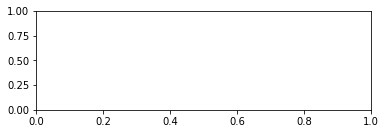

In [62]:
h = plt.subplot(2, 1, 1)

make_ellipses(gmm, h)

for n in range(40):
#     color=n
#     data = timit_df['labels' == label_categories[n]]
    data = timit_df["features"]["labels"==label_categories[n]]
    print(data)
    plt.scatter(data[: 0], data[: 1], 0.8,
                label=label_categories[n])
    # Plot the test data with crosses
for n in range(40):
#     color=n
    data = X_test[y_test == n]
    plt.plot(data[:, 0], data[:, 1], 'x')

plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy)
plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy)

plt.xticks(())
plt.yticks(())

plt.legend(loc='lower right', prop=dict(size=12))


plt.show()

In [57]:
import matplotlib.pyplot as plt


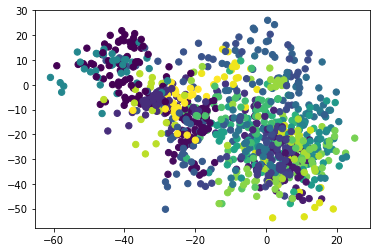

In [61]:
plt.scatter(X[:, 1], X[:, 2], c=lab, s=40, cmap='viridis');

In [124]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.012 0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.002 0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.985 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   ]
 [0.    0.002 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.767 0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.161 0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.069 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   ]
 [0.    0.002 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.032
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.965 0.    0.    0.    0.    0.    0.
  0.    0.    0.    

In [136]:
print(gmm.converged_)


True


In [137]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn import datasets
from sklearn.cross_validation import StratifiedKFold
from sklearn.externals.six.moves import xrange
from sklearn.mixture import GMM

C:\Users\Prince\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [138]:

def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [ ]:
iris = datasets.load_iris()